In [1]:
import pickle
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

# BUSINESS

In [5]:
business_ca = pd.read_csv('business_ca.csv')

In [6]:
business_ca

business_id                   name             address  \
0     MTSW4McQd7CbVtyjqoe9mw     St Honore Pastries         935 Race St   
1     sqSqqLy0sN8n2IZrAbzidQ         Domino's Pizza   3001 Highway 31 W   
2     LhpPSrulqVeTyJeK2xydvQ  Fresh Fruits & Salads        114 N 3rd St   
3     iPSPcprSnkLOuL1Ns8UZZA     Pete's Barber Shop      1209 N 29th St   
4     PYW8Buz8S8LpjIe6mZTAcw        Payless Liquors  954 N State Rd 135   
...                      ...                    ...                 ...   
2433  2f1ZnZg7730yChhV24ARJw              Starbucks      5943 S East St   
2434  IeSD0nMKRFYUTnR5nZH1CQ        HighWire Lounge    14 S Arizona Ave   
2435  VZbkSeZtFynEascotq7ExA    Ali Baba Magic Food     37TH And Walnut   
2436  0UqeZTDBdV0uY3wesbLvYQ                   ampm  1701 Victorian Ave   
2437  wVxXRFf10zTTAs11nr4xeA           PrimoHoagies      6024 Ridge Ave   

              city state postal_code   latitude   longitude  stars  \
0     Philadelphia    CA       19107  39.955505  -75.155564    4.0   
1      White House    CA       37188  36.464747  -86.659187    3.5   
2           Camden    CA       08102  39.946690  -75.123327    4.5   
3     Philadelphia    CA       19121  39.974880  -75.183262    4.5   
4        Greenwood    CA       46143  39.632280  -86.158674    3.5   
...            ...   ...         ...        ...         ...    ...   
2433  Indianapolis    CA       46227  39.679628  -86.148621    3.5   
2434        Tucson    CA       85701  32.221828 -110.967969    3.5   
2435  Philadelphia    CA       19104  39.953391  -75.196765    4.0   
2436        Sparks    CA       89431  39.534947 -119.765698    4.0   
2437  Philadelphia    CA       19128  40.032483  -75.214430    3.0   

      review_count  is_open  \
0               80        1   
1                8        1   
2                6        1   
3               12        1   
4               13        1   
...            ...      ...   
2433            44        1   
2434           111        1   
2435             8        0   
2436             5        1   
2437            55        1   

                                             attributes  \
0     {"RestaurantsDelivery": "False", "OutdoorSeati...   
1                       {"RestaurantsPriceRange2": "1"}   
2     {"BusinessParking": "{'garage': False, 'street...   
3     {"RestaurantsPriceRange2": "1", "BusinessParki...   
4     {"BikeParking": "True", "BusinessAcceptsCredit...   
...                                                 ...   
2433  {"WiFi": "'free'", "BusinessAcceptsCreditCards...   
2434  {"BusinessParking": "{'garage': False, 'street...   
2435  {"GoodForKids": "False", "RestaurantsReservati...   
2436             {"BusinessAcceptsCreditCards": "True"}   
2437  {"NoiseLevel": "u'average'", "RestaurantsTakeO...   

                                             categories  \
0     Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
1         Pizza, Chicken Wings, Sandwiches, Restaurants   
2     Juice Bars & Smoothies, Restaurants, Fruits & ...   
3                                Barbers, Beauty & Spas   
4                            Food, Beer, Wine & Spirits   
...                                                 ...   
2433                                 Coffee & Tea, Food   
2434  Bars, Tapas Bars, Restaurants, Nightlife, Gast...   
2435                           Restaurants, Food Stands   
2436  Convenience Stores, Food, Automotive, Gas Stat...   
2437  Restaurants, Specialty Food, Food, Sandwiches,...   

                                                  hours  
0     {"Monday": "7:0-20:0", "Tuesday": "7:0-20:0", ...  
1     {"Monday": "10:0-0:0", "Tuesday": "10:0-0:0", ...  
2     {"Monday": "9:0-18:0", "Tuesday": "9:0-18:0", ...  
3                                                   NaN  
4                                                   NaN  
...                                                 ...  
2433  {"Monday": "5:0-21:0", "Tuesday": "5:0-21:0", ...  
2434  {"Tuesday": "1

In [52]:
'''ANALISIS DE NULOS'''
# Función para convertir columnas de diccionarios en JSON serializado
def convertir_columnas_a_json(df, columnas):
    for col in columnas:
        # Convertir las columnas con diccionarios en cadenas JSON
        df[col] = df[col].apply(lambda x: json.dumps(x) if isinstance(x, dict) else x)
    return df

# Función para detectar valores nulos en todas las columnas del DataFrame
def detectar_nulos(df):
    # Inicializamos un diccionario para almacenar las columnas con nulos y sus datos
    nulos = {}
    
    # Iteramos sobre todas las columnas del DataFrame
    for col in df.columns:
        try:
            # Filtramos las filas donde el valor de la columna es nulo
            nulos_data = df[df[col].isnull()]
            if not nulos_data.empty:  # Si hay nulos en la columna
                nulos[col] = nulos_data
                print("\n" + "-"*50 + "\n")  # Separador visual
                print(f"Columna '{col}' contiene valores nulos:")
                print(f"  Cantidad de nulos en '{col}': {nulos_data[col].isnull().sum()}\n")
                print(f"Filas con Nulos en la columna '{col}':\n")
                print(nulos_data)
        except ValueError as e:
            print(f"Error al procesar la columna '{col}': {e}")
    
    # Si no se encontraron columnas con valores nulos
    if not nulos:
        print("\nNo se detectaron valores nulos en el DataFrame.")
    
    return nulos

# Función principal para analizar el DataFrame
def analizar_nulos(df):
    # Información general del DataFrame
    print("\033[1mINFORMACIÓN DEL DATAFRAME:\033[0m\n")
    df.info()  # Información del DataFrame
    
    print("\n" + "-"*50 + "\n")
    
    # Cantidad de valores nulos por columna
    print("Valores nulos en el DataFrame:")
    print(df.isnull().sum())
    
    # Porcentaje de valores nulos por columna
    print("\nPorcentaje de valores nulos en cada columna:")
    print((df.isnull().mean() * 100).round(2))
    
    print("\n" + "-"*50 + "\n")
    
    # Detección de valores nulos específicos
    print("\nDetección de valores nulos específicos en el DataFrame:")
    detectar_nulos(df)
    
    print("\n" + "="*50 + "\n")  # Separador visual

# Columnas que contienen diccionarios
columnas_con_diccionarios = ['attributes', 'hours']

# Convertimos las columnas con diccionarios en JSON serializado
business_ca = convertir_columnas_a_json(business_ca, columnas_con_diccionarios)

# Analizamos nulos en el DataFrame
analizar_nulos(business_ca)

INFORMACIÓN DEL DATAFRAME:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   2438 non-null   object 
 1   name          2438 non-null   object 
 2   address       2418 non-null   object 
 3   city          2438 non-null   object 
 4   state         2438 non-null   object 
 5   postal_code   2437 non-null   object 
 6   latitude      2438 non-null   float64
 7   longitude     2438 non-null   float64
 8   stars         2438 non-null   float64
 9   review_count  2438 non-null   int64  
 10  is_open       2438 non-null   int64  
 11  attributes    2370 non-null   object 
 12  categories    2438 non-null   object 
 13  hours         2078 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 266.8+ KB

--------------------------------------------------

Valores nulos en el DataFrame:
business_id       0
name     

In [53]:
'''En este paso visualizaremos los outliers, la cantidad de valores faltantes
(si bien revisamos los nulos anteriormente se repite la información para facilitar la toma de decisiones)
y duplicados, la cantidad de outliers, métricas para comparar los outliers y también visualizaremos
las filas que los contienen para una mejor comprensión de la situación'''

def detectar_faltantes(df):
    # Calculamos la cantidad de valores nulos en cada columna del DataFrame
    faltantes = df.isnull().sum()
    # Filtramos solo las columnas que tienen valores faltantes
    faltantes = faltantes[faltantes > 0]
    
    # Verificamos si hay columnas con valores faltantes
    if faltantes.size > 0:  # Usamos size en lugar de empty
        # Imprimimos las columnas que contienen valores faltantes
        print("\nColumnas con valores faltantes:")
        print(faltantes)
    else:
        # Imprimimos un mensaje indicando que no hay valores faltantes
        print("\nNo hay valores faltantes en el dataframe.")

def detectar_duplicados(df):
    # Filtramos el DataFrame para encontrar filas duplicadas
    duplicados = df[df.duplicated()]
    
    # Verificamos si hay filas duplicadas
    if not duplicados.empty:
        # Imprimimos la cantidad de filas duplicadas encontradas
        print(f"\nHay {duplicados.shape[0]} filas duplicadas.")
        return duplicados
    else:
        # Imprimimos un mensaje indicando que no hay filas duplicadas
        print("\nNo hay filas duplicadas en el dataframe.")
        return None

def calcular_estadisticas(df, columnas):
    # Inicializamos un diccionario para almacenar las estadísticas
    estadisticas = {}
    
    # Iteramos a través de cada columna especificada
    for col in columnas:
        # Verificamos si la columna es de tipo numérico
        if pd.api.types.is_numeric_dtype(df[col]):
            # Calculamos la media de la columna
            media = df[col].mean()
            # Calculamos la mediana de la columna
            mediana = df[col].median()
            # Calculamos la desviación estándar de la columna
            desviacion_estandar = df[col].std()
            # Almacenamos las estadísticas calculadas en el diccionario
            estadisticas[col] = {
                'media': media,
                'mediana': mediana,
                'desviacion_estandar': desviacion_estandar
            }
    
    # Retornamos el diccionario con las estadísticas
    return estadisticas

def detectar_outliers(df, columnas, estadisticas):
    # Inicializamos un diccionario para almacenar los outliers
    outliers = {}
    
    # Iteramos a través de cada columna especificada
    for col in columnas:
        # Verificamos si la columna es de tipo numérico
        if pd.api.types.is_numeric_dtype(df[col]):
            # Calculamos el primer cuartil (Q1)
            Q1 = df[col].quantile(0.25)
            # Calculamos el tercer cuartil (Q3)
            Q3 = df[col].quantile(0.75)
            # Calculamos el rango intercuartílico (IQR)
            IQR = Q3 - Q1
            # Definimos los límites inferior y superior para los outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Filtramos las filas que son consideradas outliers
            outlier_data = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            
            # Verificamos si hay outliers en la columna
            if not outlier_data.empty:
                # Almacenamos la columna y sus datos de outliers en el diccionario
                outliers[col] = outlier_data
                
                # Imprimimos un separador visual en la consola
                print("\n" + "-"*80 + "\n")  
                # Mostramos las estadísticas para la columna actual
                print(f"Estadísticas para la columna {col}:")
                print(f"  Media: {estadisticas[col]['media']}")
                print(f"  Mediana: {estadisticas[col]['mediana']}")
                print(f"  Desviación estándar: {estadisticas[col]['desviacion_estandar']}")
                # Imprimimos la cantidad de outliers encontrados
                print(f"  Cantidad de outliers: {len(outlier_data)}\n")
                # Imprimimos las filas que son outliers
                print(f"Filas con Outliers en {col}:\n")
                print(outlier_data)
    
    # Verificamos si no hemos encontrado outliers
    if not outliers:
        # Imprimimos un mensaje indicando que no se detectaron outliers
        print("\nNo se detectaron outliers en las columnas especificadas.")
    
    # Retornamos el diccionario de outliers
    return outliers

def analisis_general(df, nombre):
    print("\n" + "="*80 + "\n")  
    print(f"\033[1mANÁLISIS DEL DATAFRAME {nombre.upper()}\033[0m") 
    
    # Llamamos a la función para detectar valores faltantes
    detectar_faltantes(df)
    
    # Llamamos a la función para detectar filas duplicadas
    duplicados = detectar_duplicados(df)
    
    # Verificamos si 'df' es un DataFrame antes de usar 'select_dtypes'
    if isinstance(df, pd.DataFrame):
        # Obtenemos las columnas numéricas del DataFrame
        columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
        
        # Calculamos las estadísticas antes de detectar outliers
        estadisticas = calcular_estadisticas(df, columnas_numericas)
        
        # Detectamos y mostramos outliers junto con estadísticas
        outliers = detectar_outliers(df, columnas_numericas, estadisticas)
    
        # Recomendación para comparar outliers con estadísticas
        for col in columnas_numericas:
            if col in outliers:
                print(f"\nRecomendación para la columna {col}:")
                print(f"  Comparar los outliers con la media ({estadisticas[col]['media']}) y la mediana ({estadisticas[col]['mediana']}) para entender su impacto.")
    else:
        print(f"\nEl DataFrame no tiene columnas numéricas para analizar.")
    
    print("\n" + "="*85 + "\n")  # Separador visual

# Analizamos outliers y estadísticas de datos
analisis_general(business_ca, 'business_ca')



ANÁLISIS DEL DATAFRAME BUSINESS_CA

Columnas con valores faltantes:
address         20
postal_code      1
attributes      68
hours          360
dtype: int64

No hay filas duplicadas en el dataframe.

--------------------------------------------------------------------------------

Estadísticas para la columna latitude:
  Media: 36.83525461627436
  Mediana: 39.120174972499996
  Desviación estándar: 6.0386819561874026
  Cantidad de outliers: 108

Filas con Outliers en latitude:

                 business_id                         name  \
46    ErFFv3yCa9NnJ_x0hBPCtg    New Asian Village Express   
91    dEotxkNxYaoG_7TS3kzUvQ                      Cinnzeo   
100   aAadqM2ezCEGdSqhx78ZCg                Grandma Pizza   
157   RsJE0PIwTgKSB6CHmutjAw                    Starbucks   
168   if2ZvtLUOdn6EFeWjZV6tg              El Fogón Latino   
...                      ...                          ...   
2252  R8iN4GNfGW4u0QW8e9P0xg   Blue on Whyte Liquor Store   
2256  My63Hd5kYboH73VNS09YFg

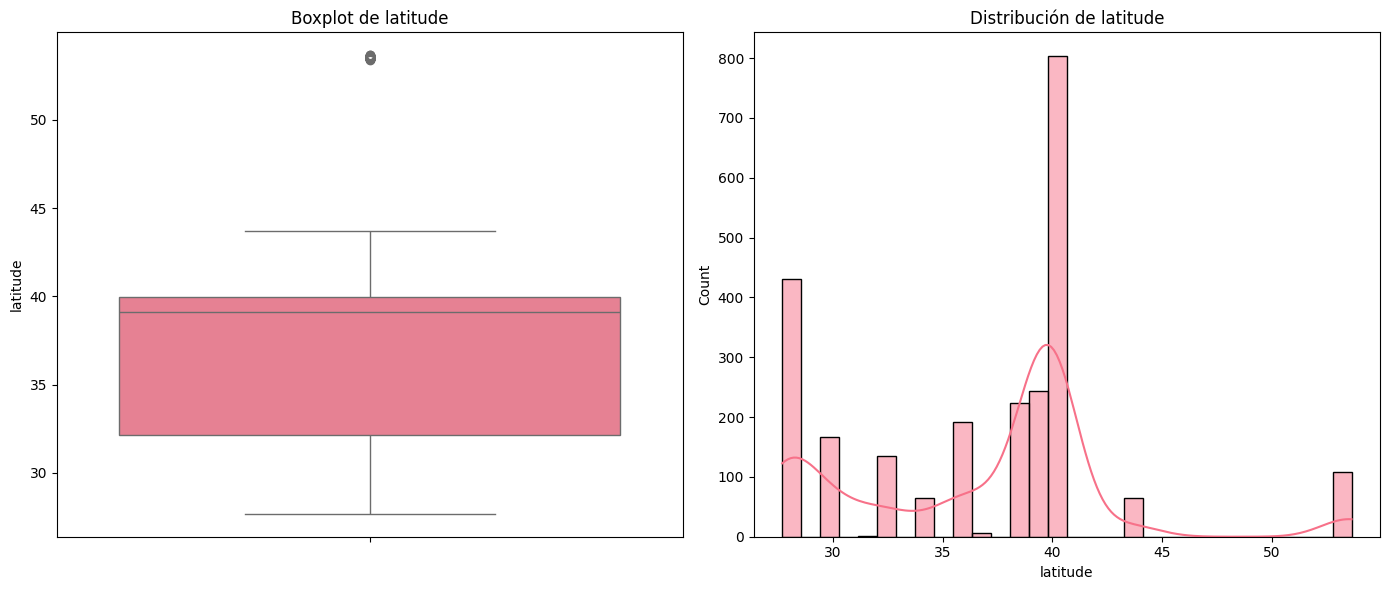

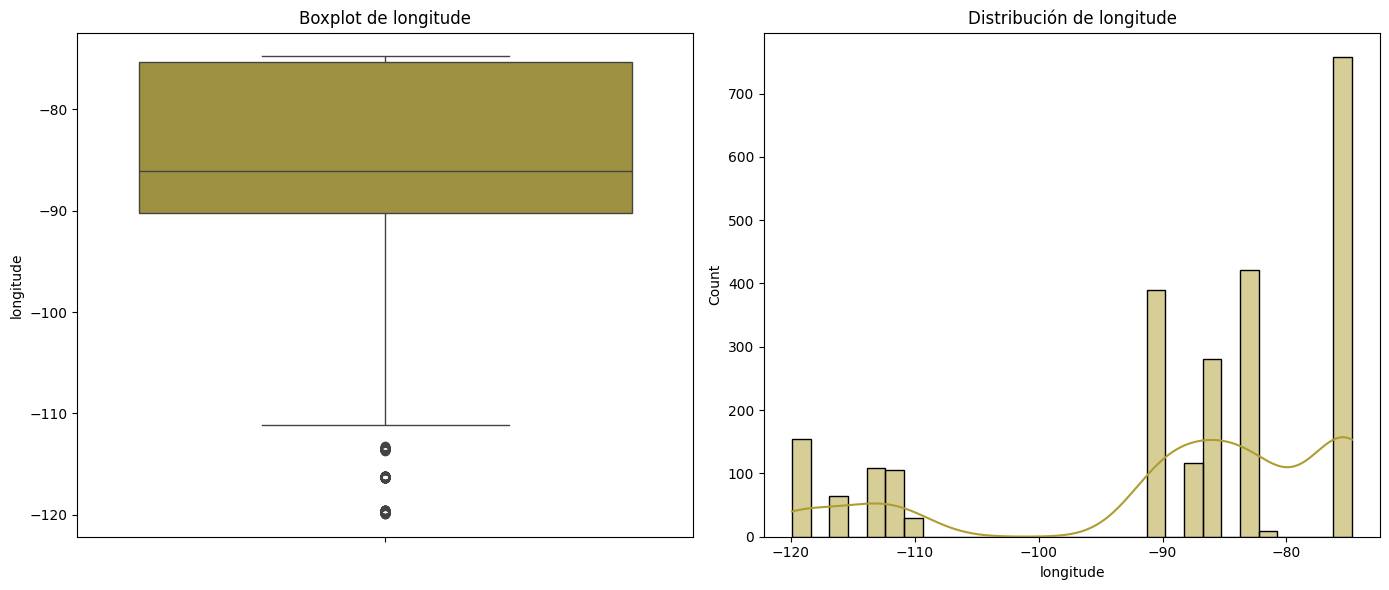

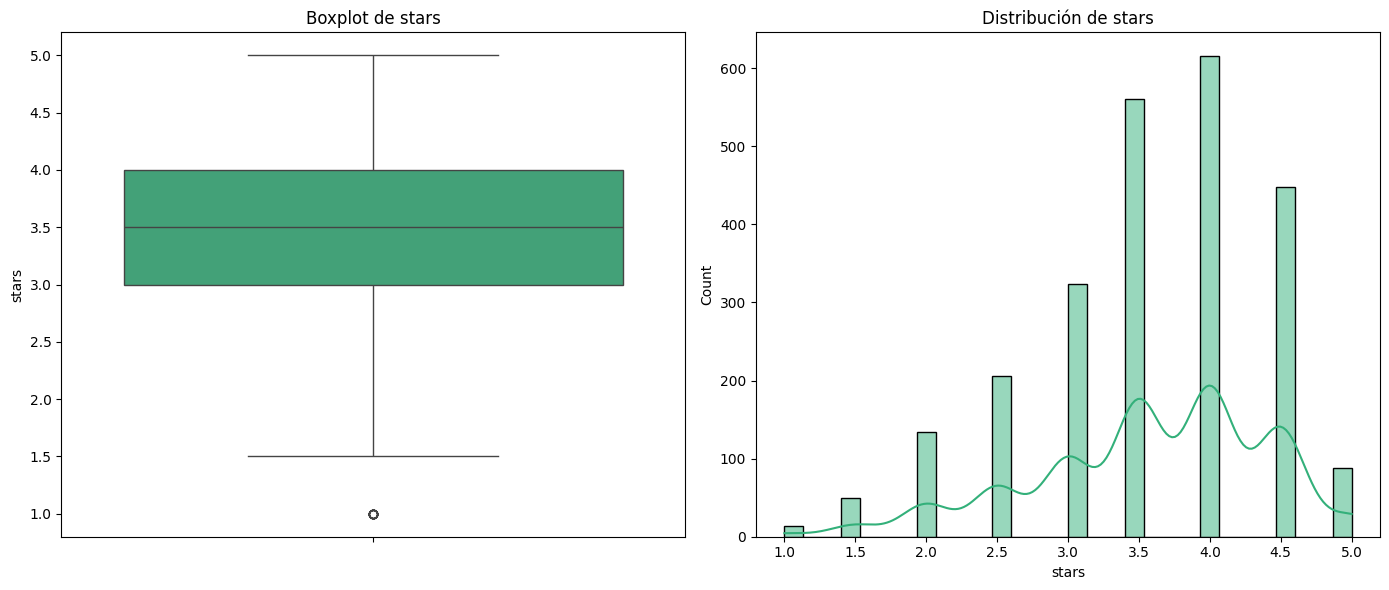

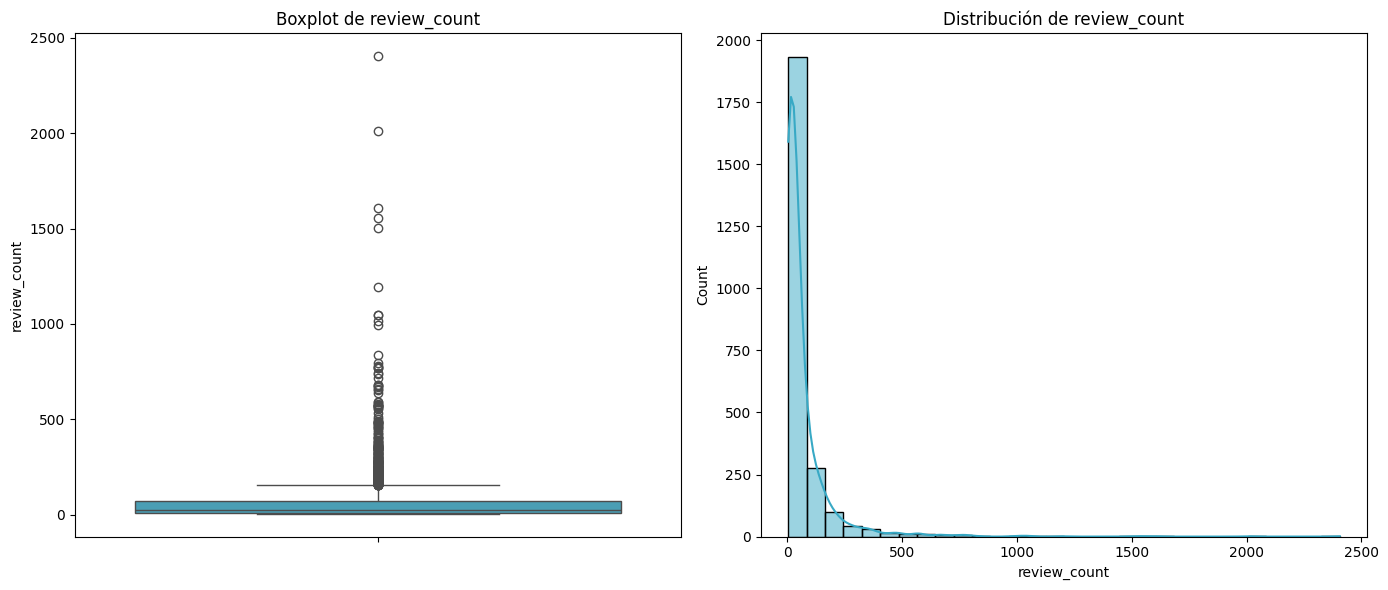

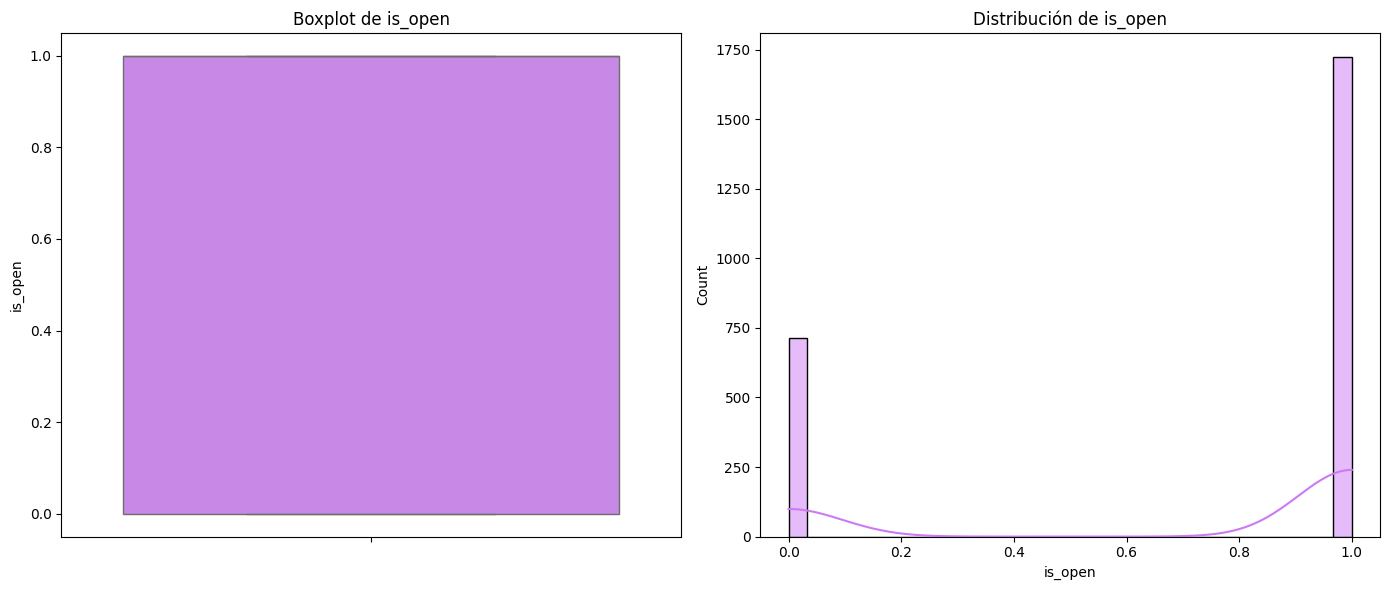

In [60]:
# Función para generar gráficos boxplot y distribuciones con colores
def generar_graficos_numericos(df):
    # Seleccionar solo las columnas numéricas para los gráficos
    columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

    # Si no hay columnas numéricas, mostrar mensaje y salir
    if columnas_numericas.empty:
        print("No se encontraron columnas numéricas en el DataFrame para generar gráficos.")
        return

    # Definir una paleta de colores
    colores = sns.color_palette("husl", len(columnas_numericas))

    # Iterar sobre las columnas numéricas y crear gráficos
    for idx, col in enumerate(columnas_numericas):
        # Crear una figura con subplots para boxplot y histograma
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        # Gráfico de caja (boxplot) para visualizar outliers
        sns.boxplot(data=df, y=col, ax=axes[0], color=colores[idx])
        axes[0].set_title(f"Boxplot de {col}")
        
        # Gráfico de histograma con línea de KDE (Distribución)
        sns.histplot(df[col].dropna(), kde=True, bins=30, ax=axes[1], color=colores[idx])
        axes[1].set_title(f"Distribución de {col}")

        # Ajustar el layout para mejor visualización
        plt.tight_layout()
        plt.show()

# Llamada a la función para generar gráficos para el DataFrame business_ca
generar_graficos_numericos(business_ca)

Mostrando el top 10 de categorías en la columna 'business_id'.


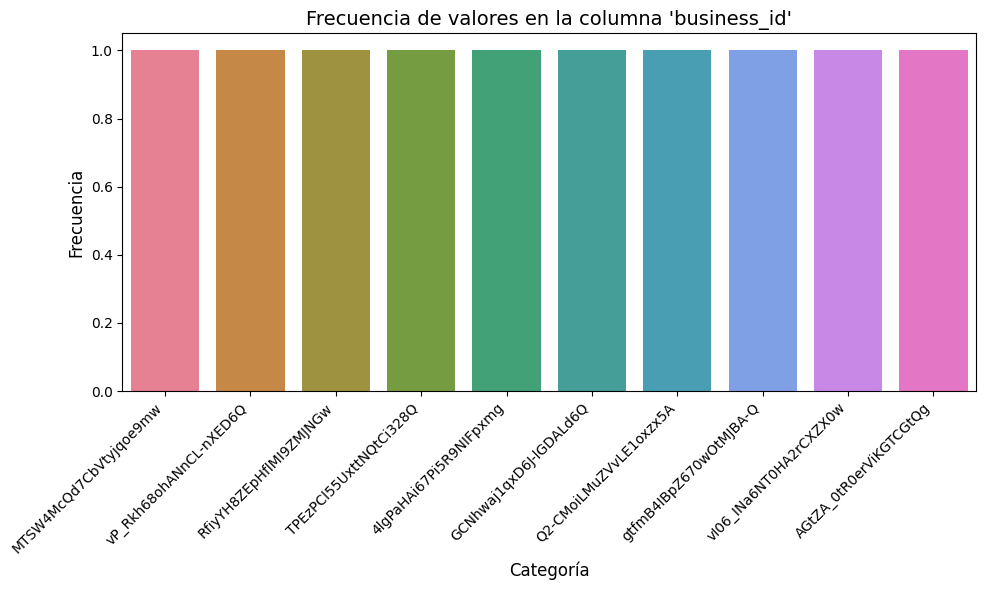

Mostrando el top 10 de categorías en la columna 'name'.


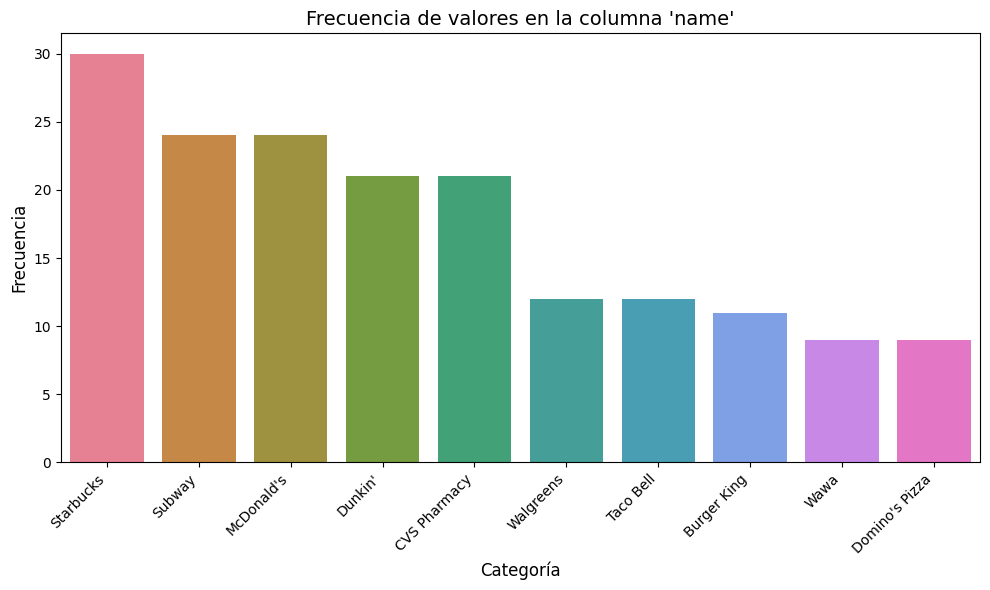

Mostrando el top 10 de categorías en la columna 'address'.


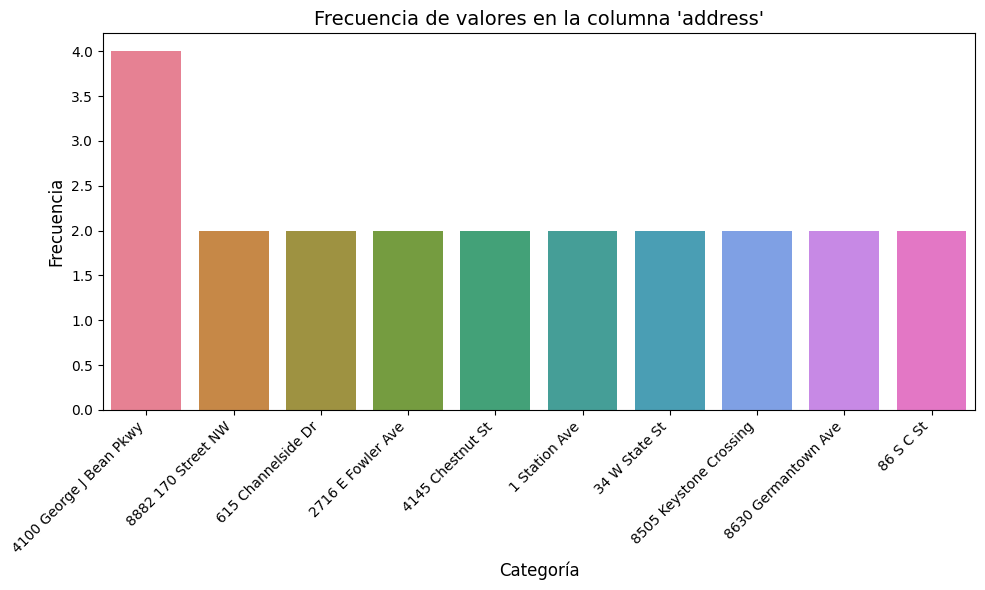

Mostrando el top 10 de categorías en la columna 'city'.


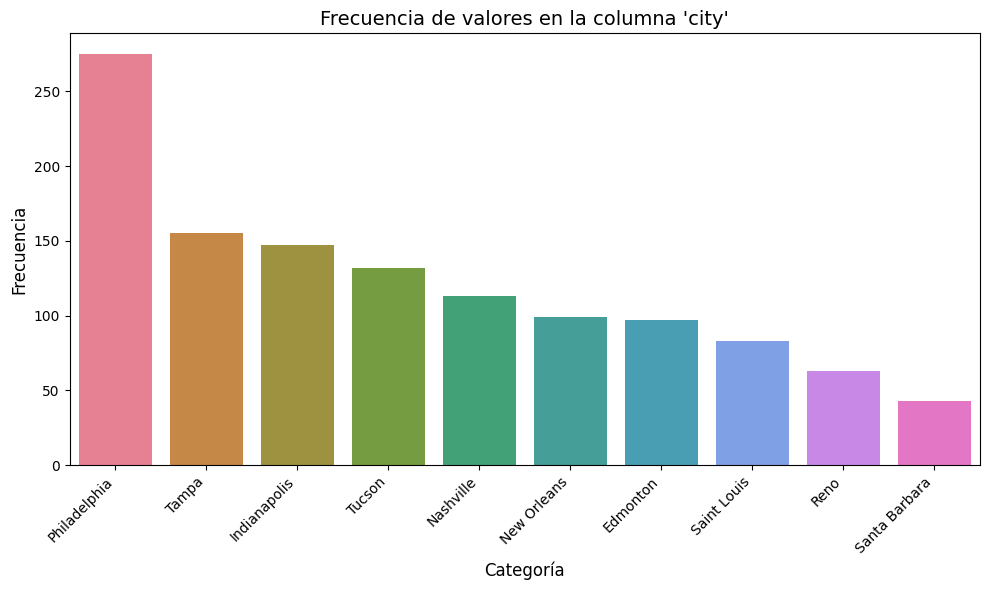

Mostrando el top 10 de categorías en la columna 'state'.


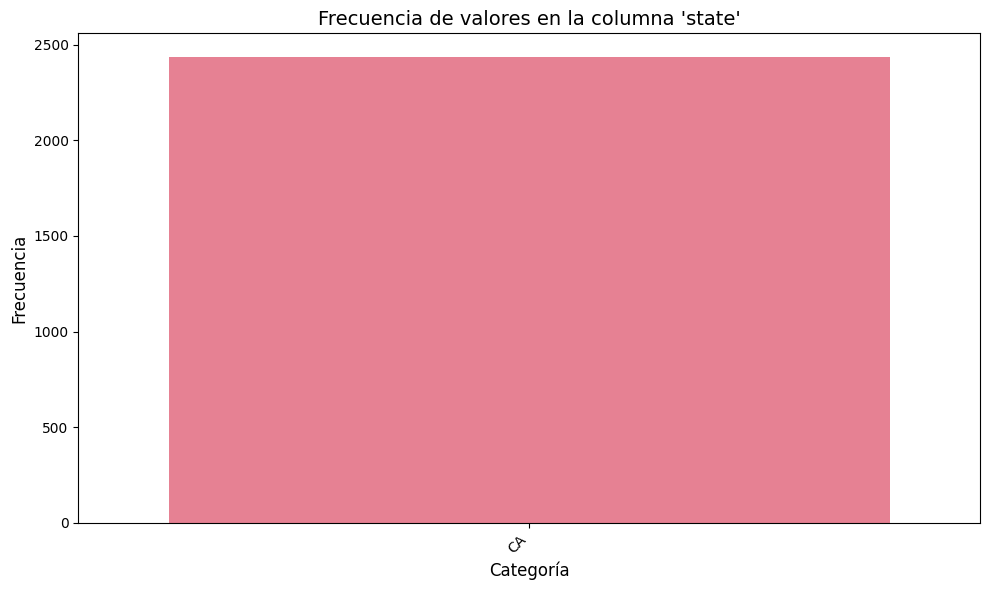

Mostrando el top 10 de categorías en la columna 'postal_code'.


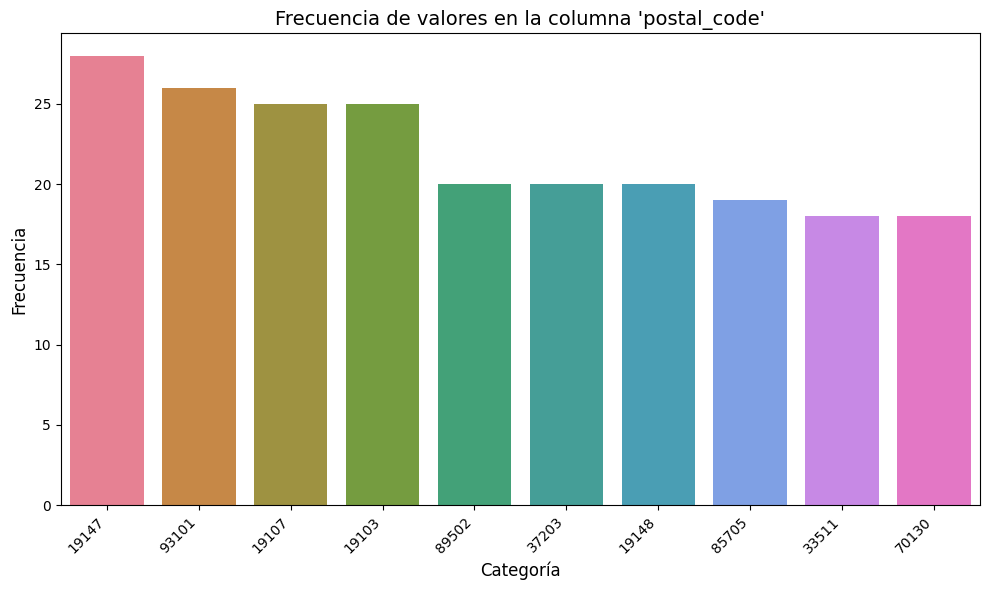

Mostrando el top 10 de categorías en la columna 'attributes'.


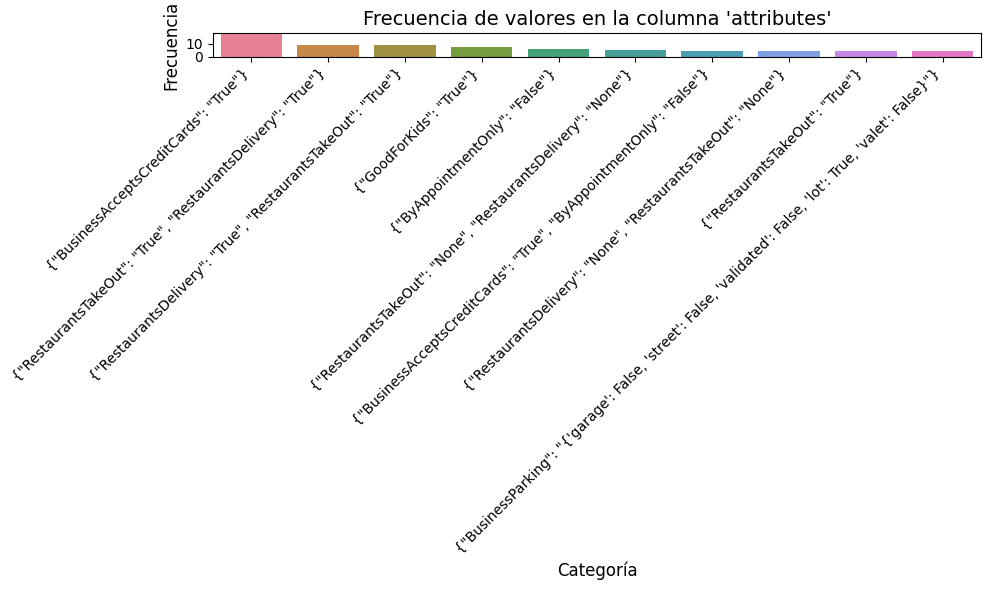

Mostrando el top 10 de categorías en la columna 'categories'.


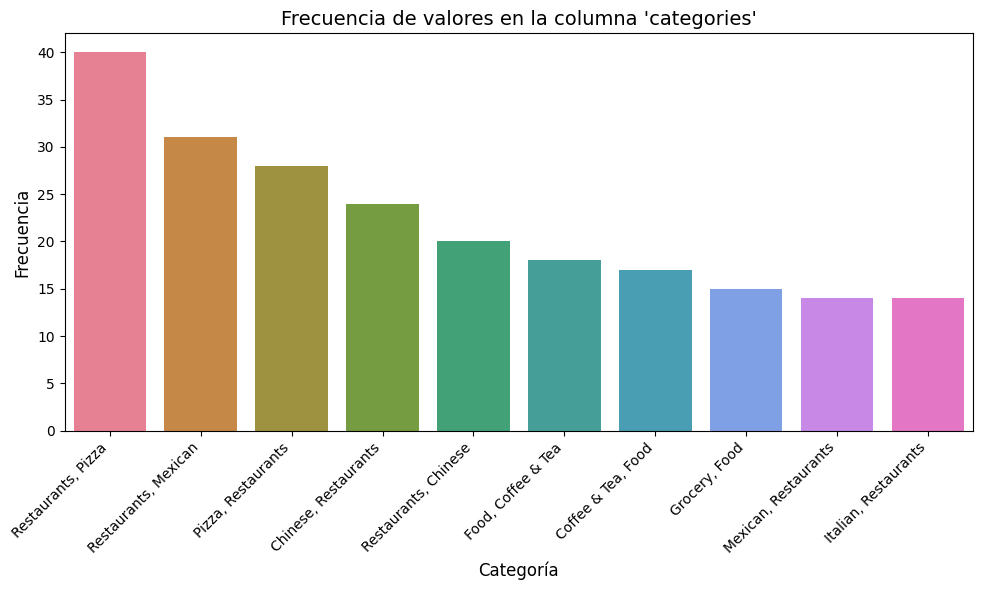

Mostrando el top 10 de categorías en la columna 'hours'.


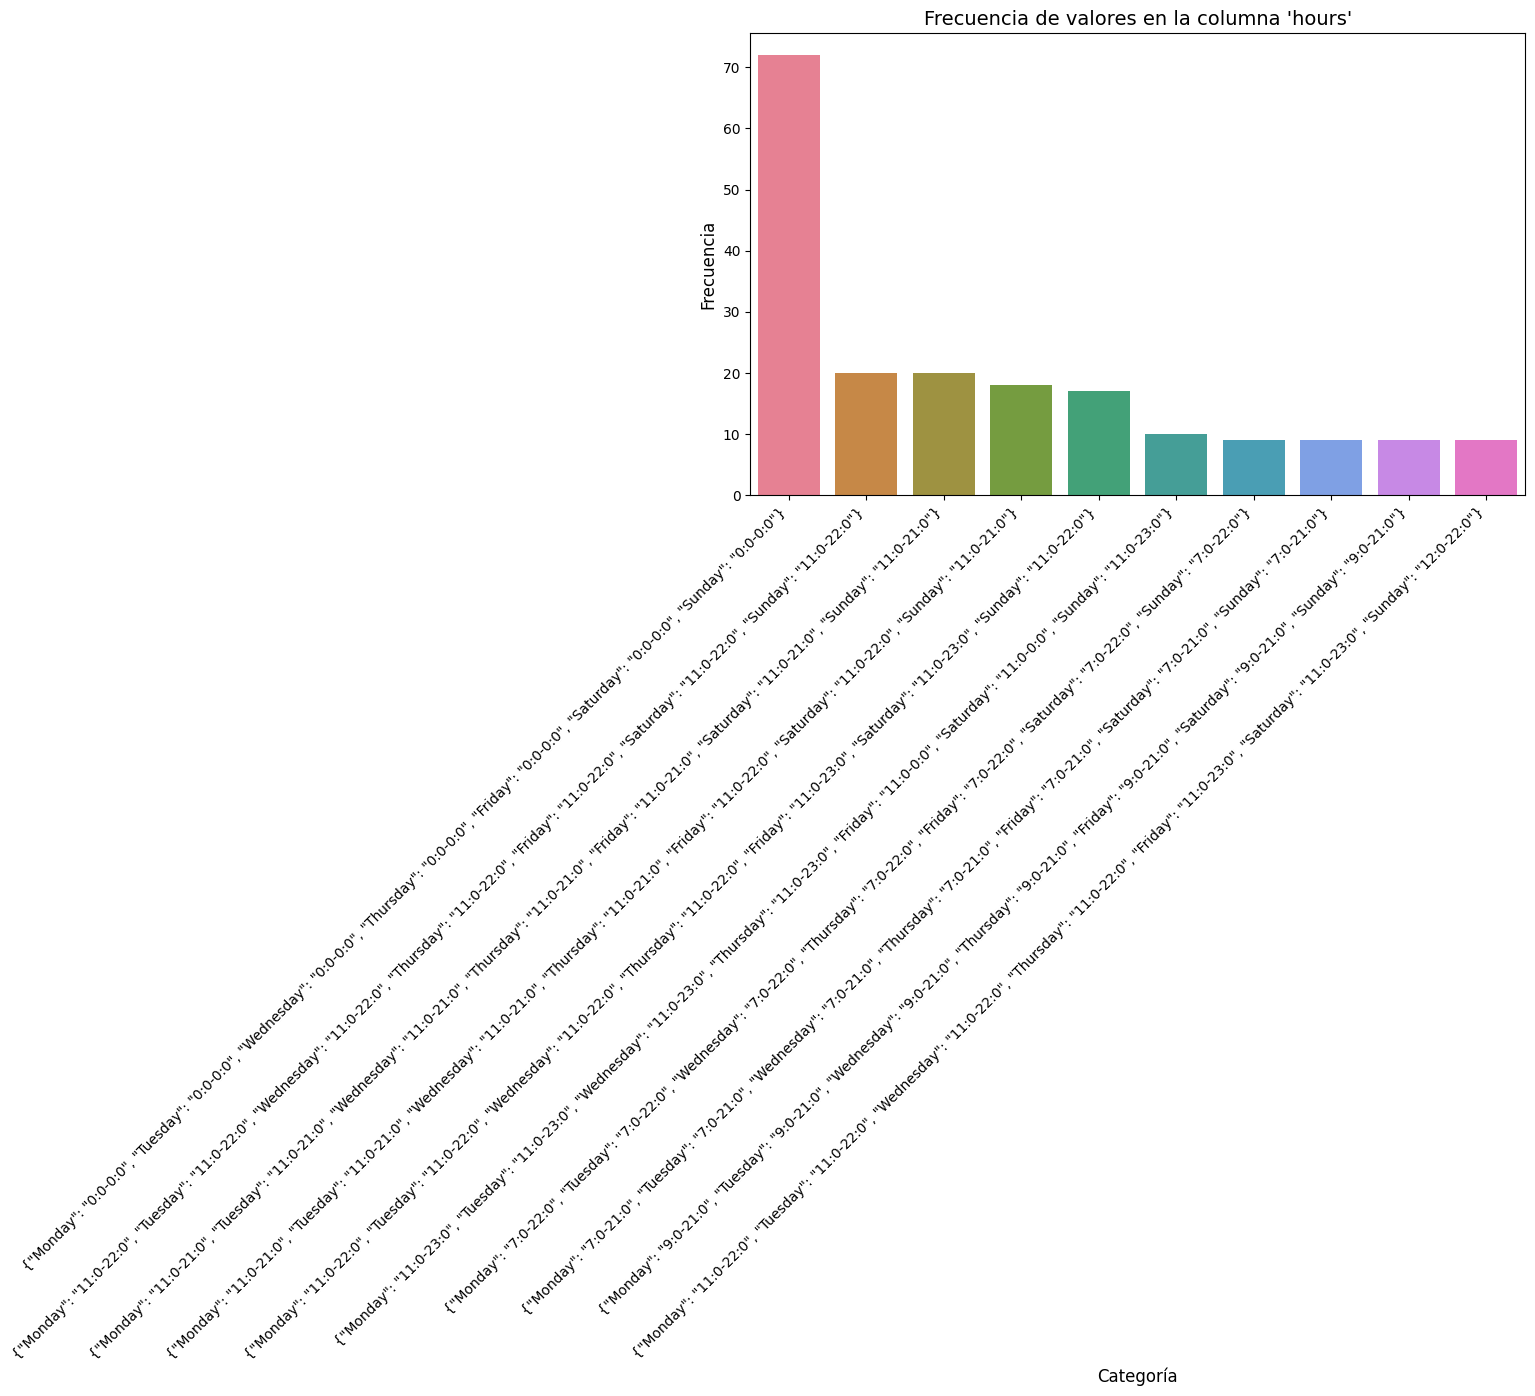

In [34]:
# Función para generar gráficos de frecuencia para columnas categóricas (tipo object) con colores
def generar_graficos_frecuencia_con_colores(df):
    # Seleccionar solo las columnas de tipo object
    columnas_categoricas = df.select_dtypes(include=['object']).columns
    
    # Si no hay columnas categóricas, mostrar mensaje y salir
    if columnas_categoricas.empty:
        print("No se encontraron columnas categóricas en el DataFrame para generar gráficos.")
        return

    # Iterar sobre las columnas categóricas y crear gráficos
    for col in columnas_categoricas:
        # Contar la cantidad de ocurrencias de cada valor en la columna
        conteo_valores = df[col].value_counts()

        # Limitar siempre a las 10 categorías más frecuentes
        conteo_valores = conteo_valores.head(10)
        print(f"Mostrando el top 10 de categorías en la columna '{col}'.")

        # Crear un gráfico de barras con la frecuencia de cada valor usando una paleta de colores
        plt.figure(figsize=(10, 6))
        
        # Usamos la paleta "husl" para colores
        colores = sns.color_palette("husl", len(conteo_valores))
        
        # Escapar caracteres especiales en las etiquetas para evitar problemas con interpretaciones matemáticas
        etiquetas = [str(etiqueta).replace('$', r'\$') for etiqueta in conteo_valores.index]

        # Graficar el conteo de valores
        sns.barplot(x=etiquetas, y=conteo_valores.values, palette=colores)

        # Ajustar la presentación del gráfico
        plt.title(f"Frecuencia de valores en la columna '{col}'", fontsize=14)
        plt.xticks(rotation=45, ha='right')  # Rotar los nombres para mejor visualización
        plt.xlabel('Categoría', fontsize=12)
        plt.ylabel('Frecuencia', fontsize=12)

        # Ajustar el layout para evitar solapamientos
        plt.tight_layout()
        plt.show()

# Llamada a la función para generar gráficos de frecuencia con colores
generar_graficos_frecuencia_con_colores(business_ca)

### ANALISIS 

1. Tamaño del DataFrame
El DataFrame tiene un total de 2,438 filas y 14 columnas. Representa información sobre negocios, incluyendo detalles como su ubicación, calificaciones, revisiones y horas de operación.

2. Calidad de los Datos

    - Las columnas que contienen valores nulos son address, postal_code, attributes, y hours. En total:
        - address tiene 20 valores nulos (0.82% de los datos).
        - postal_code tiene 1 valor nulo (0.04%).
        - attributes tiene 68 valores nulos (2.79%).
        - hours tiene 360 valores nulos (14.77%).

Las demás columnas no tienen valores nulos, lo cual es positivo para el análisis.

3. Distribución de Variables

    - Variables de tipo float64:

        - latitude y longitude: Son coordenadas geográficas que permiten ubicar los negocios. No tienen valores nulos y su distribución parece normal. En el caso de latitude, los outliers podrían corresponder a negocios fuera del rango esperado de latitudes.
        - stars: Esta variable representa la calificación de los negocios, en escala de 1 a 5 estrellas, sin valores faltantes.

    - Variables de tipo int64:

        - review_count: Representa el número de revisiones que un negocio ha recibido. Puede ser útil para evaluar la popularidad de los negocios.
        - is_open: Es un indicador binario (0 o 1) que señala si el negocio está abierto o cerrado.

    - Variables de tipo object:
        - business_id y name: Identifican a los negocios. Estas columnas no tienen valores nulos y contienen información clave.
        - address, city, state, y postal_code: Proveen detalles de la ubicación del negocio. A pesar de que address y postal_code tienen algunos valores nulos, la cantidad es pequeña.
        - attributes: Almacena información sobre características adicionales del negocio, pero tiene 68 valores nulos.
        - categories: Contiene la categoría del negocio, sin valores faltantes.
        - hours: Especifica las horas de operación del negocio, pero tiene un porcentaje considerable de datos faltantes (14.77%).

4. Análisis de la Columna latitude

    - Media: 36.84
    - Mediana: 39.12
    - Desviación estándar: 6.04
    - Outliers: Se identificaron 108 outliers en esta columna, lo que indica la presencia de negocios con ubicaciones fuera del rango común de latitudes para la región analizada.

5. Datos Relevantes

    - Calidad general: Aunque hay algunos valores nulos en variables como hours y attributes, la calidad general del DataFrame es buena, con la mayoría de los datos completos y sin filas duplicadas.
    - Posible tratamiento: Se pueden considerar estrategias de imputación o eliminación de los valores faltantes dependiendo de la importancia de las columnas involucradas.


### CONCLUSION

El DataFrame presenta una información detallada y completa sobre los negocios, con pocos valores nulos y sin duplicados. Ofrece una base sólida para el análisis de ubicación, calificación y popularidad de los negocios, destacando variables clave como latitude y longitude para análisis geoespaciales, y stars y review_count para evaluar calidad y popularidad. Aunque hay algunos valores nulos y outliers, la calidad general de los datos es buena. Con un tratamiento adecuado de los valores faltantes, especialmente en hours, y una revisión de los outliers en latitude, el conjunto de datos puede proporcionar valiosos insights para análisis geoespaciales, estudios de mercado y evaluaciones de calidad de negocios.

__________________________________________________________________________________________________________________________________________________________________________________

# METADATA CALIFORNIA GOOGLE

In [2]:
metadata_california = pd.read_csv('Metadata California.csv')

In [3]:
metadata_california

name  \
0                            San Soo Dang   
1                            Vons Chicken   
2                         TACOS LA CABANA   
3                     Mariscos el poblano   
4                            Off The Hoof   
...                                   ...   
32496      Mrs Rice's Oriental Restaurant   
32497               Einstein Bros. Bagels   
32498     Brito's 1 Mexican Food Taquería   
32499                  Barrio Eat Mexican   
32500  Fresh Brothers Pizza Newport Beach   

                                                 address  \
0      San Soo Dang, 761 S Vermont Ave, Los Angeles, ...   
1      Vons Chicken, 12740 La Mirada Blvd, La Mirada,...   
2      TACOS LA CABANA, 2015 22nd Ave, Oakland, CA 94606   
3      Mariscos el poblano, 5401-5441 Coliseum Way, O...   
4        Off The Hoof, 201 E 4th St, Santa Ana, CA 92701   
...                                                  ...   
32496  Mrs Rice's Oriental Restaurant, 1355 Broadway ...   
32497  Einstein Bros. Bagels, 17675 Harvard Ave, Irvi...   
32498  Brito's 1 Mexican Food Taquería, 2159 W Lincol...   
32499  Barrio Eat Mexican, 530 Grand Ave, Carlsbad, C...   
32500  Fresh Brothers Pizza Newport Beach, 1616 San M...   

                                     gmap_id  \
0      0x80c2c778e3b73d33:0xbdc58662a4a97d49   
1      0x80dd2b4c8555edb7:0xfc33d65c4bdbef42   
2      0x808f879f35b5088b:0xe3541cec7a95bd88   
3      0x808f87f90c1f661f:0xf384e804a61e0c0b   
4      0x80dcd95d192d988b:0x68795f58e35bf888   
...                                      ...   
32496  0x80d94e823b18f809:0x8184c792243025ff   
32497  0x80dcde8008515d39:0xef12af4668bba35a   
32498  0x80dd2997af971b1d:0x9651e630fae0c790   
32499  0x80dc721aaf99317b:0xbaebd0f5a5ea7172   
32500  0x80dce09226e401d5:0xb3c0e5c8d4b2c9d1   

                                             description   latitude  \
0                                                    NaN  34.058092   
1                                                    NaN  33.916402   
2                                                    NaN  37.789076   
3                                                    NaN  37.764203   
4                                                    NaN  33.748329   
...                                                  ...        ...   
32496                                                NaN  32.602569   
32497  Counter-service chain offering egg sandwiches,...  33.675988   
32498                                                NaN  33.832778   
32499                                                NaN  33.160987   
32500  Branch of a family-friendly chain offering piz...  33.611202   

        longitude                                           category  \
0     -118.292130                                  Korean restaurant   
1     -118.010855                                         Restaurant   
2     -122.233884                                    Taco restaurant   
3     -122.214647                                         Restaurant   
4     -117.866045                                         Restaurant   
...           ...                                                ...   
32496 -117.077593                                         Restaurant   
32497 -117.832139  Bagel shop, Bakery, Breakfast restaurant, Cafe...   
32498 -117.957782                                 Mexican restaurant   
32499 -117.349414  Mexican restaurant, Bar, Bar & grill, Burrito ...   
32500 -117.864362    Pizza restaurant, Pizza delivery, Pizza Takeout   

       avg_rating  num_of_reviews price  \
0             4.4              18   NaN   
1             4.5              18   NaN   
2             5.0               2   NaN   
3             5.0               3   NaN   
4             4.0               3   NaN   
...           ...             ...   ...   
32496         4.6              88   NaN   
32497         4.1             278     $   
32498         4.3             378     $   
32499         4.3             278    $$   
32500  

In [54]:
# Analizamos nulos en el DataFrame
analizar_nulos(metadata_california)

INFORMACIÓN DEL DATAFRAME:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32501 entries, 0 to 32500
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              32501 non-null  object 
 1   address           32326 non-null  object 
 2   gmap_id           32501 non-null  object 
 3   description       11353 non-null  object 
 4   latitude          32501 non-null  float64
 5   longitude         32501 non-null  float64
 6   category          32501 non-null  object 
 7   avg_rating        32501 non-null  float64
 8   num_of_reviews    32501 non-null  int64  
 9   price             15707 non-null  object 
 10  hours             29550 non-null  object 
 11  MISC              32134 non-null  object 
 12  state             29606 non-null  object 
 13  relative_results  26582 non-null  object 
 14  url               32501 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 3.7+ MB



In [55]:
# Analizamos outliers y estadísticas de datos
analisis_general(metadata_california, 'metadata_california')



ANÁLISIS DEL DATAFRAME METADATA_CALIFORNIA

Columnas con valores faltantes:
address               175
description         21148
price               16794
hours                2951
MISC                  367
state                2895
relative_results     5919
dtype: int64

Hay 157 filas duplicadas.

--------------------------------------------------------------------------------

Estadísticas para la columna avg_rating:
  Media: 4.212996523183901
  Mediana: 4.3
  Desviación estándar: 0.5202511307379016
  Cantidad de outliers: 1283

Filas con Outliers en avg_rating:

                               name  \
20     Alberto's Italian Restaurant   
31                          Quiznos   
32                          Quiznos   
33                       McDonald's   
46         Miche's Filipino Cuisine   
...                             ...   
32272                Mandarin House   
32351         Dickey's Barbecue Pit   
32367   Villa Fresh Italian Kitchen   
32395                     Sliderbar  

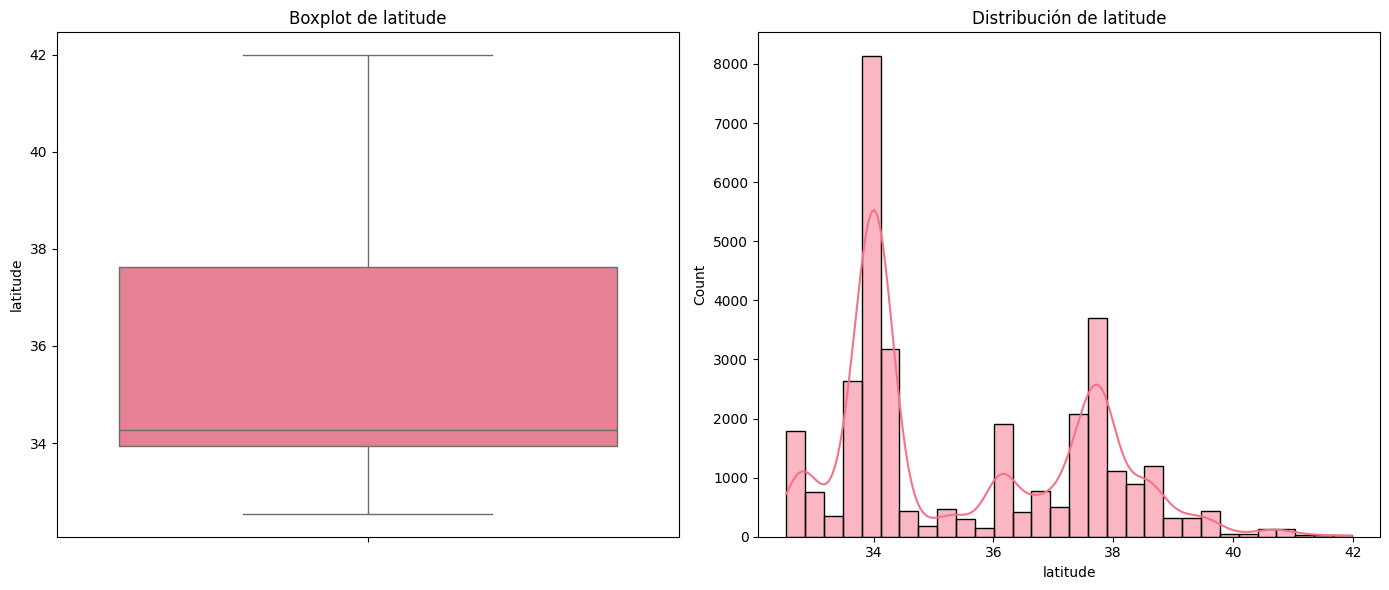

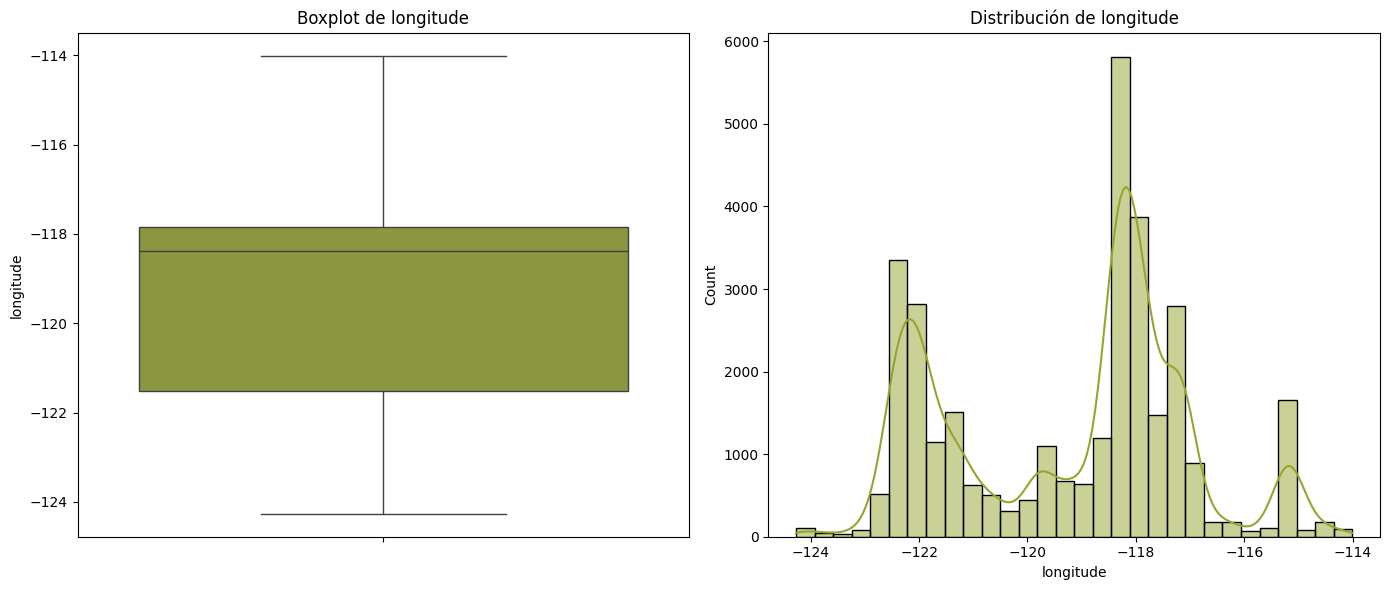

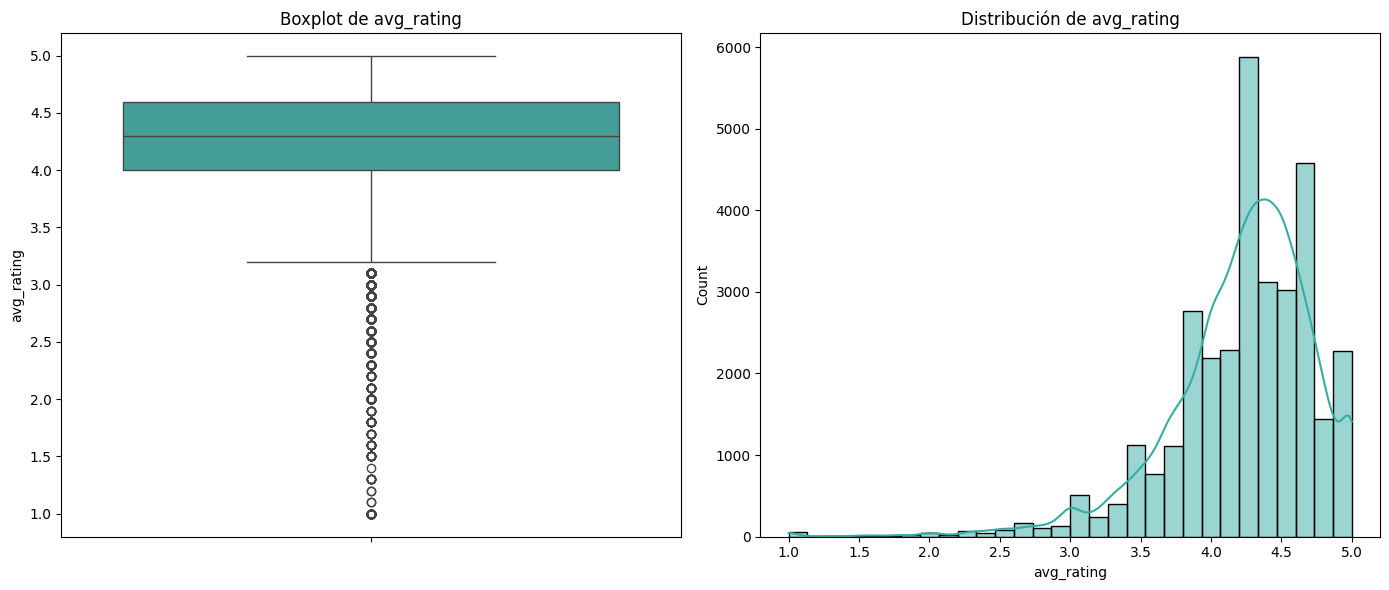

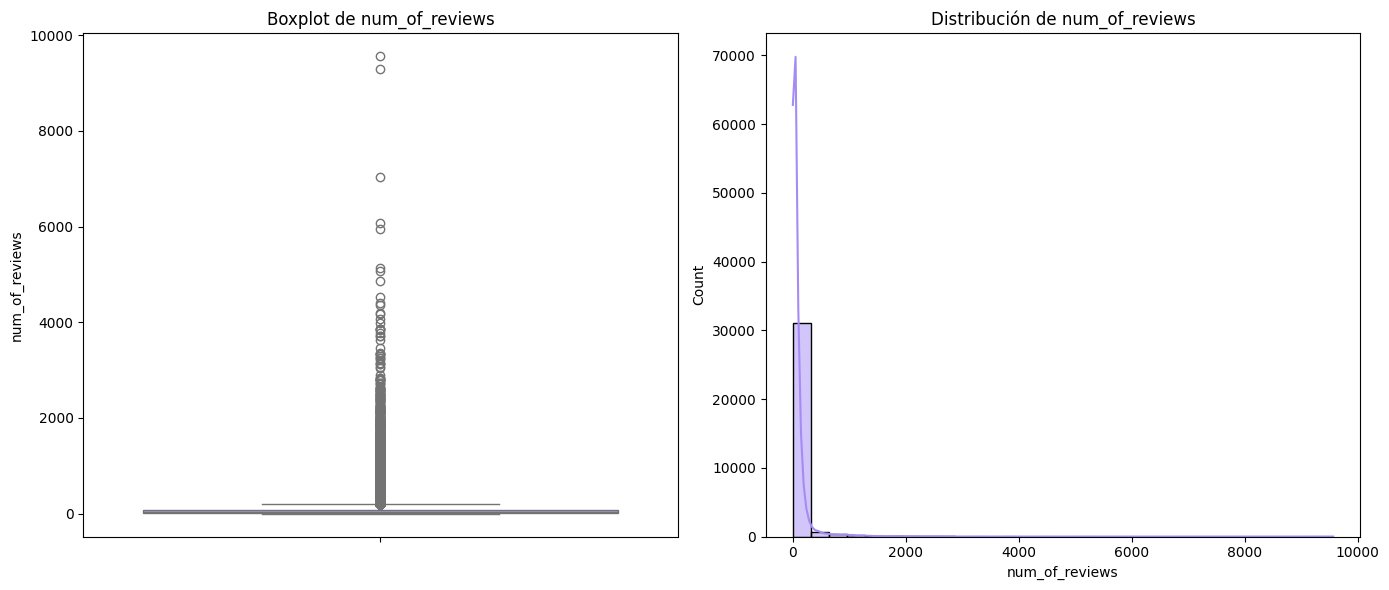

In [61]:
# Llamada a la función para generar gráficos para el DataFrame business_ca
generar_graficos_numericos(metadata_california)

Mostrando el top 10 de categorías en la columna 'name'.


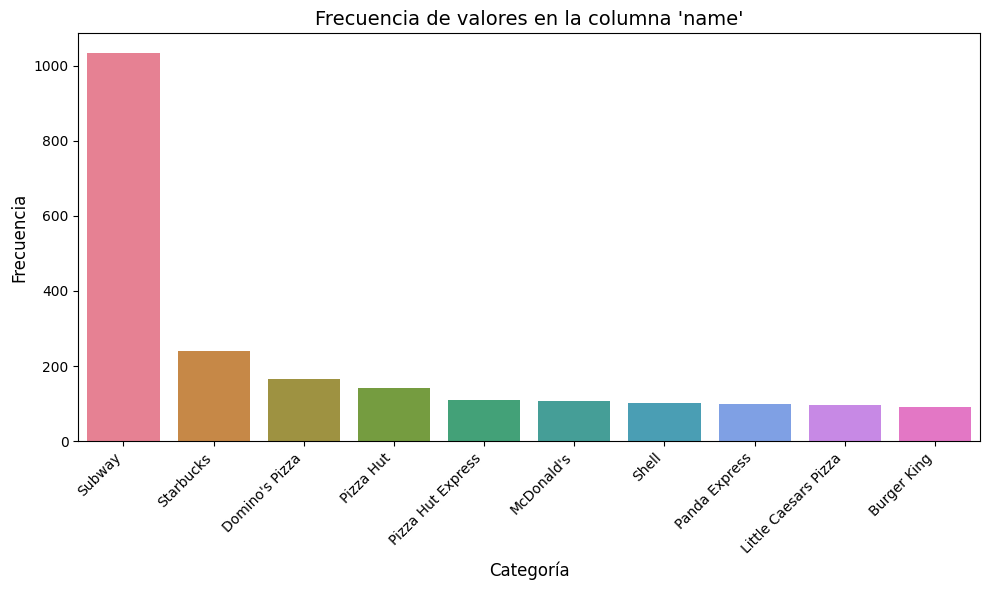

Mostrando el top 10 de categorías en la columna 'address'.


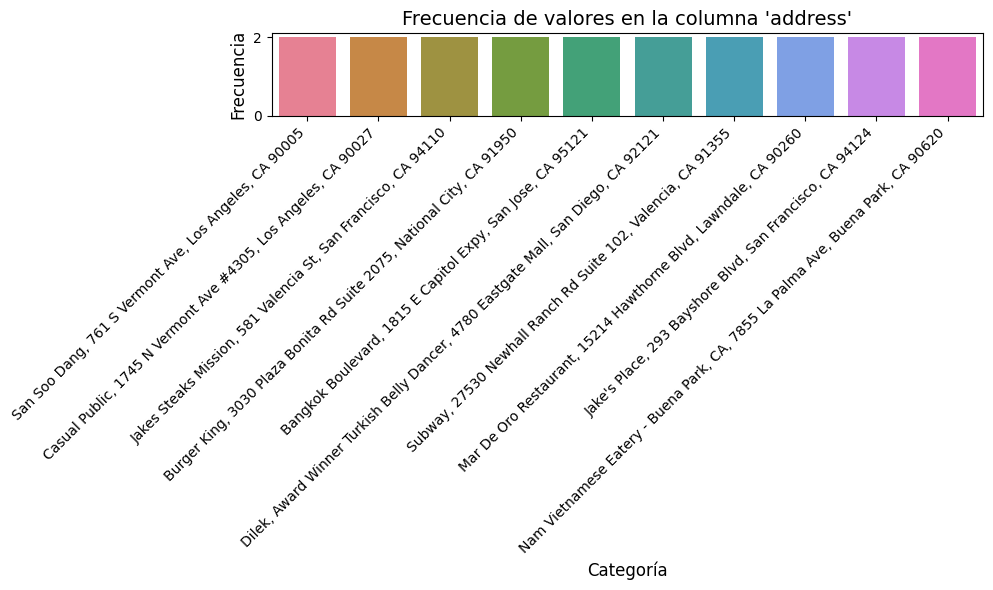

Mostrando el top 10 de categorías en la columna 'gmap_id'.


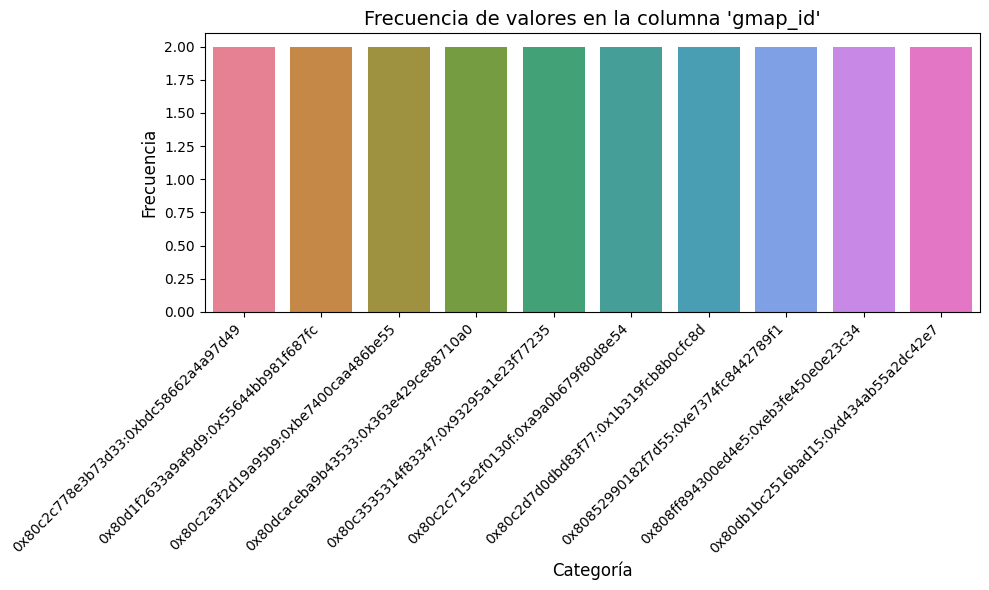

Mostrando el top 10 de categorías en la columna 'description'.


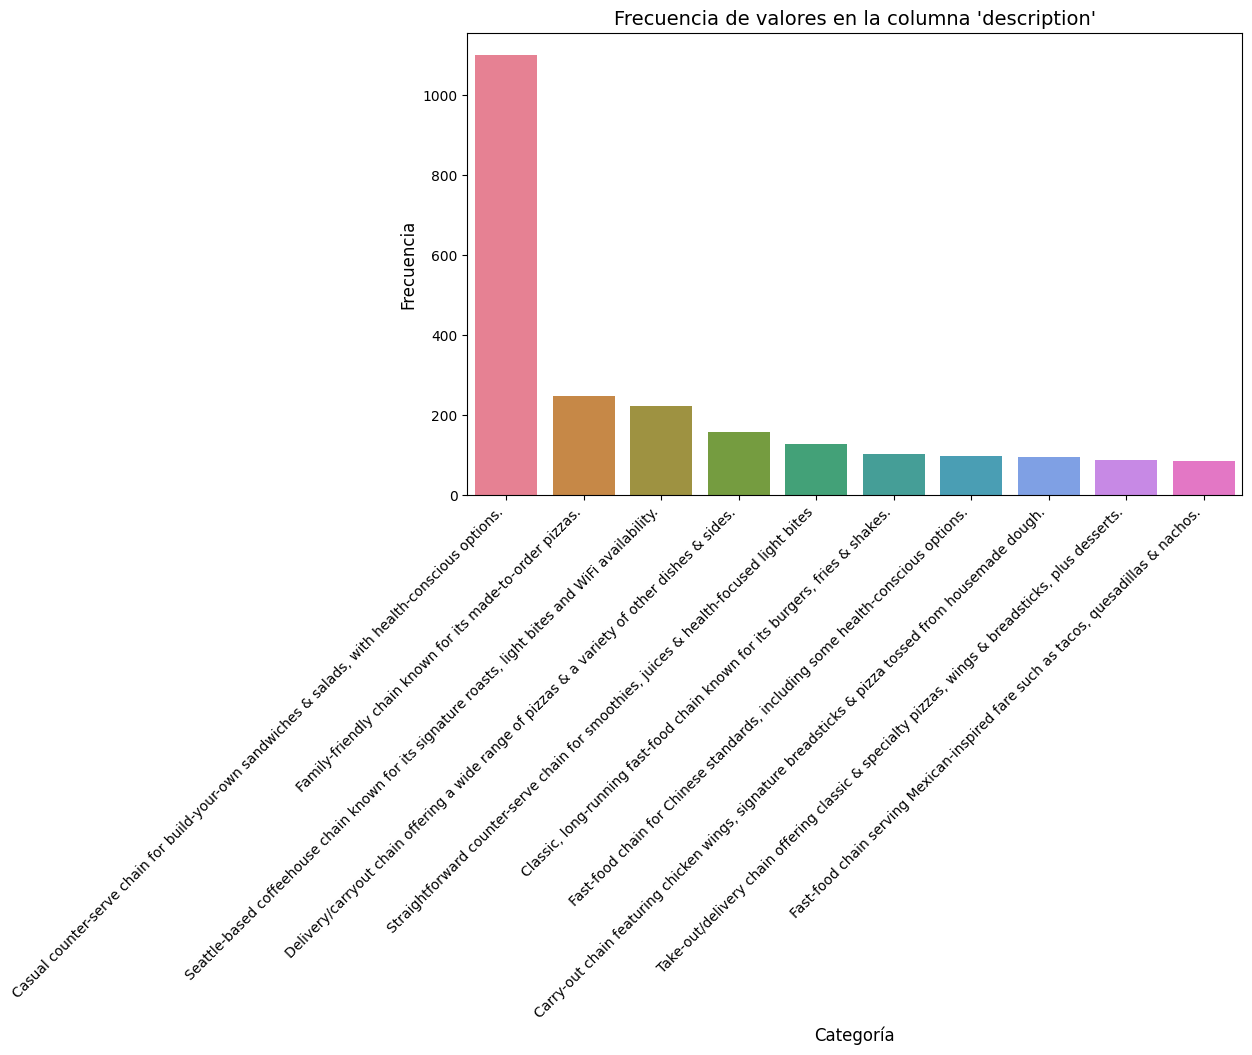

Mostrando el top 10 de categorías en la columna 'category'.


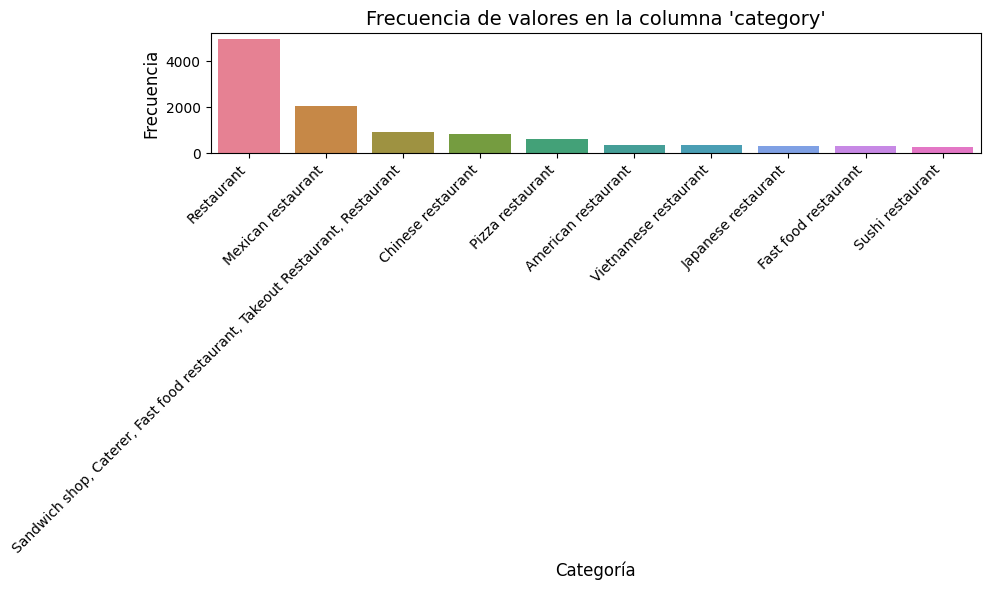

Mostrando el top 10 de categorías en la columna 'price'.


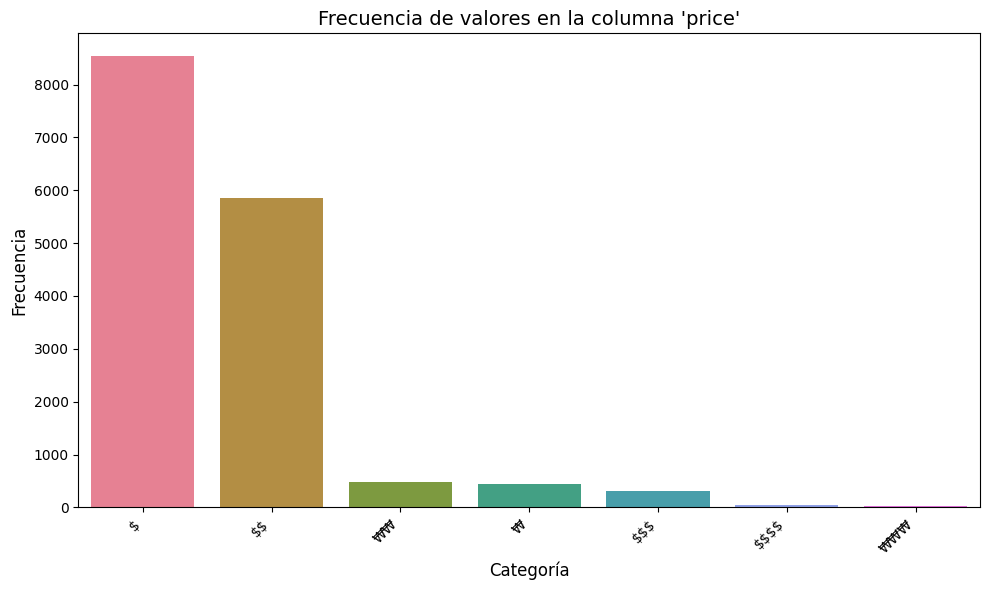

Mostrando el top 10 de categorías en la columna 'hours'.


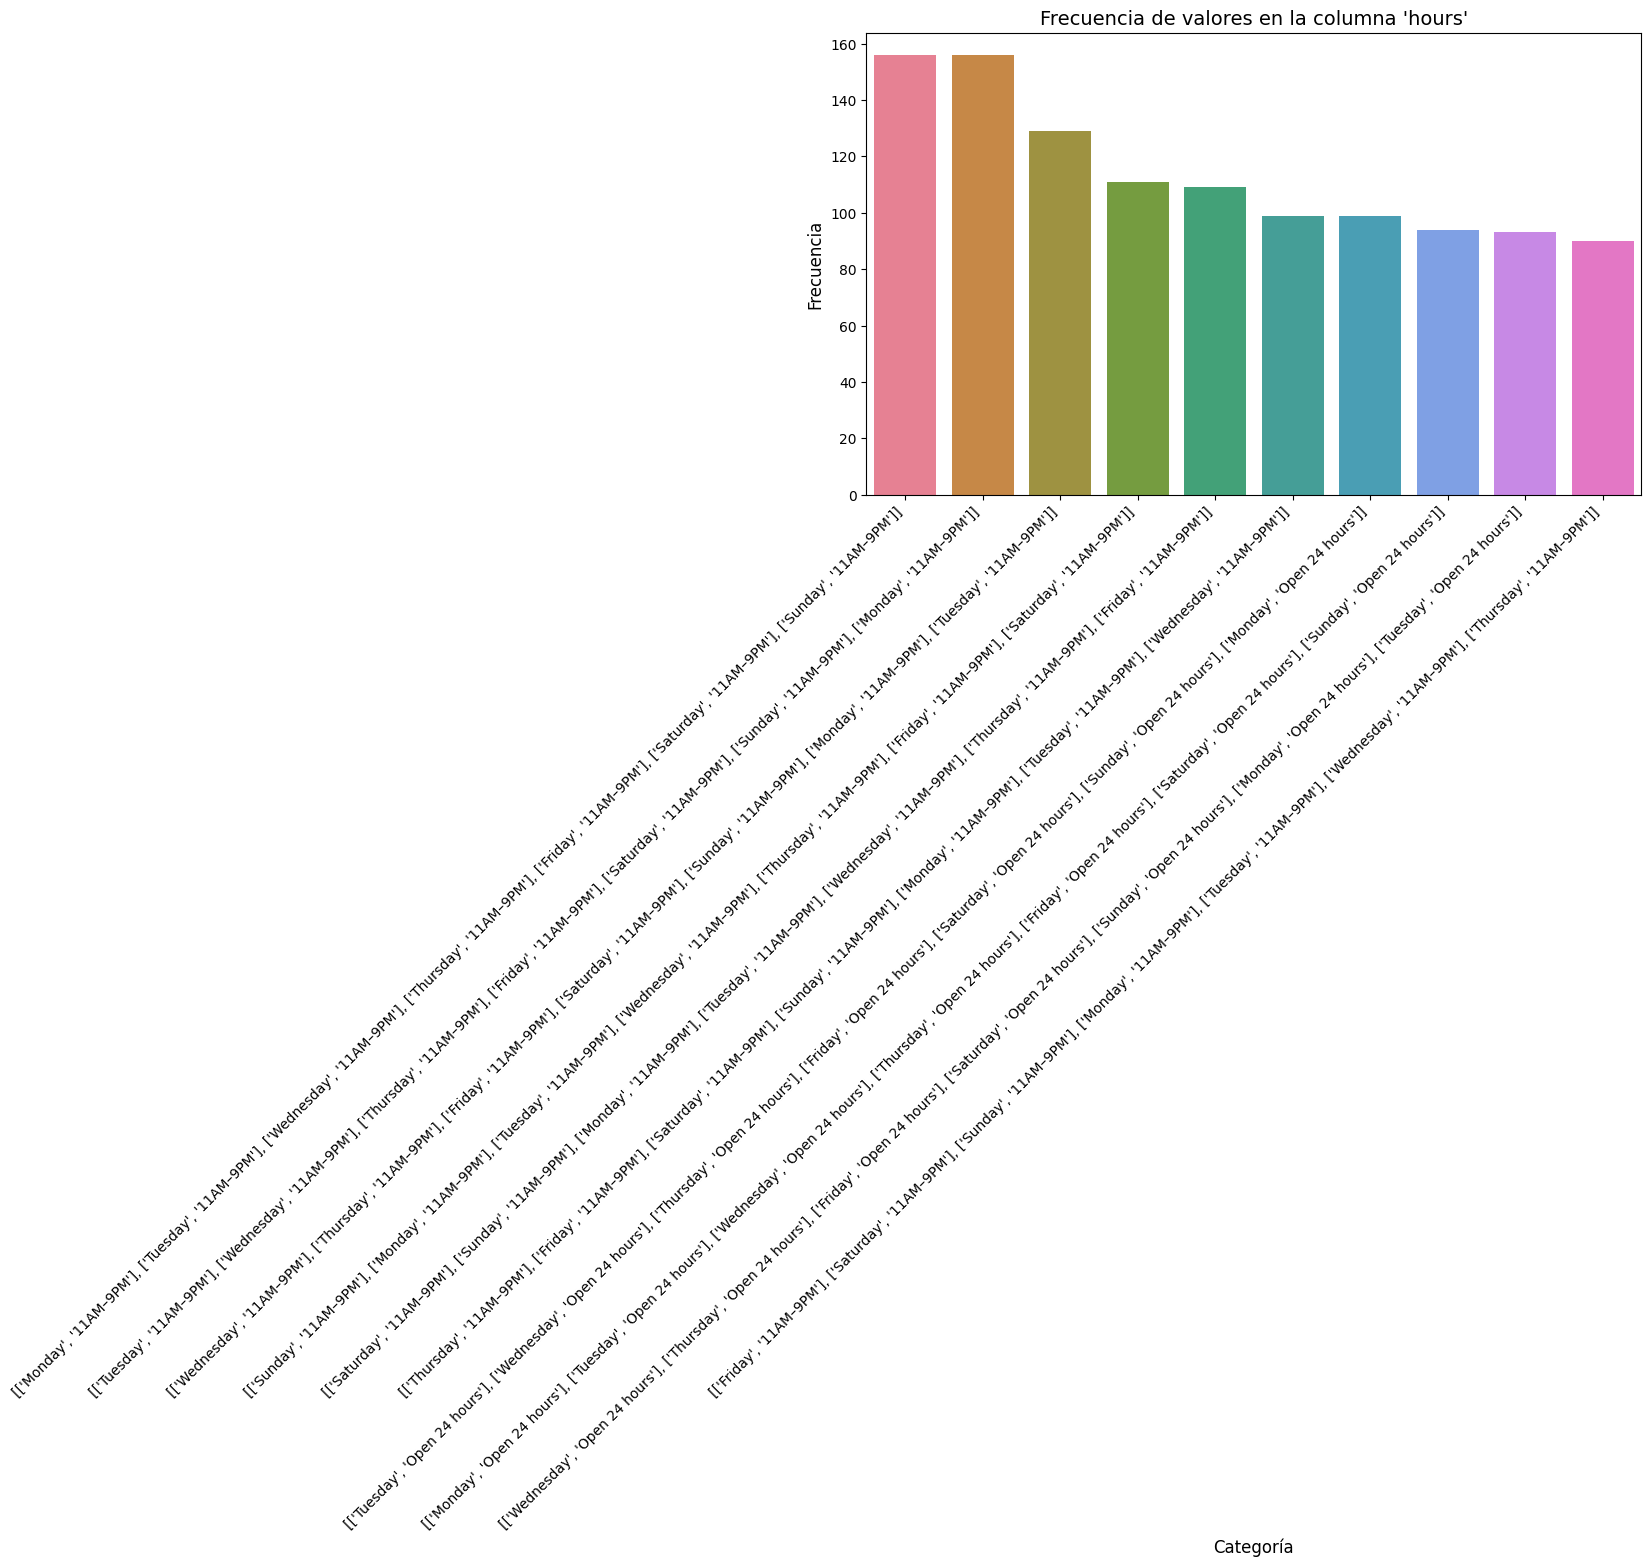

Mostrando el top 10 de categorías en la columna 'MISC'.


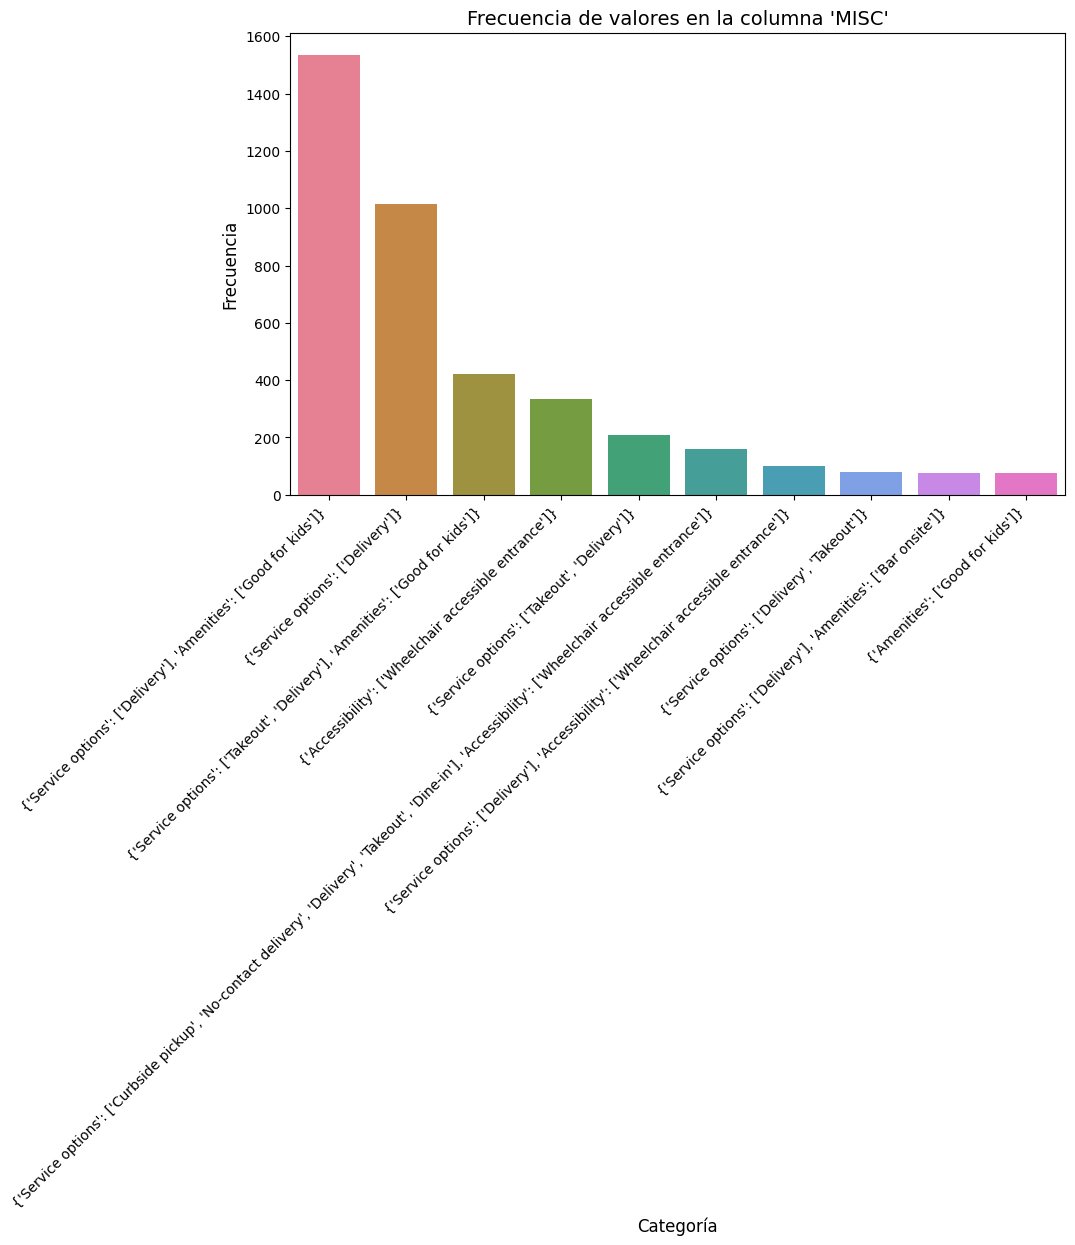

Mostrando el top 10 de categorías en la columna 'state'.


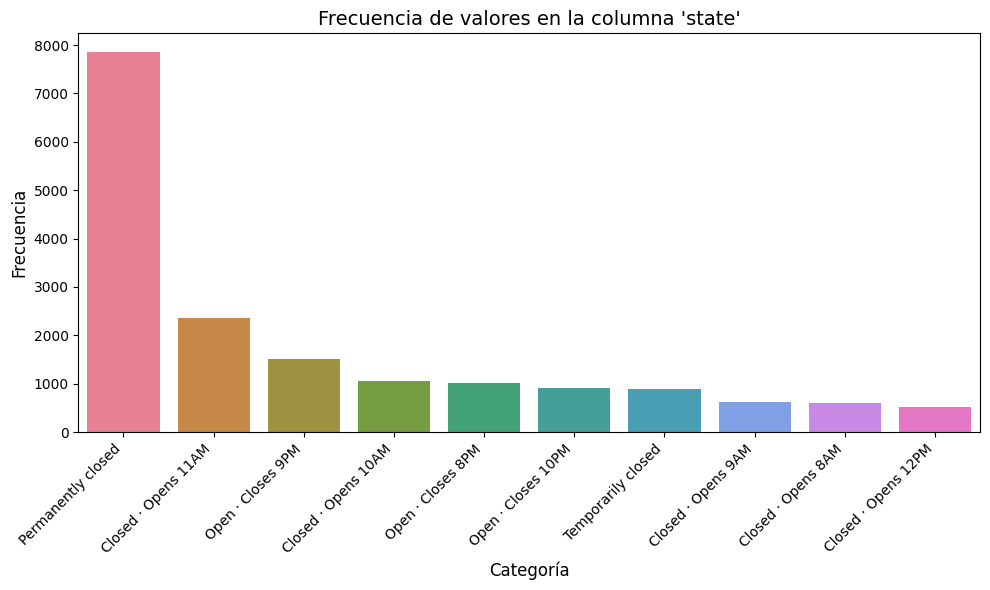

Mostrando el top 10 de categorías en la columna 'relative_results'.


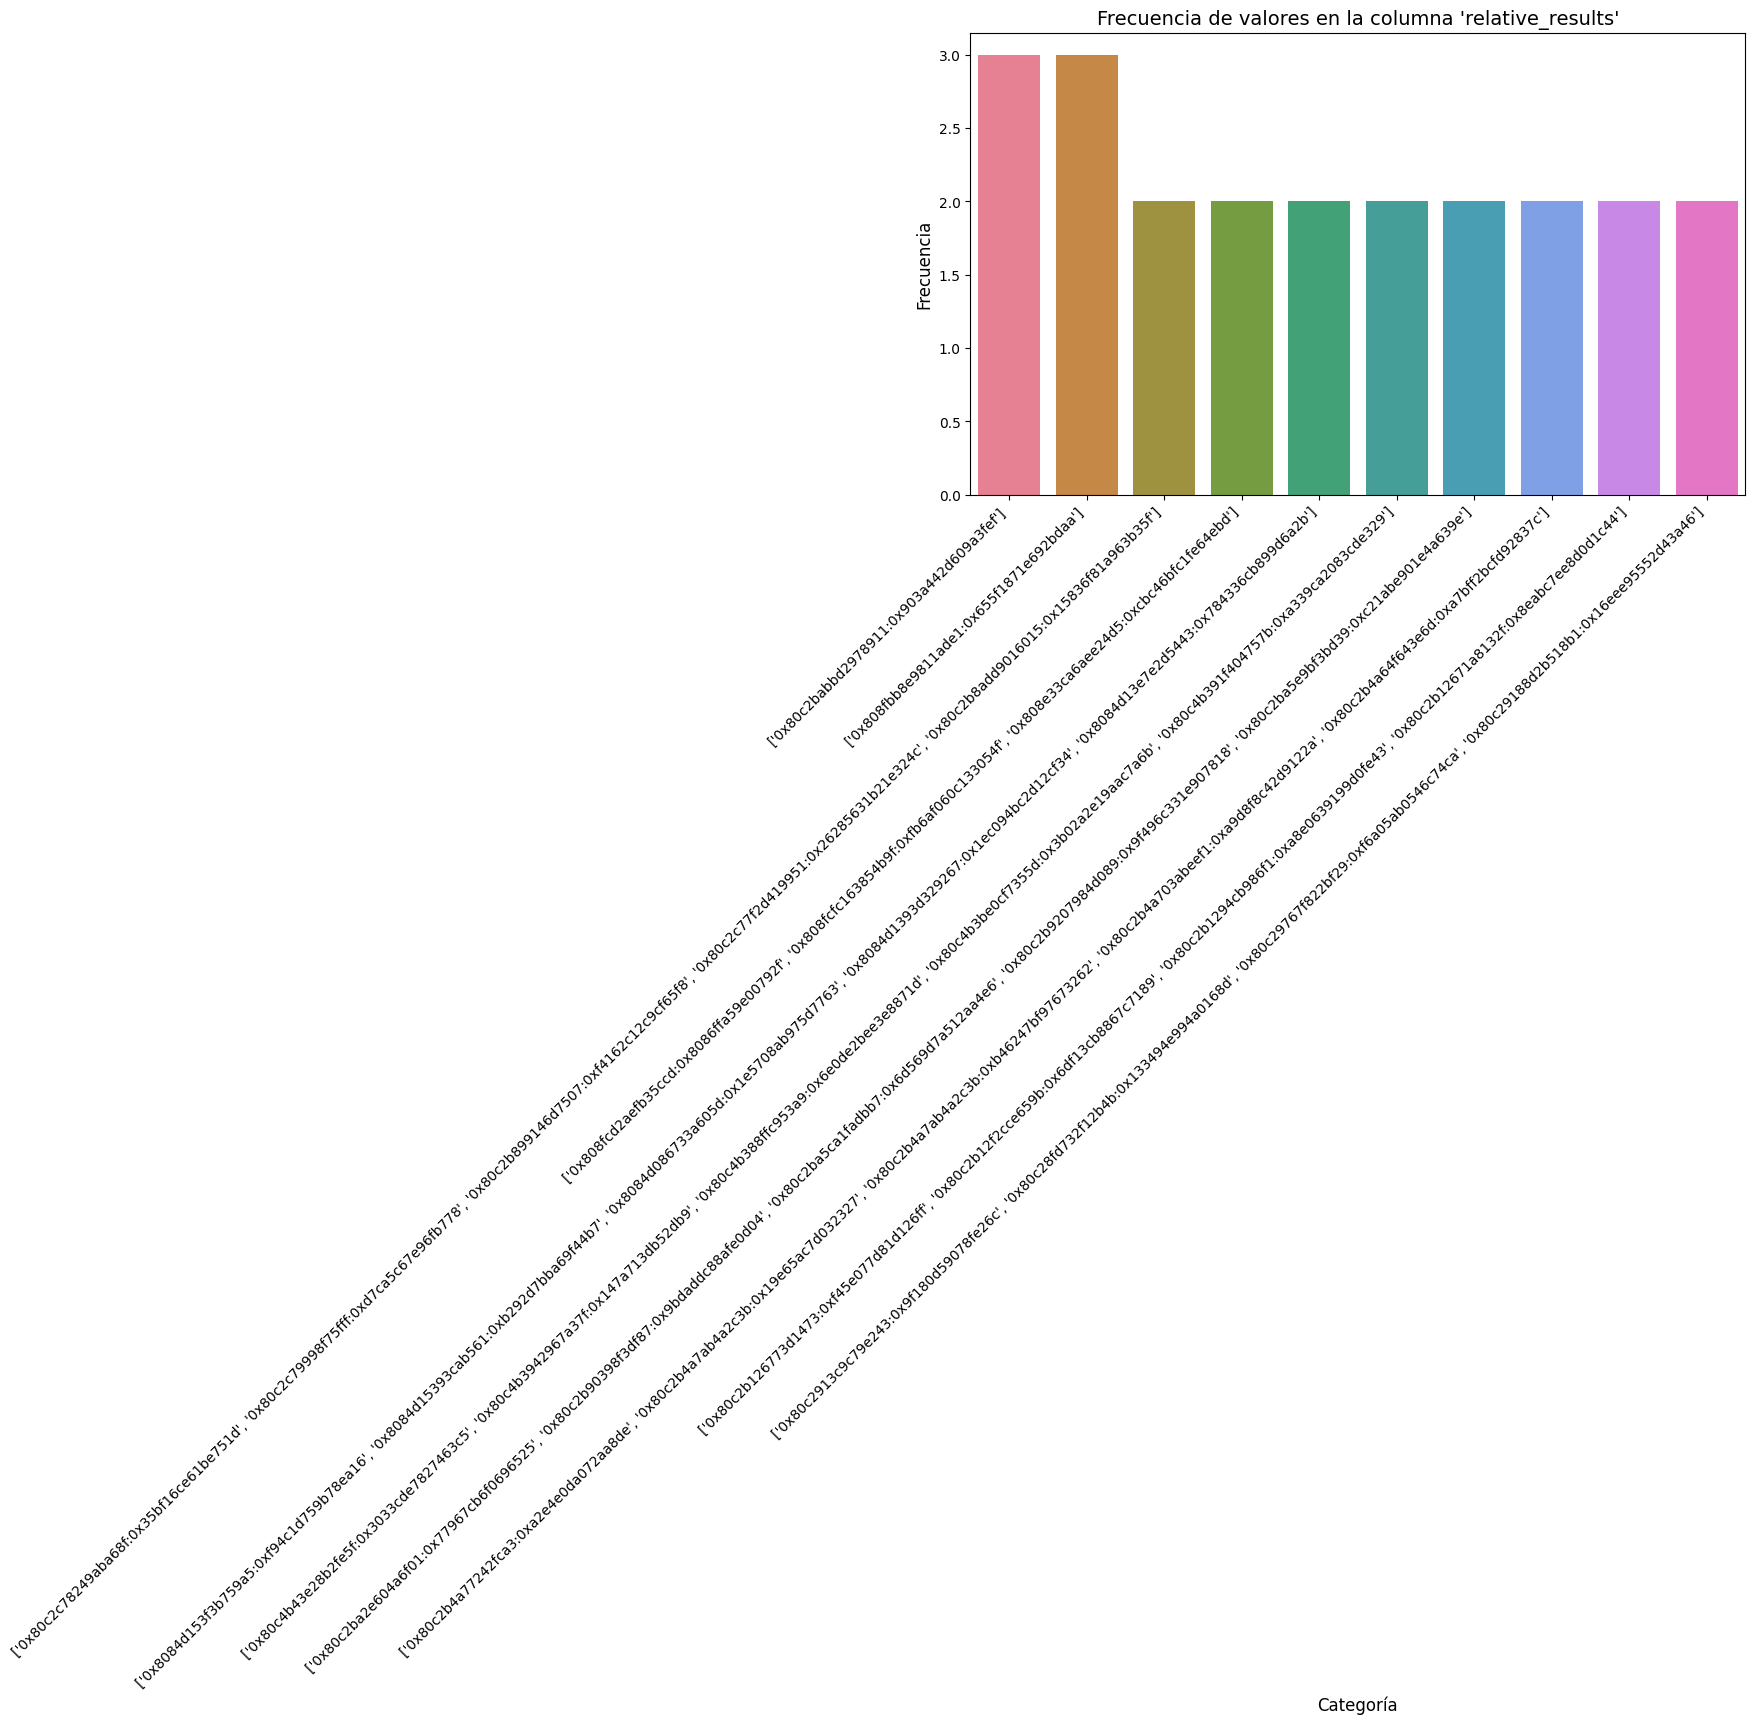

Mostrando el top 10 de categorías en la columna 'url'.


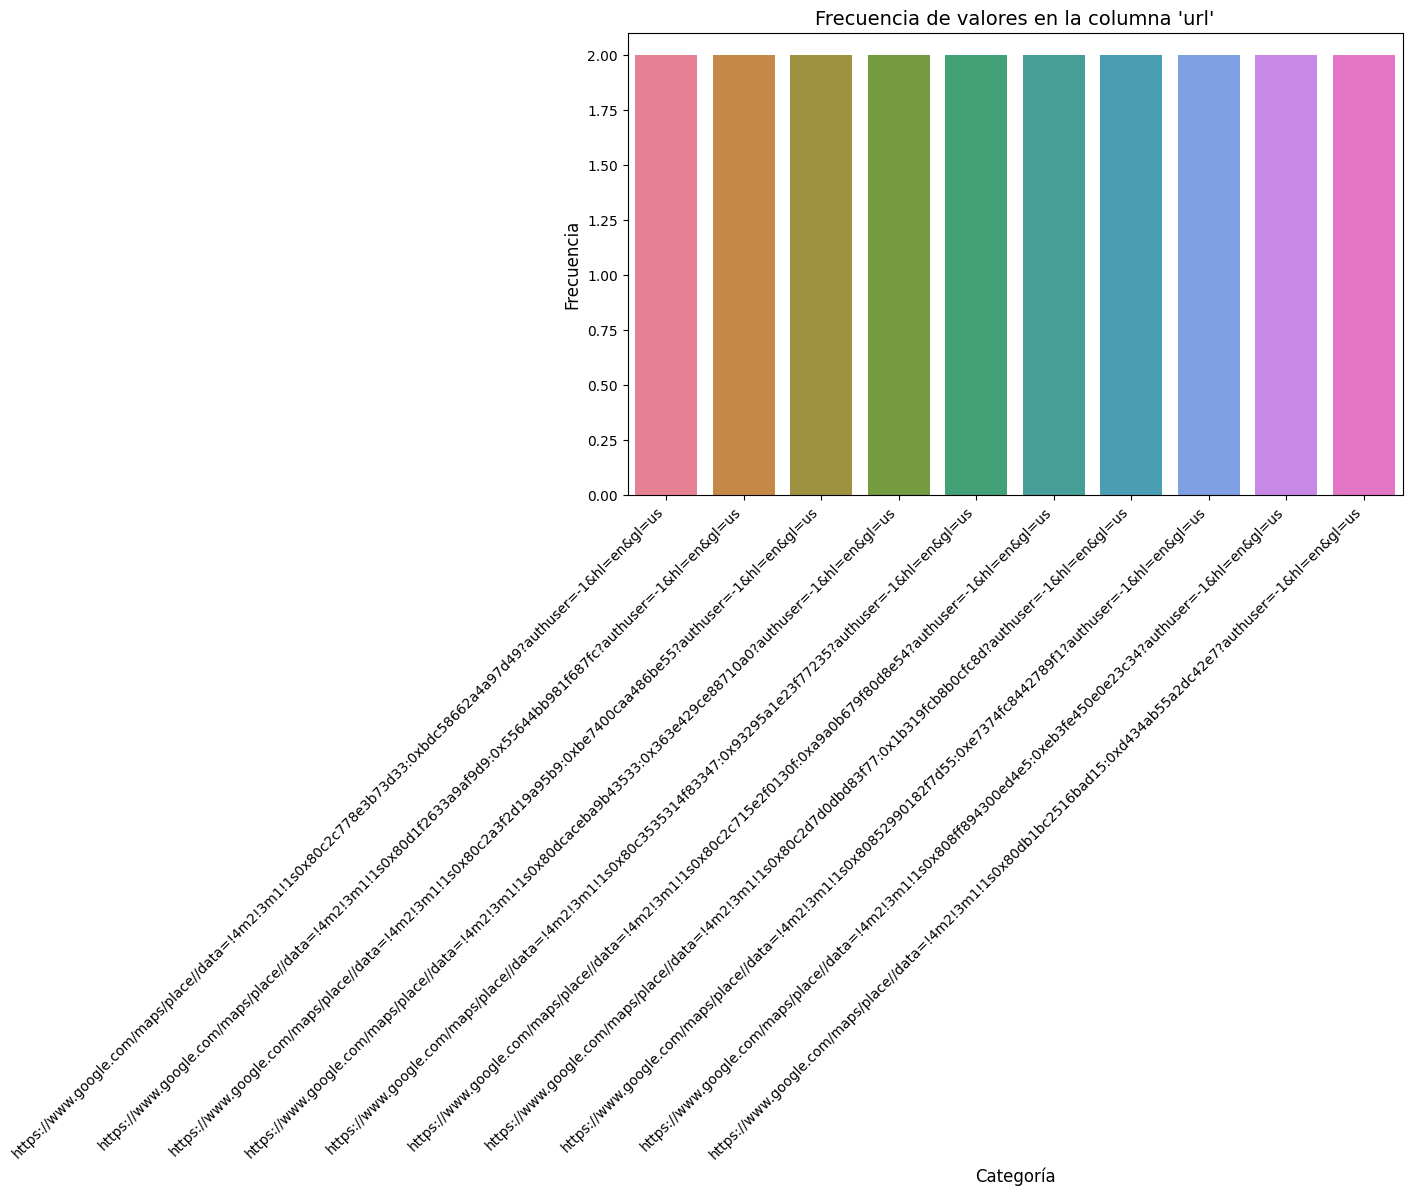

In [35]:
# Llamada a la función para generar gráficos de frecuencia con colores
generar_graficos_frecuencia_con_colores(metadata_california)

### ANALISIS 

Análisis Descriptivo Detallado del DataFrame
El DataFrame tiene un total de 32,501 registros distribuidos en 15 columnas con diversos tipos de datos y grados de completitud. A continuación se presenta un análisis exhaustivo de los datos, destacando tanto la calidad como las características clave de cada columna.

1. Resumen General del DataFrame:
- Tamaño: 32,501 filas y 15 columnas.
- Tamaño en memoria: Aproximadamente 3.7 MB.
- Tipos de datos:
    - 11 columnas de tipo object (texto).
    - 3 columnas de tipo float64 (valores numéricos con decimales).
    - 1 columna de tipo int64 (valores numéricos enteros).

Este conjunto de datos parece estar orientado a la recopilación de información sobre ubicaciones, con detalles como coordenadas geográficas, calificaciones, reseñas, horarios y descripciones. Sin embargo, varias columnas tienen un alto porcentaje de valores nulos, lo que podría complicar algunos análisis.

2. Análisis de Valores Nulos:

Descripción general:

Existen 7 columnas con valores nulos.
La proporción de valores faltantes varía entre 0.54% y 65.07%.

      Columna  	  Valores nulos    	Porcentaje nulos
    - description	     21,148	           65.07%
    - price	             16,794	           51.67%
    - relative_results	  5,919	           18.21%
    - hours	              2,951	            9.08%
    - state	              2,895	            8.91%
    - MISC	            367,000	            1.13%
    - address	        175,000             0.54%
    

Las columnas con mayor proporción de nulos son description y price, lo que podría indicar que esta información no siempre es relevante o fácilmente disponible para todas las ubicaciones.
Otras columnas con valores faltantes incluyen relative_results, hours, y state, lo que sugiere una falta de información consistente sobre horarios y ubicaciones geográficas específicas.

3. Análisis de Filas Duplicadas:
Se encontraron 157 filas duplicadas en el conjunto de datos. Estas filas deben ser eliminadas o tratadas para evitar problemas en el análisis posterior, ya que pueden sesgar los resultados o inflar métricas como el promedio de calificaciones o el número de reseñas.

4. Análisis Estadístico de avg_rating:
La columna avg_rating ofrece información sobre la calificación promedio de las ubicaciones, lo que es crucial para entender la calidad percibida por los usuarios. A continuación se detallan las estadísticas más relevantes de esta columna:

    - Media: 4.21

    - Mediana: 4.3

    - Desviación estándar: 0.52

    - Outliers: Se detectaron 1,283 outliers. Estos valores extremos podrían representar ubicaciones con una reputación notablemente baja o alta, lo cual merece un análisis más detallado.

Interpretación: La media y la mediana de las calificaciones son relativamente altas, lo que sugiere que la mayoría de las ubicaciones están bien valoradas por los usuarios. Sin embargo, los outliers deben ser investigados, ya que podrían ser el resultado de calificaciones atípicas o incorrectas.

5. Análisis Detallado por Columna:

    - name:

        - Valores nulos: Ninguno.
        - Tipo de dato: object.
        - Descripción: Contiene el nombre de cada ubicación. Esta columna parece estar completa y puede usarse para identificar los establecimientos de manera única.

    - address:

        - Valores nulos: 175 (0.54%).
        - Tipo de dato: object.
        - Descripción: Dirección física de las ubicaciones. Aunque el porcentaje de valores faltantes es bajo, la calidad de esta información es importante para la geolocalización y         - análisis de distribución espacial.

    - gmap_id:

        - Valores nulos: Ninguno.
        - Tipo de dato: object.
        - Descripción: Identificador único en Google Maps. Es probable que esta columna sea clave para vincular datos con información adicional externa, lo que puede ser valioso para        - integraciones o enriquecimientos de datos.

    - description:

        - Valores nulos: 21,148 (65.07%).
        - Tipo de dato: object.
        - Descripción: Descripción del establecimiento. Más de la mitad de las ubicaciones no tienen descripción, lo que podría limitar los análisis que dependen de esta información (por        - ejemplo, análisis de sentimiento).

    - latitude y longitude:

        - Valores nulos: Ninguno.
        - Tipo de dato: float64.
        - Descripción: Coordenadas geográficas de las ubicaciones. Estos campos permiten realizar análisis espaciales y son cruciales para la visualización de los datos en mapas.

    - category:

        - Valores nulos: Ninguno.
        - Tipo de dato: object.
        - Descripción: Categoría o clasificación del lugar. Esta columna puede ser útil para segmentar los datos por tipo de establecimiento.

    - avg_rating:

        - Valores nulos: Ninguno.
        - Tipo de dato: float64.
        - Descripción: Calificación promedio. Como se mencionó anteriormente, la mayoría de las calificaciones son positivas, aunque hay una cantidad significativa de outliers que       - requieren atención.

    - num_of_reviews:

        - Valores nulos: Ninguno.
        - Tipo de dato: int64.
        - Descripción: Número de reseñas recibidas. Esta columna puede estar correlacionada con la popularidad de los lugares, y su análisis junto con la calificación promedio podría        - proporcionar una visión más clara de la calidad percibida.

    - price:

        - Valores nulos: 16,794 (51.67%).
        - Tipo de dato: object.
        - Descripción: Información sobre precios. La mitad de las ubicaciones carecen de esta información, lo que puede dificultar el análisis de costos o accesibilidad.

    - hours:

        - Valores nulos: 2,951 (9.08%).
        - Tipo de dato: object.
        - Descripción: Horarios de operación. Casi el 10% de las ubicaciones no tienen esta información, lo que podría ser un desafío para analizar patrones de actividad.

    - MISC:

        - Valores nulos: 367 (1.13%).
        - Tipo de dato: object.
        - Descripción: Sin información clara sobre su significado, pero tiene pocos valores nulos.

    - state:

        - Valores nulos: 2,895 (8.91%).
        - Tipo de dato: object.
        - Descripción: Estado o región donde se encuentra la ubicación. Aunque el porcentaje de valores faltantes es moderado, es fundamental para análisis geográficos.

    - relative_results:

        - Valores nulos: 5,919 (18.21%).
        - Tipo de dato: object.
        - Descripción: Resultados relativos o comparativos, probablemente relacionados con otras ubicaciones en la misma categoría o área. Tiene una cantidad considerable de valores faltantes.

    - url:

        - Valores nulos: Ninguno.
        - Tipo de dato: object.
        - Descripción: Enlace web a la ubicación o información adicional.



### CONCLUSION

1. Manejo de Valores Faltantes:

    - El DataFrame presenta un número significativo de columnas con valores nulos, lo cual es crucial para la calidad y el análisis de los datos:

    - Altos porcentajes de valores nulos: Las columnas description, price, y relative_results tienen más de un 50% de valores faltantes. Estas columnas deben ser evaluadas cuidadosamente para decidir si se deben imputar, eliminar o si simplemente se deben ignorar para ciertos análisis. La falta de información en estas columnas puede limitar el análisis y la interpretación de los datos, por lo que es fundamental decidir cómo manejar estos valores faltantes según su relevancia para los objetivos del análisis.

    - Otras columnas con valores faltantes: hours, state, y MISC también presentan valores nulos, aunque en menor proporción. Estas columnas deben recibir atención adicional para garantizar que la información disponible sea lo más completa posible. Dependiendo del análisis específico, se pueden considerar técnicas de imputación o la eliminación de registros incompletos.

2. Calificaciones y Reseñas:

    - Tendencia en calificaciones: La columna avg_rating muestra una tendencia hacia calificaciones altas, lo que indica que la mayoría de las ubicaciones tienen una buena recepción por parte de los usuarios. Sin embargo, se deben investigar los outliers detectados, ya que representan calificaciones atípicas que podrían revelar anomalías o errores en los datos, o bien características especiales de ciertas ubicaciones que merecen un análisis más profundo.

    - Consistencia en la cantidad de reseñas: La columna num_of_reviews muestra una cantidad de reseñas consistente entre los registros. Esto sugiere que, en general, las ubicaciones tienen un volumen razonable de reseñas, lo cual puede ser útil para analizar la relación entre la cantidad de reseñas y las calificaciones promedio.

3. Limpieza de Datos:

    - Filas duplicadas: Se identificaron 157 filas duplicadas en el DataFrame. Es importante eliminar estas filas para evitar distorsiones en el análisis, ya que las duplicaciones pueden sesgar los resultados y afectar la precisión de las métricas calculadas.

    - Imputación de valores faltantes: Para las columnas con valores nulos, se recomienda considerar técnicas de imputación, siempre y cuando la columna sea relevante para el análisis. Alternativamente, se puede optar por eliminar las columnas o registros con demasiados valores faltantes si su ausencia afecta significativamente el análisis.

    - Resumen: Este análisis proporciona una base sólida para la limpieza y transformación de datos, subrayando la importancia de tratar los valores faltantes, eliminar duplicados y examinar los outliers. Con estos pasos, el DataFrame estará mejor preparado para un análisis más preciso y significativo, especialmente en términos de calidad percibida, patrones de precios, y distribución espacial de las ubicaciones.

__________________________________________________________________________________________________________________________________________________________________________________

# REVIEWS CALIFORNIA GOOGLE


In [36]:
reviews_california = pd.read_csv('Reviews california.csv')

In [37]:
reviews_california

user_id             name           time  rating  \
0        1.089912e+20          Song Ro  1609909927056       5   
1        1.112903e+20      Rafa Robles  1612849648663       5   
2        1.126404e+20        David Han  1583643882296       4   
3        1.174403e+20      Anthony Kim  1551938216355       5   
4        1.005808e+20    Mario Marzouk  1494910901933       5   
...               ...              ...            ...     ...   
2699995  1.139124e+20   Mayur Senjalia  1553382802382       5   
2699996  1.180461e+20   Dennis Barrios  1509453169393       5   
2699997  1.071072e+20          gena807  1614453586811       4   
2699998  1.172404e+20     Anant Khadke  1569739943903       5   
2699999  1.117537e+20  Phillip Uyesato  1521661727317       5   

                                                     text pics resp  \
0                            Love there korean rice cake.  NaN  NaN   
1                                          Good very good  NaN  NaN   
2        They make Korean traditional food very properly.  NaN  NaN   
3                          Short ribs are very delicious.  NaN  NaN   
4            Great food and prices the portions are large  NaN  NaN   
...                                                   ...  ...  ...   
2699995                                               NaN  NaN  NaN   
2699996                                               NaN  NaN  NaN   
2699997                                               NaN  NaN  NaN   
2699998                                               NaN  NaN  NaN   
2699999                                               NaN  NaN  NaN   

                                       gmap_id  
0        0x80c2c778e3b73d33:0xbdc58662a4a97d49  
1        0x80c2c778e3b73d33:0xbdc58662a4a97d49  
2        0x80c2c778e3b73d33:0xbdc58662a4a97d49  
3        0x80c2c778e3b73d33:0xbdc58662a4a97d49  
4        0x80c2c778e3b73d33:0xbdc58662a4a97d49  
...                                        ...  
2699995  0x808fc0c19ba4e761:0x589c9ad71c62a420  
2699996  0x808fc0c19ba4e761:0x589c9ad71c62a420  
2699997  0x808fc0c19ba4e761:0x589c9ad71c62a420  
2699998  0x808fc0c19ba4e761:0x589c9ad71c62a420  
2699999  0x808fc0c19ba4e761:0x589c9ad71c62a420  

[2700000 rows x 8 columns]

In [79]:
# Analizamos nulos en el dataframe
analizar_nulos(reviews_california)

INFORMACIÓN DEL DATAFRAME:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700000 entries, 0 to 2699999
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 164.8+ MB

--------------------------------------------------

Valores nulos en el DataFrame:
user_id          0
name             7
time             0
rating           0
text       1170997
pics       2600710
resp       2454831
gmap_id          0
dtype: int64

Porcentaje de valores nulos en cada columna:
user_id     0.00
name        0.00
time        0.00
rating      0.00
text       43.37
pics       96.32
resp       90.92
gmap_id     0.00
dtype: float64

--------------------------------------------------


Detección de valores nulos específicos en el DataFrame:

-------------------

In [57]:
# Analizamos outliers y estadísticas de datos
analisis_general(reviews_california, 'reviews_california')



ANÁLISIS DEL DATAFRAME REVIEWS_CALIFORNIA

Columnas con valores faltantes:
name          7
text    1170997
pics    2600710
resp    2454831
dtype: int64

Hay 75242 filas duplicadas.

--------------------------------------------------------------------------------

Estadísticas para la columna time:
  Media: 1551463515749.2568
  Mediana: 1555199404014.0
  Desviación estándar: 46481642493.21213
  Cantidad de outliers: 36015

Filas con Outliers en time:

              user_id              name           time  rating  \
160      1.105134e+20    Patty McIntosh  1397679104451       4   
184      1.093050e+20        jack kubik  1366427331627       2   
187      1.093050e+20        jack kubik  1366427331627       2   
263      1.180766e+20    steve phillips  1324144190767       5   
353      1.068863e+20       Rambo House  1387157158847       3   
...               ...               ...            ...     ...   
2697590  1.053329e+20          Jack Chu  1423721679584       5   
2697680  1.1111

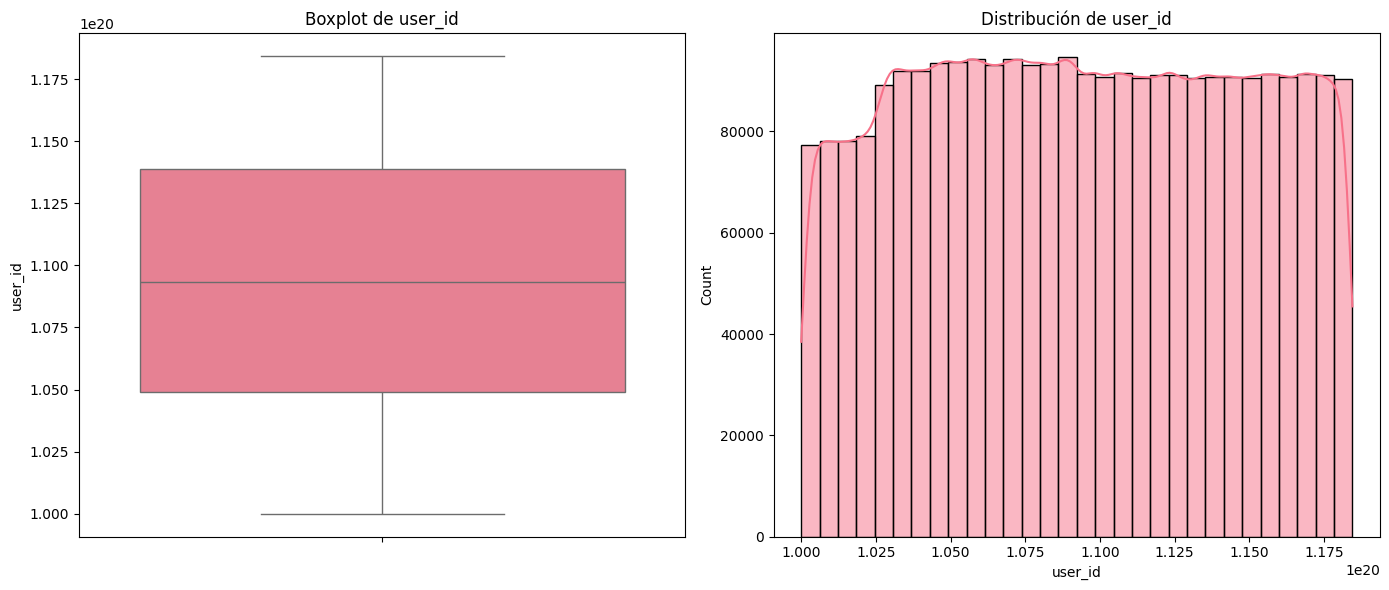

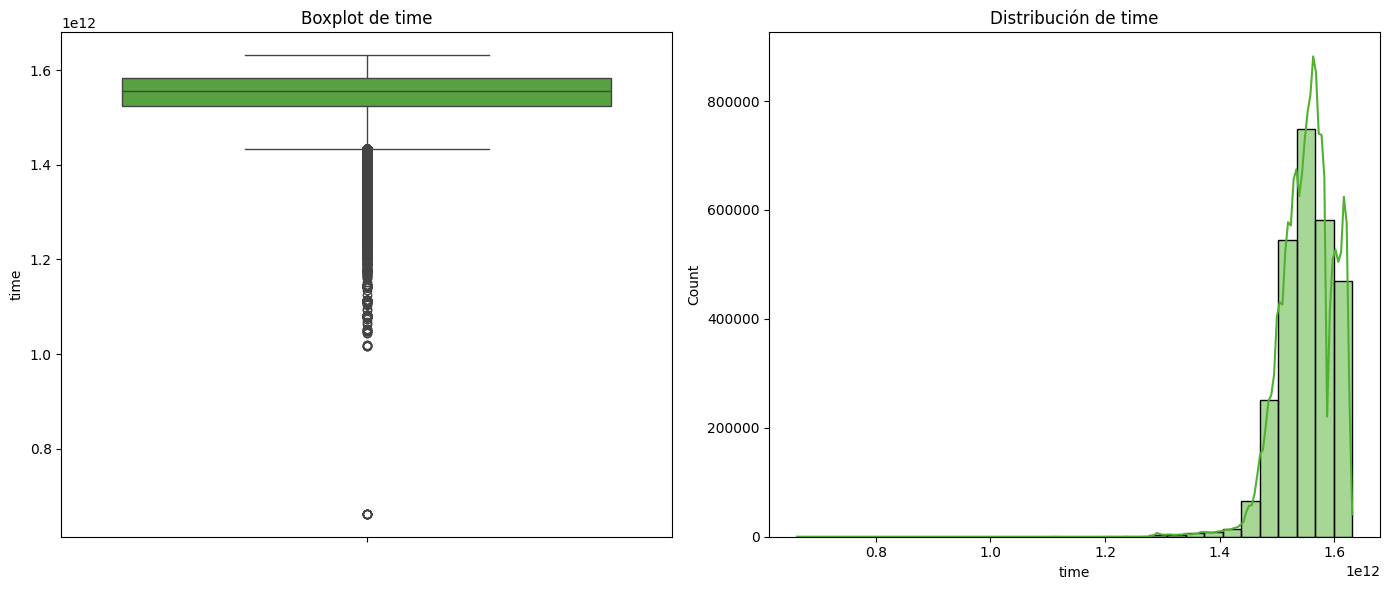

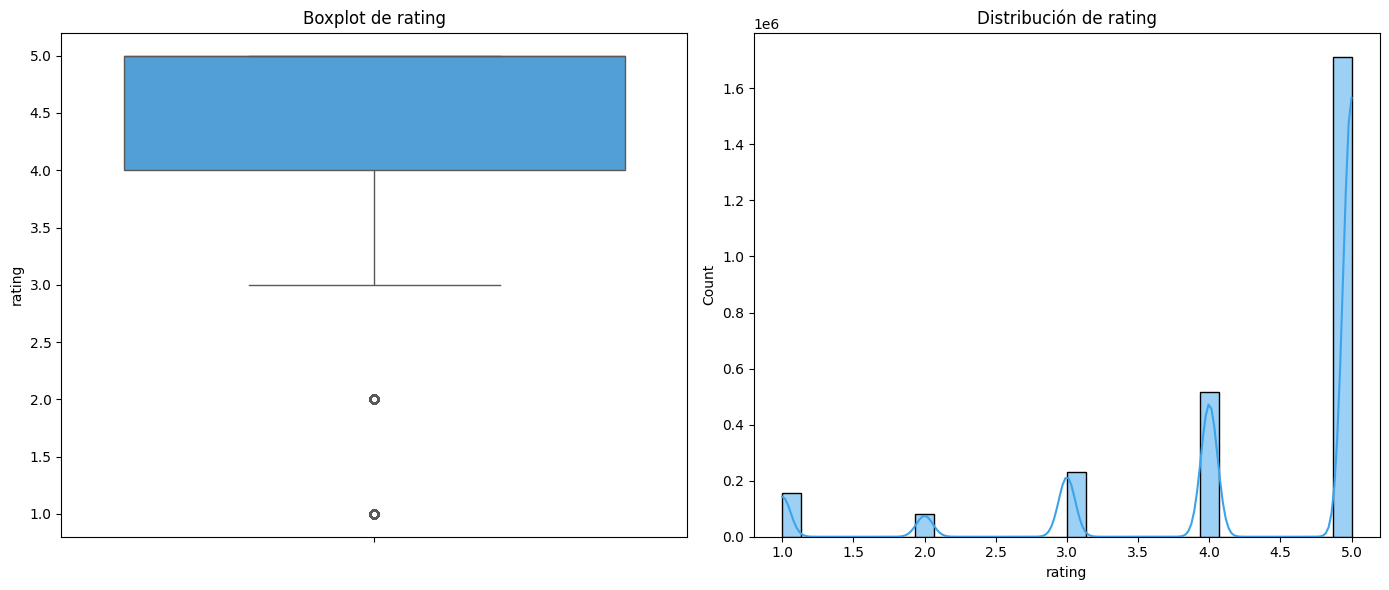

In [62]:
# Llamada a la función para generar gráficos para el DataFrame reviews_california
generar_graficos_numericos(reviews_california)

Mostrando el top 10 de categorías en la columna 'name'.


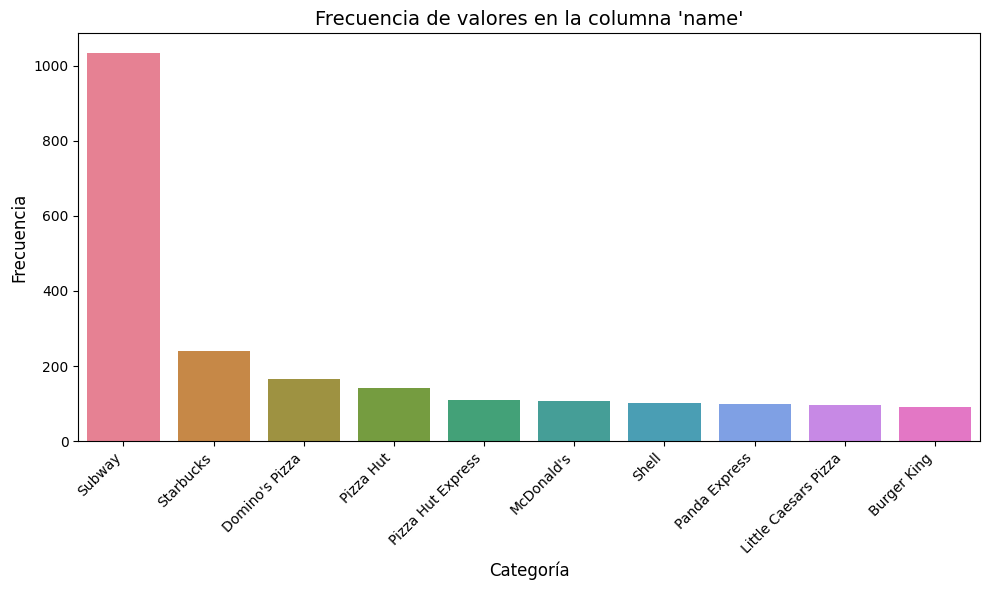

Mostrando el top 10 de categorías en la columna 'address'.


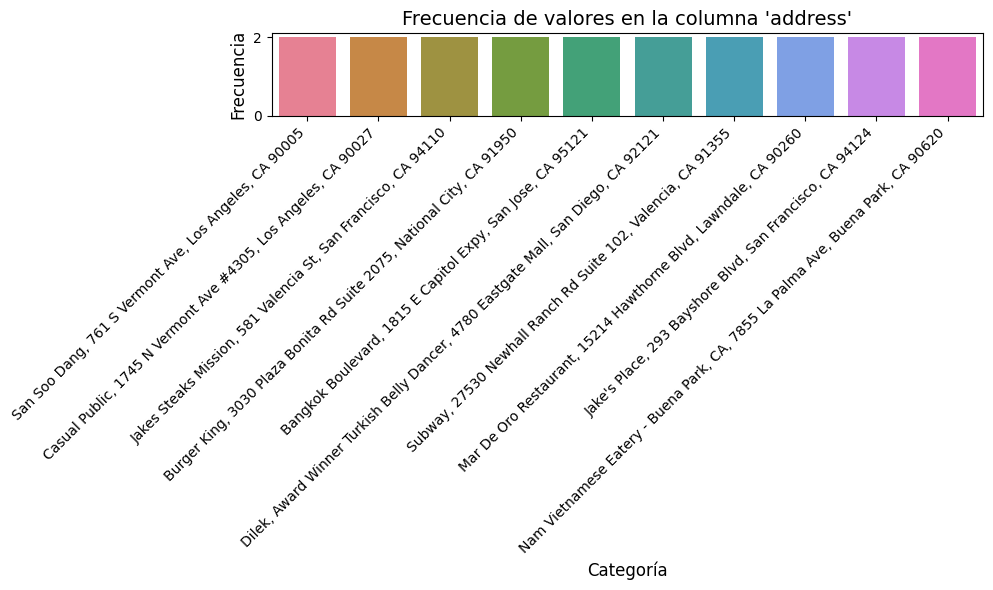

Mostrando el top 10 de categorías en la columna 'gmap_id'.


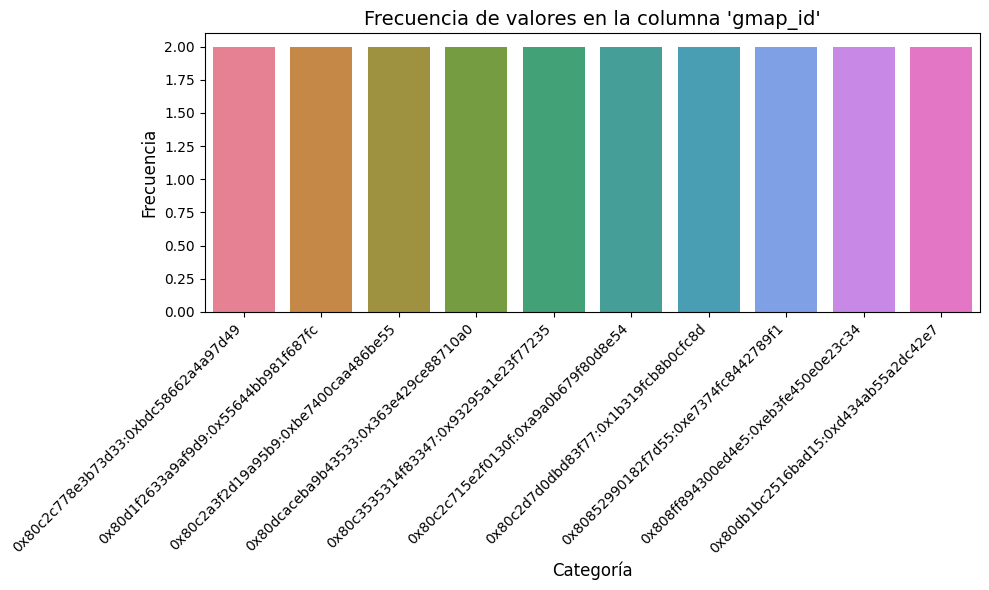

Mostrando el top 10 de categorías en la columna 'description'.


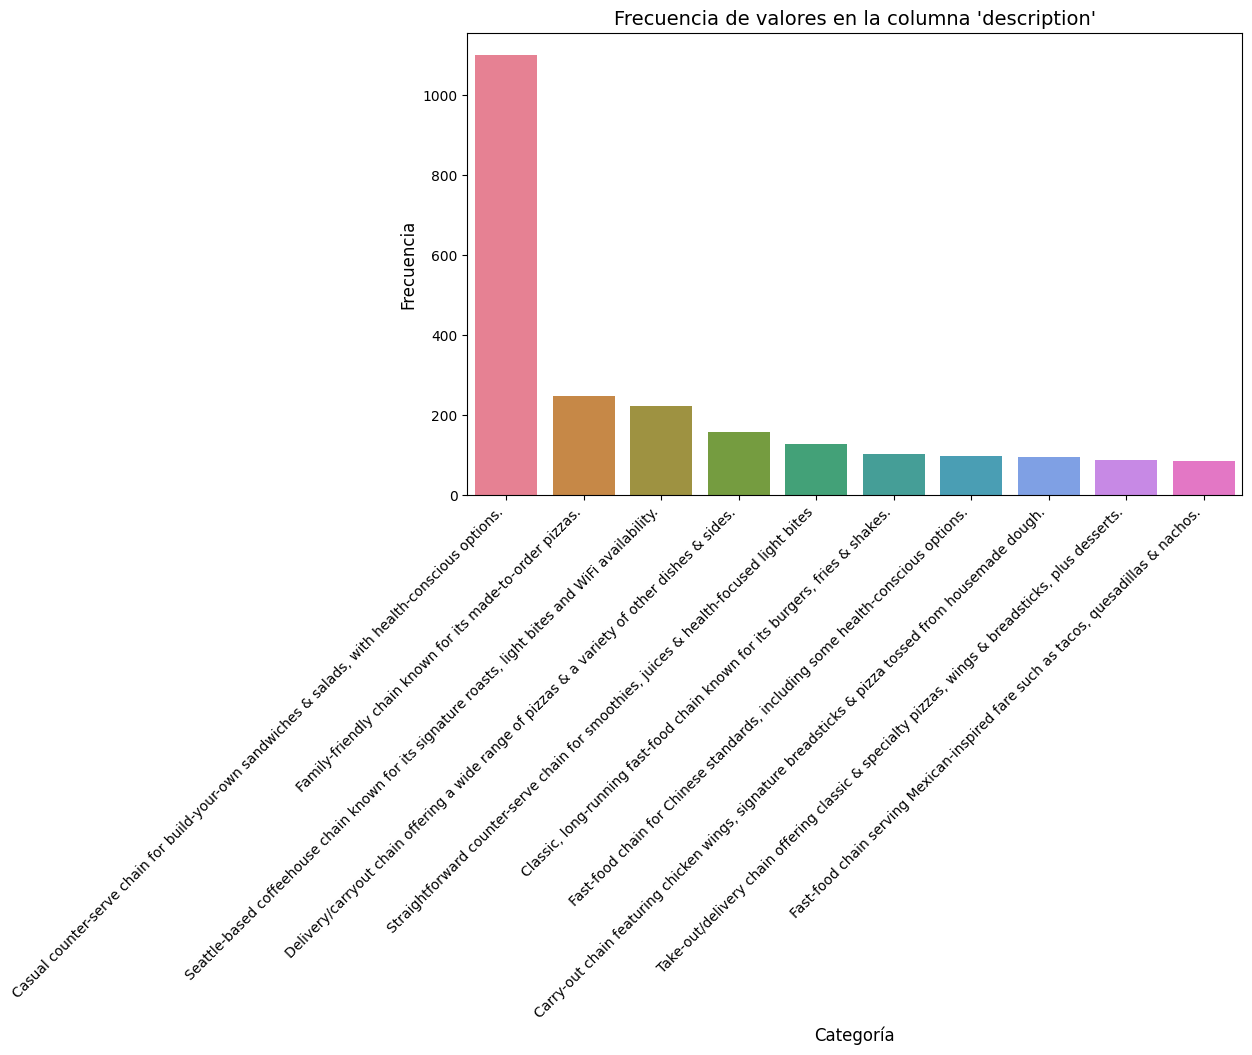

Mostrando el top 10 de categorías en la columna 'category'.


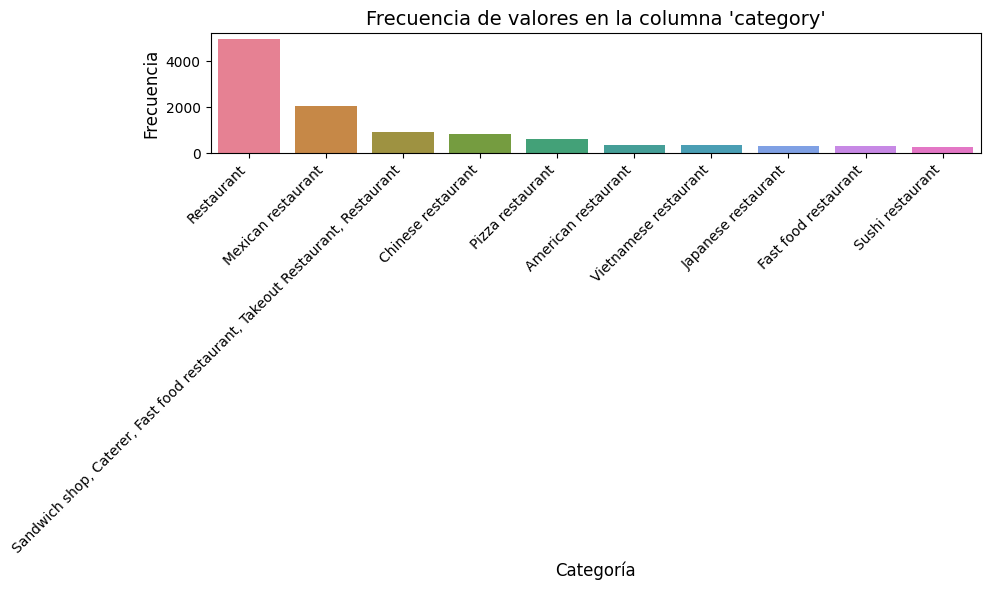

Mostrando el top 10 de categorías en la columna 'price'.


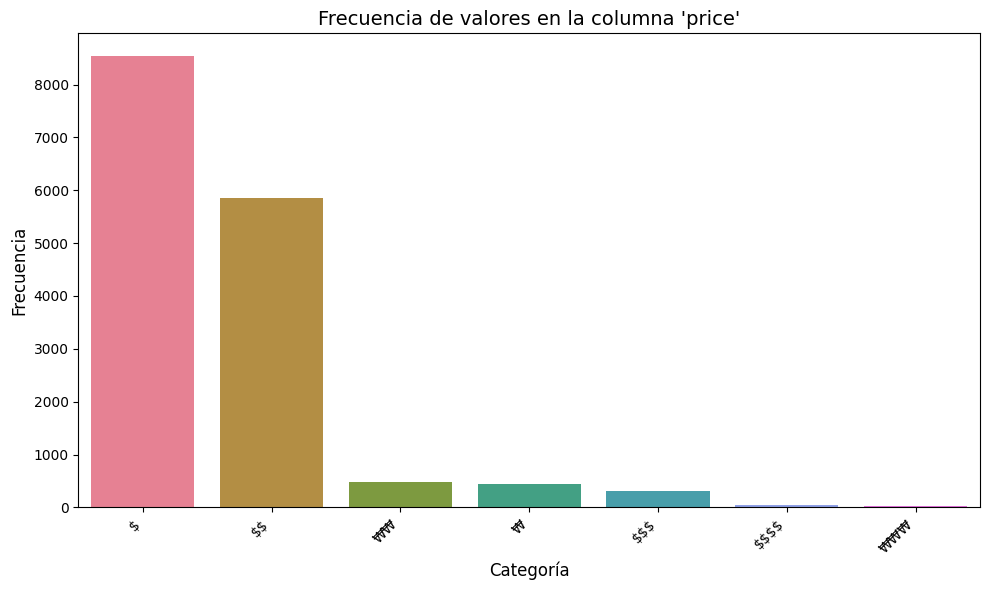

Mostrando el top 10 de categorías en la columna 'hours'.


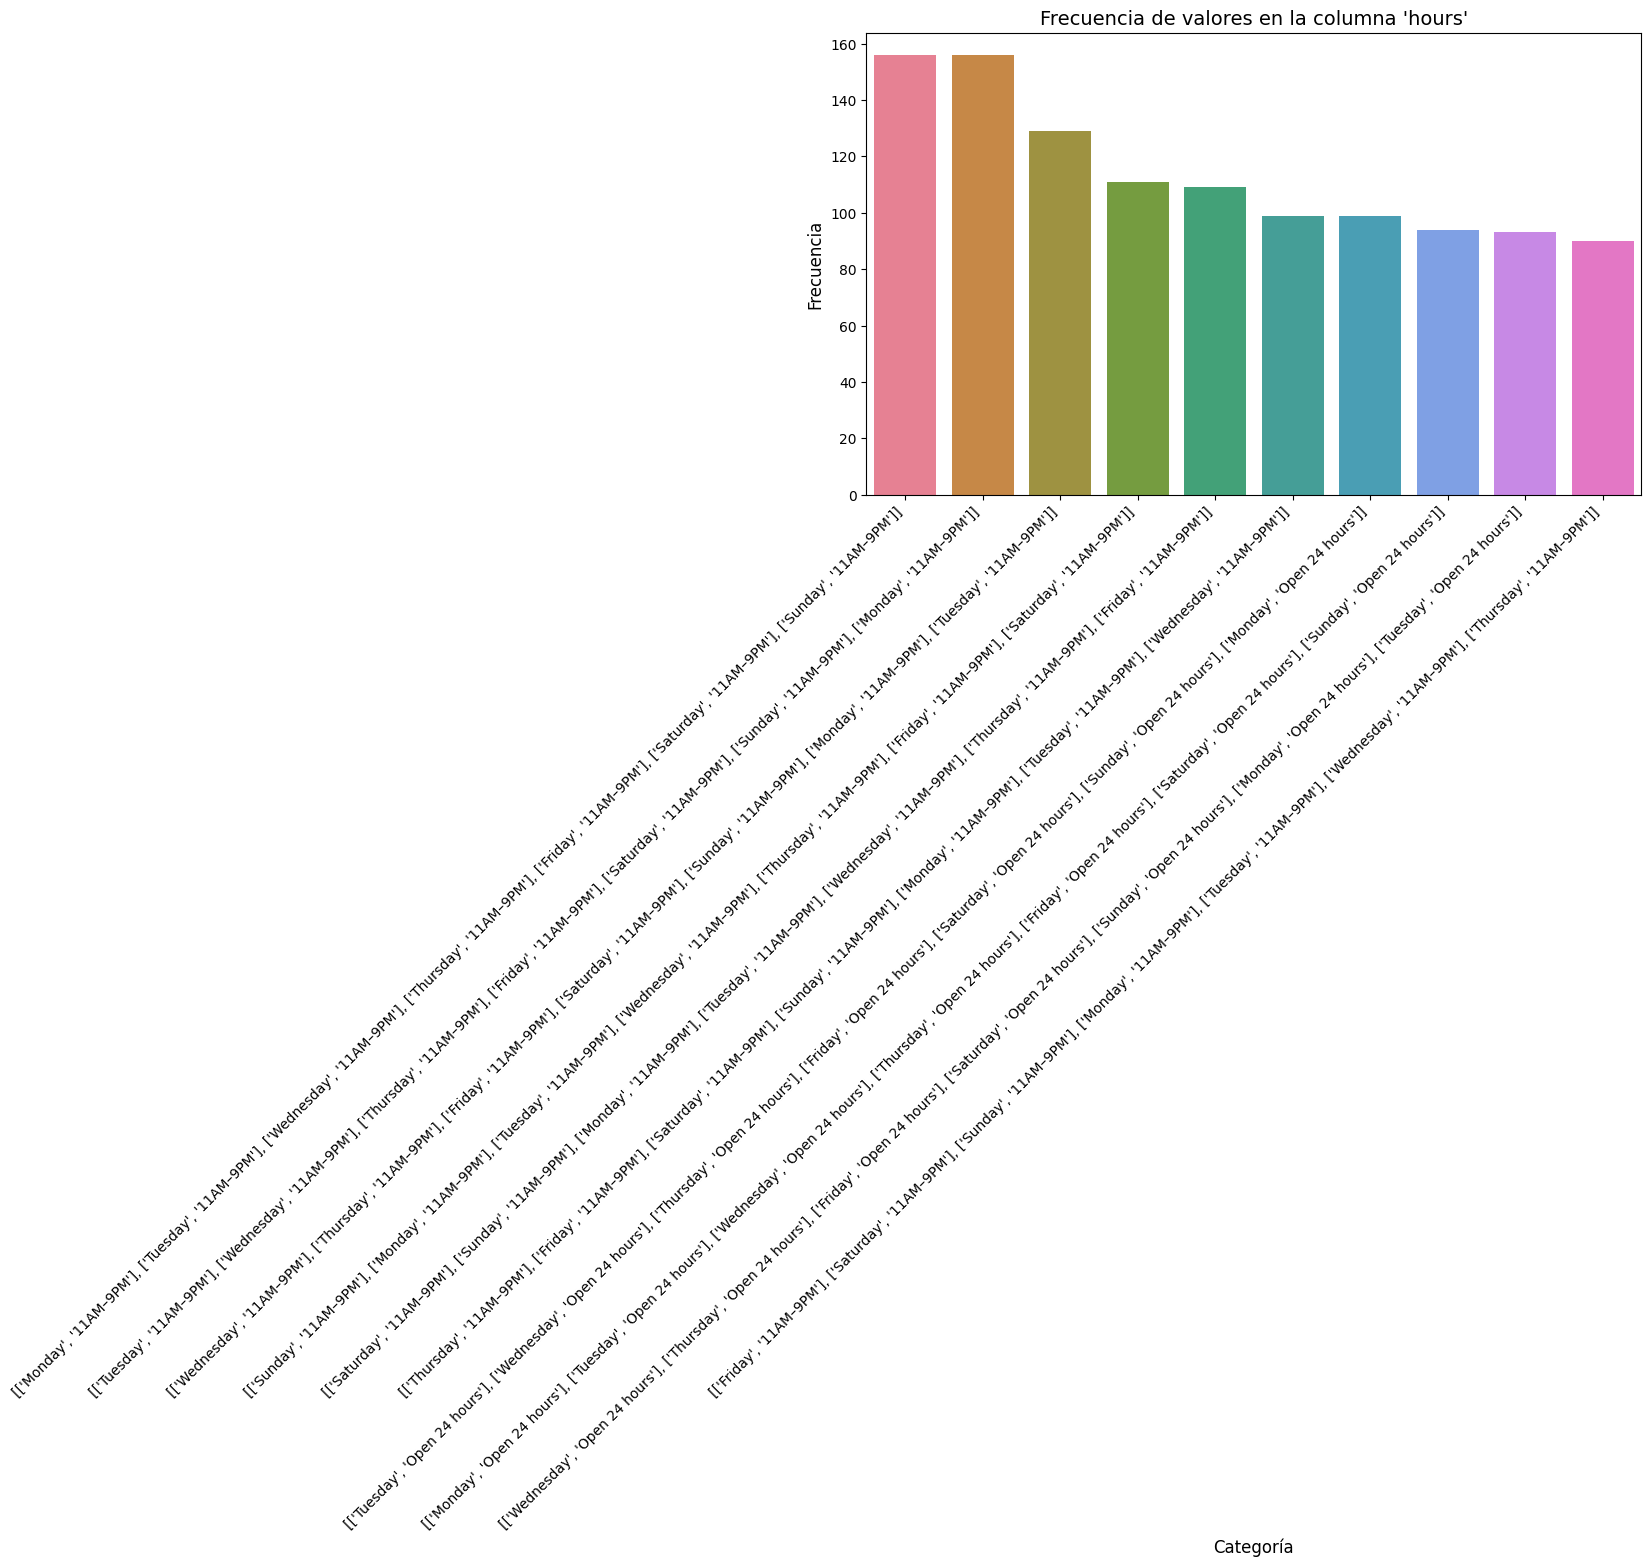

Mostrando el top 10 de categorías en la columna 'MISC'.


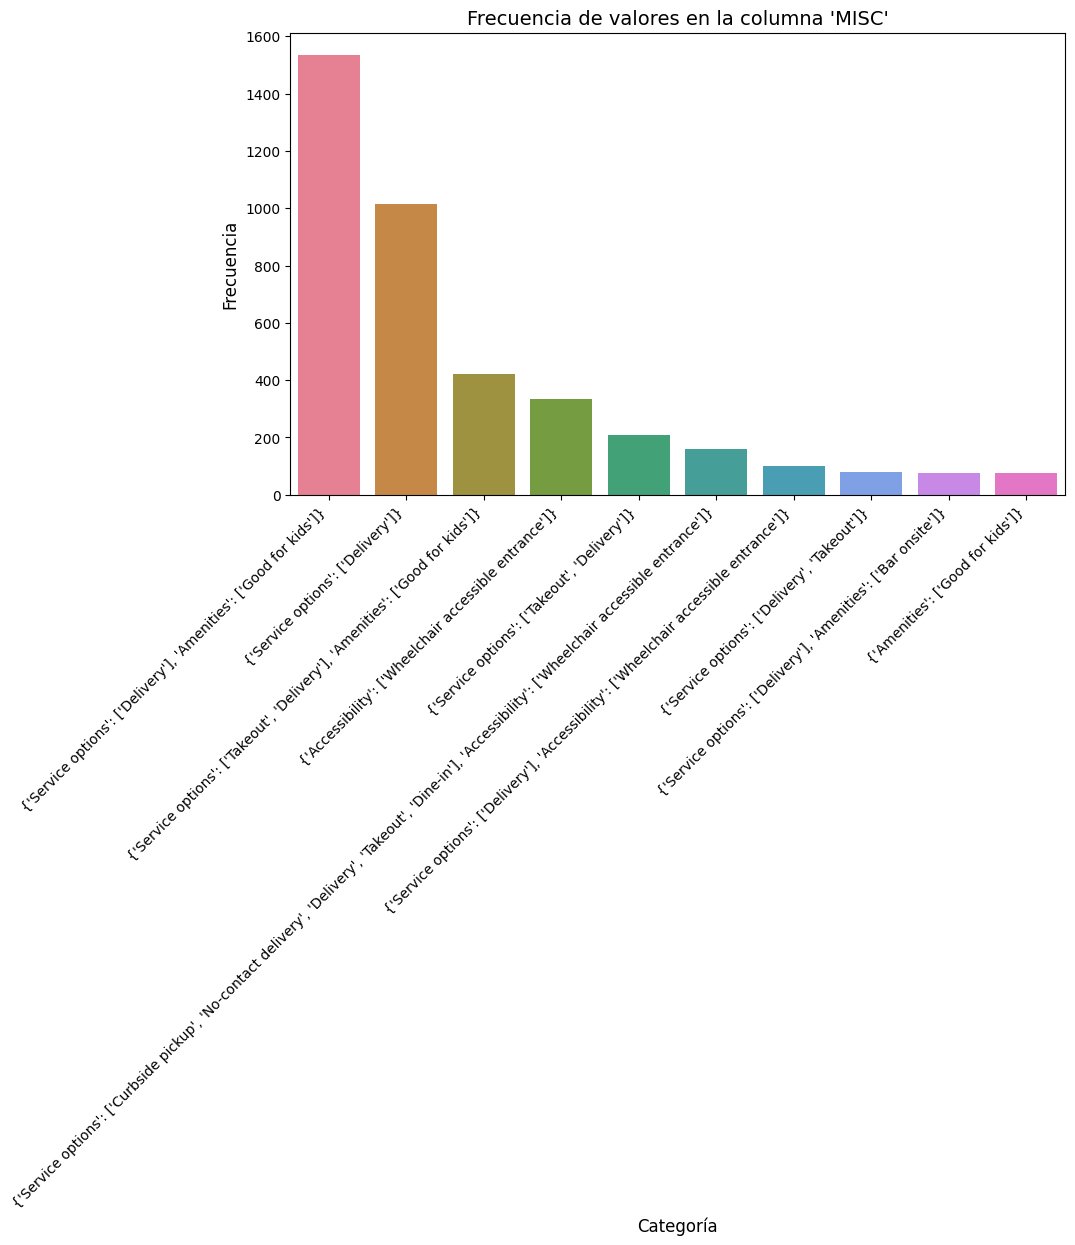

Mostrando el top 10 de categorías en la columna 'state'.


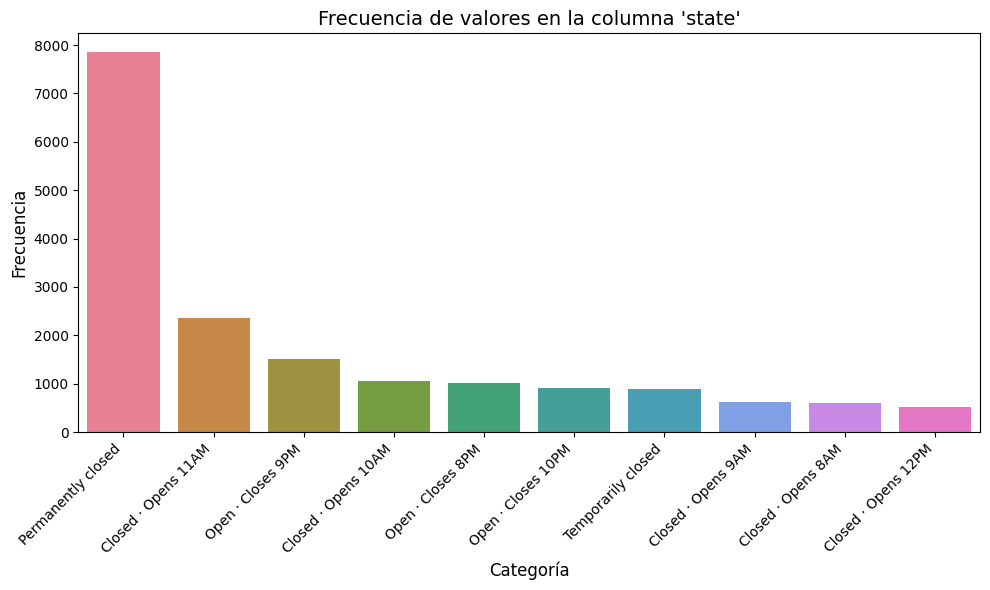

Mostrando el top 10 de categorías en la columna 'relative_results'.


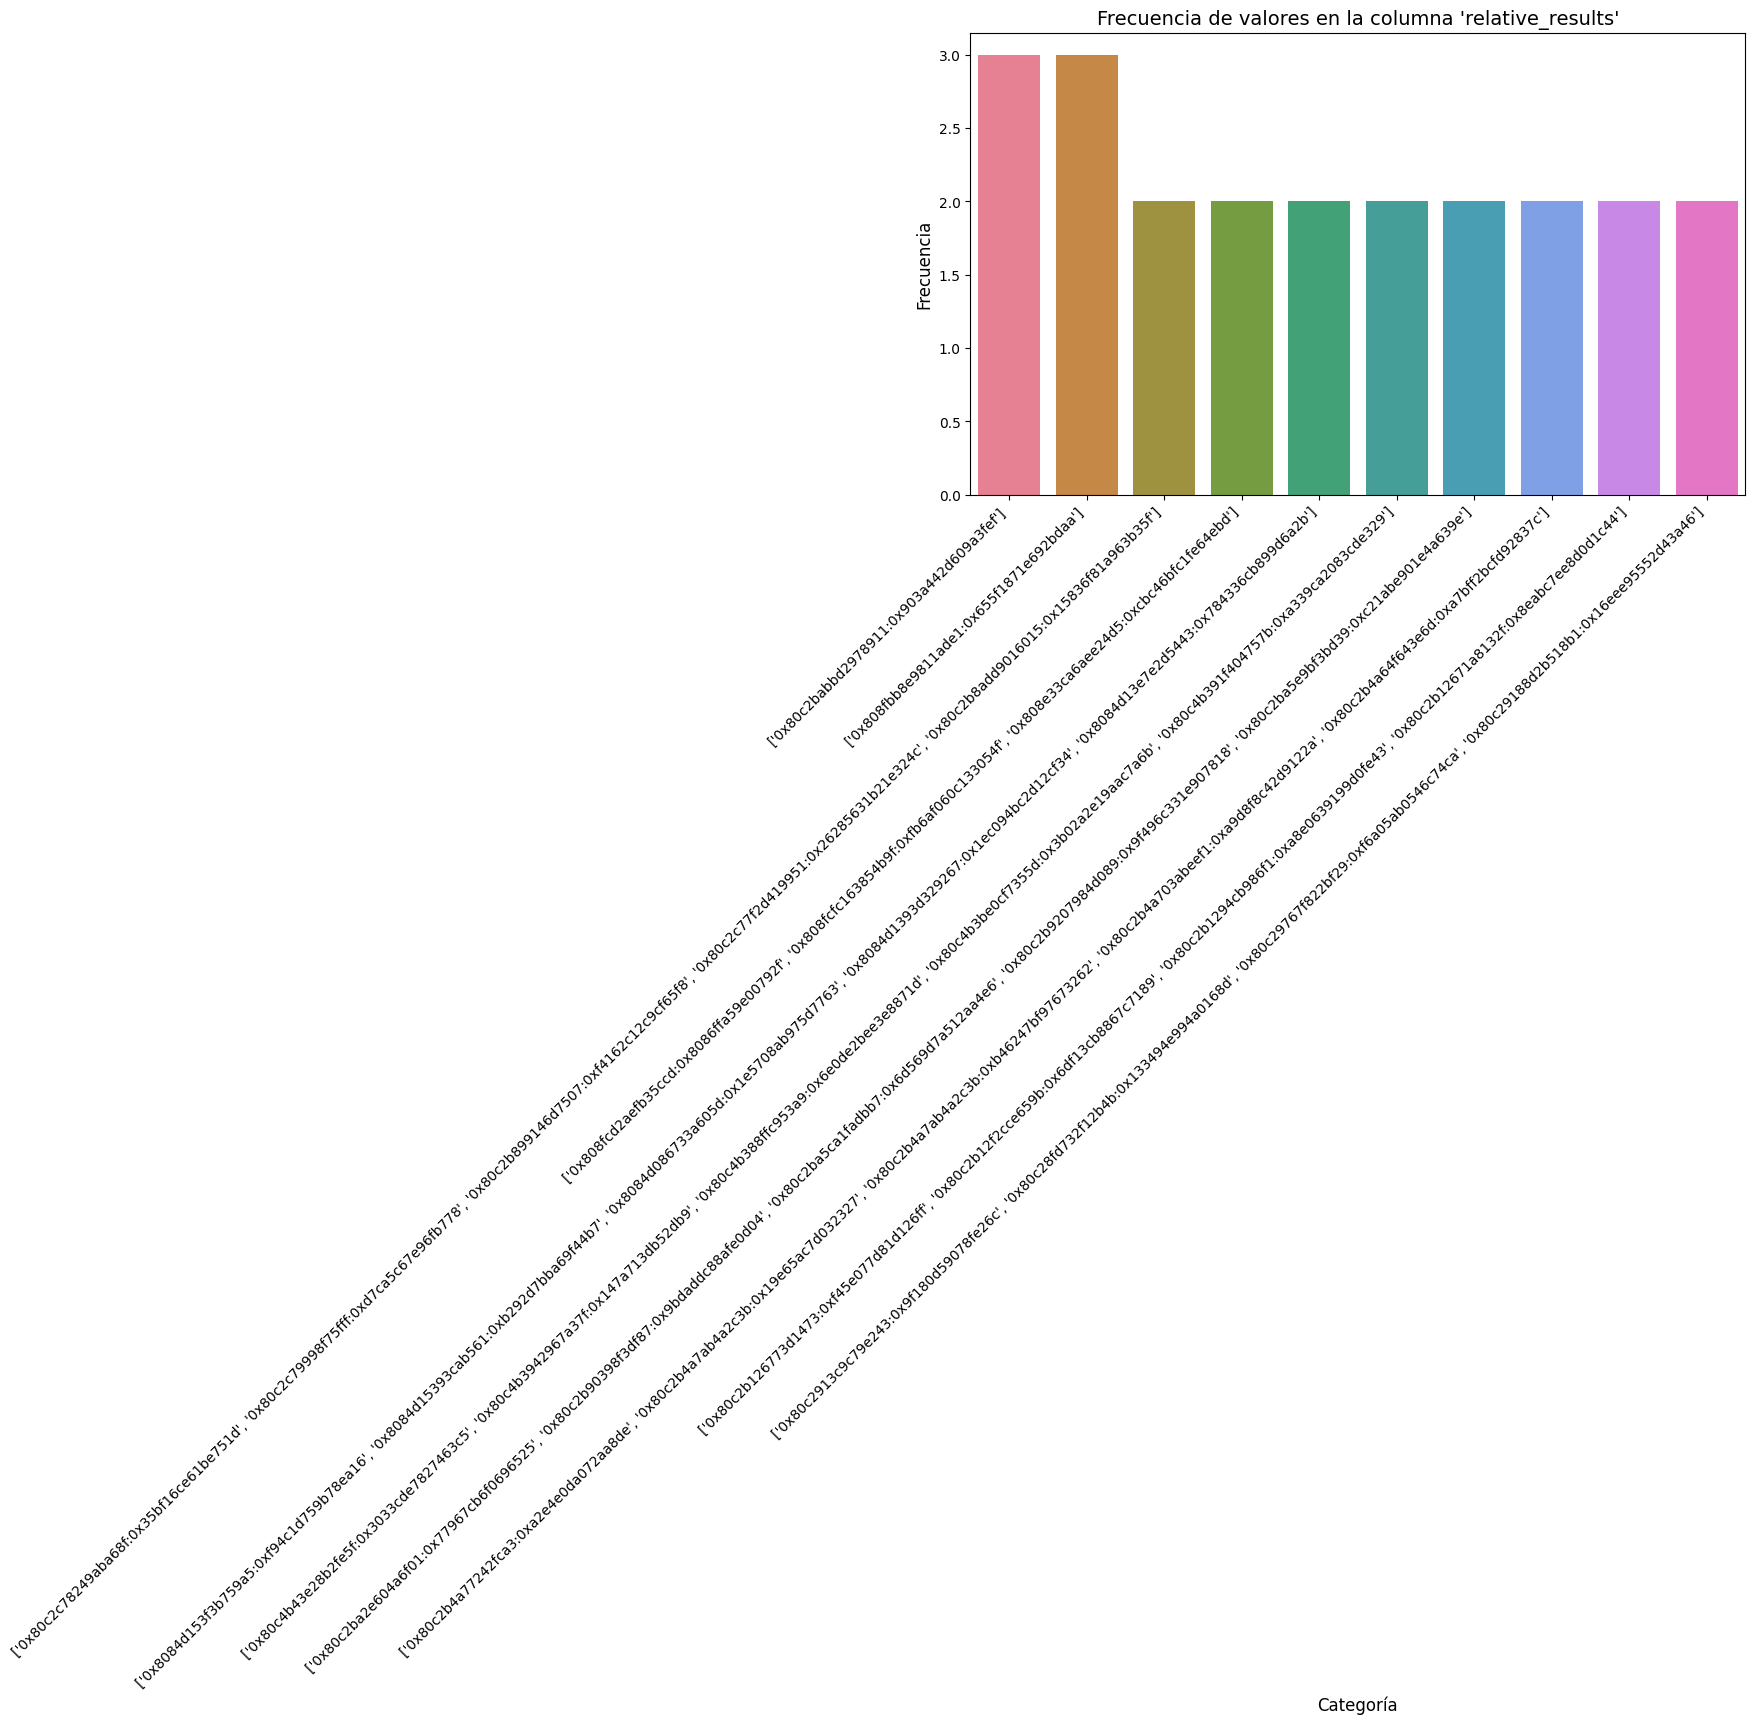

Mostrando el top 10 de categorías en la columna 'url'.


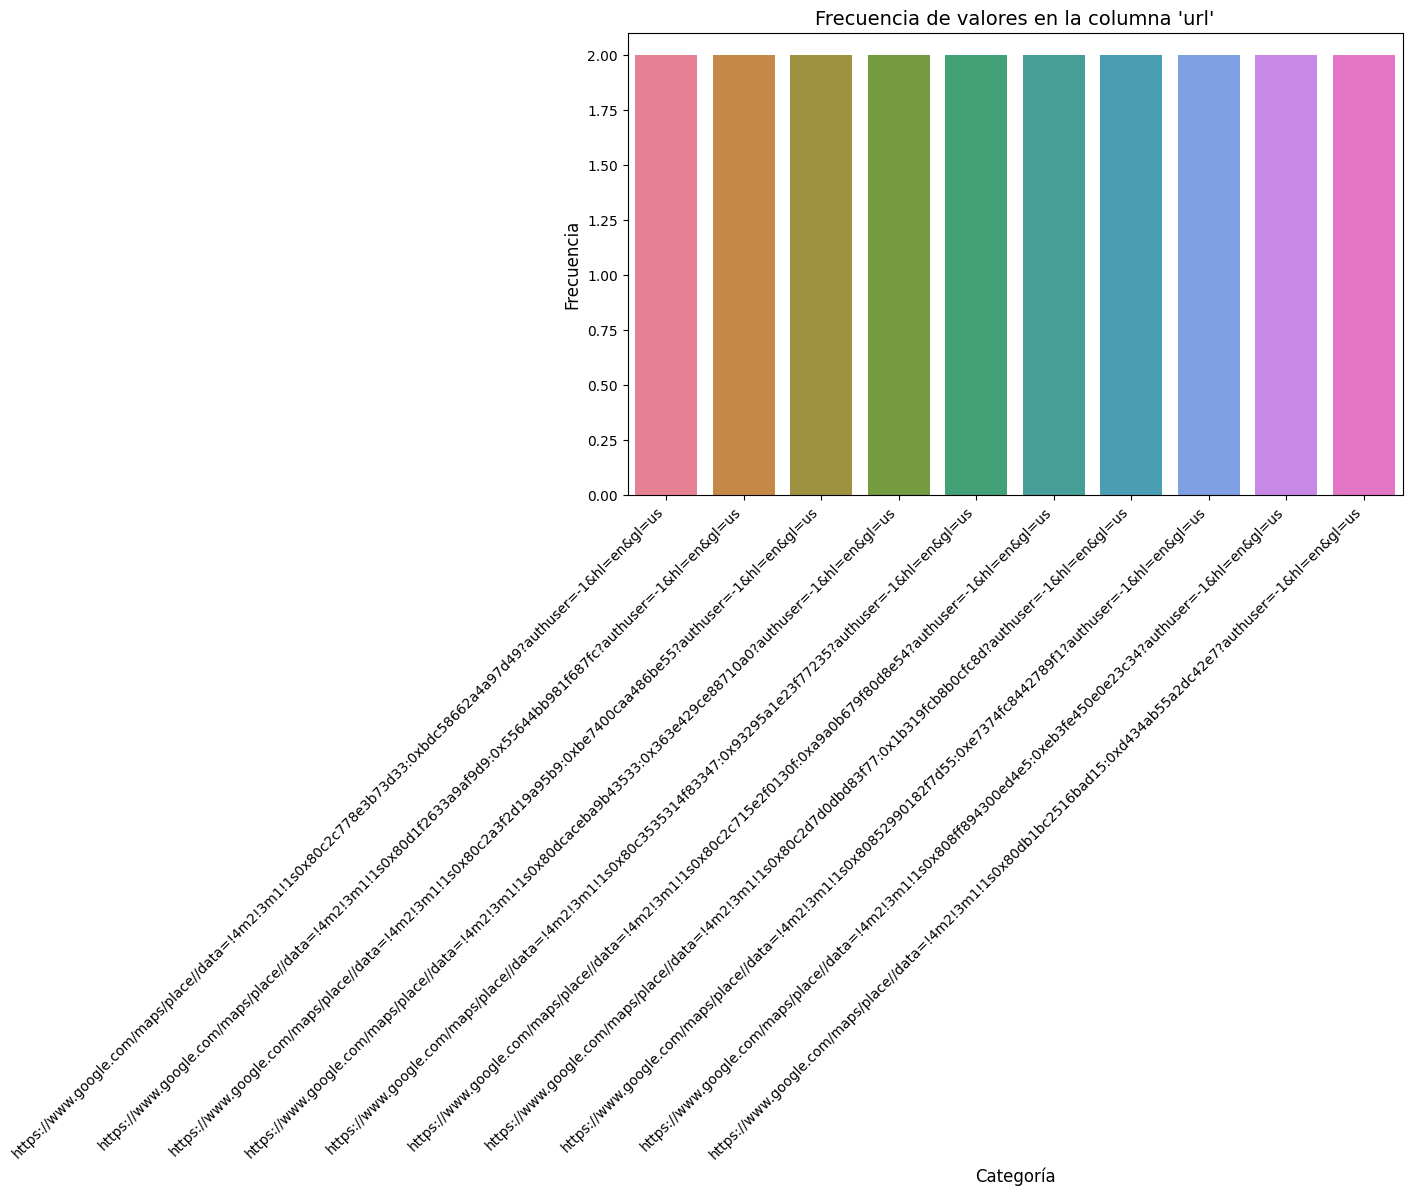

In [63]:
# Llamada a la función para generar gráficos de frecuencia con colores
generar_graficos_frecuencia_con_colores(metadata_california)

### ANALISIS

1. Estructura del DataFrame: El DataFrame tiene 2,700,000 filas y 8 columnas.

    - 1 columna de tipo float64 (user_id).

    - 2 columnas de tipo int64 (time, rating).

    - 5 columnas de tipo object (name, text, pics, resp, gmap_id).

El tamaño en memoria del DataFrame es de 164.8 MB, lo cual es considerable dado el volumen de datos.

2. Valores nulos:

    - name: Tiene 7 valores nulos, lo cual es insignificante (0.00%).

    - text: Tiene 1,170,997 valores nulos, representando el 43.37% del total.

    - pics: Es la columna con más valores nulos, con 2,600,710, lo que representa un 96.32%.

    - resp: Tiene 2,454,831 valores nulos, lo que equivale al 90.92%.

Este alto porcentaje de valores nulos en ciertas columnas podría afectar el análisis y los modelos que se construyan a partir de estos datos, por lo que sería necesario tratarlos adecuadamente (por ejemplo, eliminación o imputación de valores faltantes).

3. Duplicados:

Se han detectado 75,242 filas duplicadas, lo que representa un 2.79% del total de filas. Este es un porcentaje bajo, pero se debe analizar antes de considerar si estas duplicaciones deben ser eliminadas o si tienen algún valor específico.

4. Estadísticas para la columna time:

    - Media: 1,551,463,515,749.25

    - Mediana: 1,555,199,404,014

    - Desviación estándar: 46,481,642,493.21

    - Cantidad de outliers: 36,015

La columna time parece contener marcas temporales (timestamps), lo cual es consistente con la media y mediana. Los outliers pueden indicar eventos atípicos o errores en el registro del tiempo, por lo que sería necesario investigar más a fondo.

5. Distribución de la columna rating:

Aunque no se especifican estadísticas de la columna rating, al ser de tipo int64, lo más probable es que contenga valores numéricos discretos (por ejemplo, calificaciones de 1 a 5), lo que podría ser útil para análisis de satisfacción o preferencias de los usuarios.

6. Observaciones adicionales:

    - Columnas pics y resp: Debido a que la mayoría de sus valores son nulos (más del 90%), su utilidad en el análisis podría ser limitada. Dependiendo del enfoque que se tome, estas columnas podrían ser eliminadas o tratadas de manera especial.

    - Texto en la columna text: Aunque el 43.37% de los valores son nulos, la información textual disponible puede ser útil para análisis de sentimientos o temas relacionados con los comentarios de los usuarios.

### CONCLUSION

El DataFrame contiene una gran cantidad de información útil, pero presenta varios desafíos que deben ser abordados para garantizar un análisis y modelado adecuado:

1. Valores nulos: Las columnas text, pics y resp tienen una gran cantidad de valores faltantes, con más del 90% de nulos en pics y resp. Dependiendo del propósito del análisis, puede ser necesario eliminar estas columnas o imputar valores, ya que su cantidad de datos disponibles es limitada. La columna text, con un 43.37% de valores nulos, aún tiene un volumen significativo de datos útiles para análisis de comentarios.

2. Duplicados: Se han detectado 75,242 filas duplicadas, que deberían eliminarse para evitar sesgos en los resultados.

3. Outliers en time: Existen 36,015 valores atípicos en la columna time, lo que sugiere la necesidad de revisar estos puntos antes de realizar análisis basados en fechas o tiempos.

4. Potencial de análisis: A pesar de los valores faltantes, las columnas con datos útiles (como rating, name, text y time) tienen un gran potencial para análisis de comportamiento de usuarios, satisfacción y tendencias temporales. Especialmente la columna text puede ser aprovechada en análisis de sentimientos o de lenguaje natural.

5. Acciones a tomar:

    - Tratamiento de valores nulos: Se debe evaluar si es mejor eliminar las columnas con muchos valores nulos (pics y resp) o si es posible imputar estos valores.
    - Duplicados: Es recomendable eliminar las filas duplicadas, ya que su presencia podría sesgar el análisis.
    - Análisis de outliers en time: Se debe realizar una revisión de los valores atípicos en la columna time para verificar si hay errores de registro o eventos anómalos.
    - Análisis de texto: Las columnas text y resp (si se decide conservarlas) pueden ser útiles para realizar análisis de sentimientos o modelado de lenguaje.

En resumen, se deben abordar los problemas de calidad de datos antes de realizar un análisis más detallado o implementar modelos predictivos. Una vez tratados, este DataFrame tiene el potencial de ofrecer insights valiosos sobre la interacción y opiniones de los usuarios.

__________________________________________________________________________________________________________________________________________________________________________________

# USER CALIFORNIA YELP

In [65]:
# Cargar el archivo Parquet y almacenarlo en un DataFrame
user_parquet = pd.read_parquet('user.parquet')

In [66]:
user_parquet

user_id         name  review_count  \
0        qVc8ODYU5SZjKXVBgXdI7w       Walker           585   
1        j14WgRoU_-2ZE1aw1dXrJg       Daniel          4333   
2        2WnXYQFK0hXEoTxPtV2zvg        Steph           665   
3        SZDeASXq7o05mMNLshsdIA         Gwen           224   
4        hA5lMy-EnncsH4JoR-hFGQ        Karen            79   
...                         ...          ...           ...   
2105592  4QGxxakRZeOlg_qDuxmTeQ     Jennilee            38   
2105593  tmelBbVBGAzXBVfH2u_R6g        Gerry            19   
2105594  tpBznnD6uJN3m_pJubj09w        Emily            26   
2105595  Kst_srPw7GdYydMFYdCtzw  Heatheranne            25   
2105596  mZl-mH3ZIWLRSd_FfvrXFg      Jessica            30   

               yelping_since  useful  funny   cool  \
0        2007-01-25 16:47:26    7217   1259   5994   
1        2009-01-25 04:35:42   43091  13066  27281   
2        2008-07-25 10:41:00    2086   1010   1003   
3        2005-11-29 04:38:33     512    330    299   
4        2007-01-05 19:40:59      29     15      7   
...                      ...     ...    ...    ...   
2105592  2012-01-19 23:33:02      74      9      6   
2105593  2009-06-09 16:34:54      14      5      2   
2105594  2013-08-13 23:18:11       4      1      2   
2105595  2015-01-10 00:06:25      21      2      5   
2105596  2015-11-30 21:10:17      27      1     17   

                                                     elite  \
0                                                     2007   
1        2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
2                                 2009,2010,2011,2012,2013   
3                                           2009,2010,2011   
4                                                            
...                                                    ...   
2105592                                                      
2105593                                                      
2105594                                                      
2105595                                                      
2105596                                                      

                                                   friends  fans  ...  \
0        NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...   267  ...   
1        ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...  3138  ...   
2        LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...    52  ...   
3        enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...    28  ...   
4        PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...     1  ...   
...                                                    ...   ...  ...   
2105592                             kmwNG5LZSHFmveg6wYYdrw     0  ...   
2105593  BFYdCAMFyjYHDwesndEXEg, _9fTIqfSJc7g3V_o76XRVg...     1  ...   
2105594  bKV3ly2MuK-K1cptMrFknQ, liel18zRoSB4tEkUP7i6Cg...     0  ...   
2105595  dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg...     0  ...   
2105596  pou3BbKsIozfH50rxmnMew, JT3rDC7-hprCSObnihMeHw...     3  ...   

         compliment_more  compliment_profile  compliment_cute  \
0                     65                  55               56   
1                    264                 184              157   
2                     13                  10               17   
3                      4                   1                6   
4                      1                   0                0   
...                  ...                 ...              ...   
2105592                1                   0                0   
2105593                1                   0                0   
2105594                0                   0                0   
2105595                0                   0                0   
2105596                0                   1                0   

         compliment_list  compliment_note  compliment_plain  compliment_cool  \
0                     18              232               844              467   
1                    251             1847              7054        

In [80]:
# Analizamos nulos en el dataframe
analizar_nulos(user_parquet)

INFORMACIÓN DEL DATAFRAME:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB

-

In [70]:
# Analizamos outliers y estadísticas de datos
analisis_general(user_parquet, 'user_parquet')



ANÁLISIS DEL DATAFRAME USER_PARQUET

No hay valores faltantes en el dataframe.

Hay 117700 filas duplicadas.

--------------------------------------------------------------------------------

Estadísticas para la columna review_count:
  Media: 28.468750192938156
  Mediana: 6.0
  Desviación estándar: 104.21458332104477
  Cantidad de outliers: 261716

Filas con Outliers en review_count:

                        user_id     name  review_count        yelping_since  \
0        qVc8ODYU5SZjKXVBgXdI7w   Walker           585  2007-01-25 16:47:26   
1        j14WgRoU_-2ZE1aw1dXrJg   Daniel          4333  2009-01-25 04:35:42   
2        2WnXYQFK0hXEoTxPtV2zvg    Steph           665  2008-07-25 10:41:00   
3        SZDeASXq7o05mMNLshsdIA     Gwen           224  2005-11-29 04:38:33   
4        hA5lMy-EnncsH4JoR-hFGQ    Karen            79  2007-01-05 19:40:59   
...                         ...      ...           ...                  ...   
2105580  DH-aSZOpX0jn3eVpCVokng    Ronny            65  

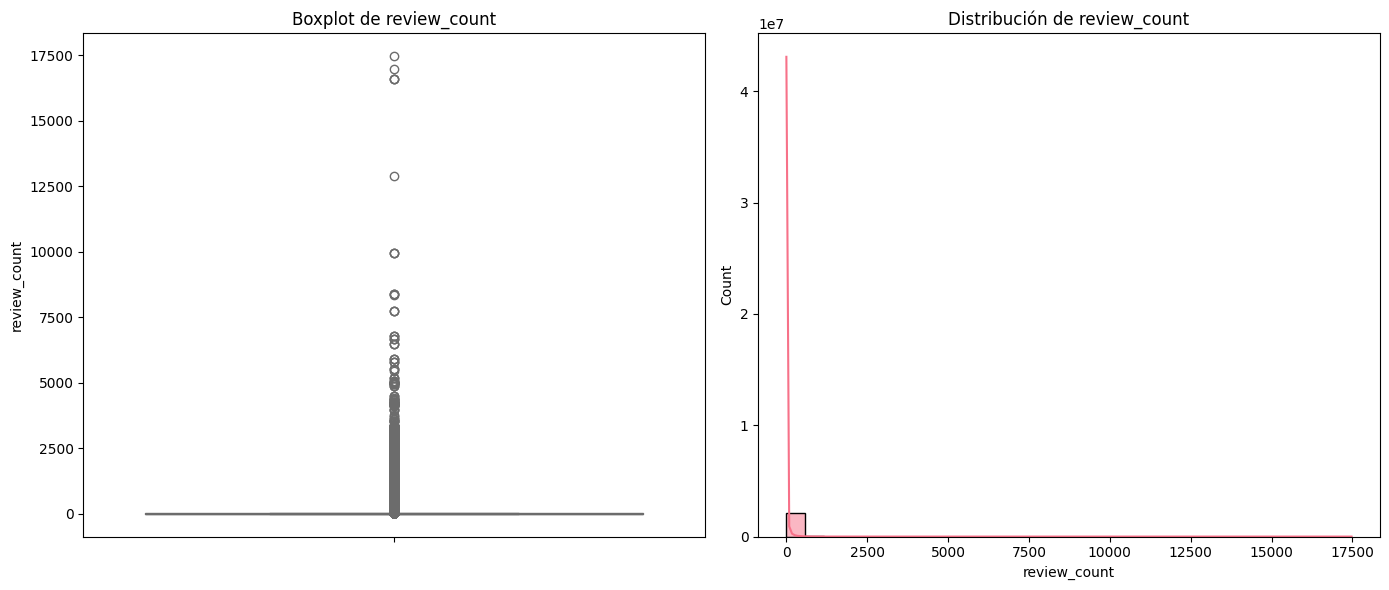

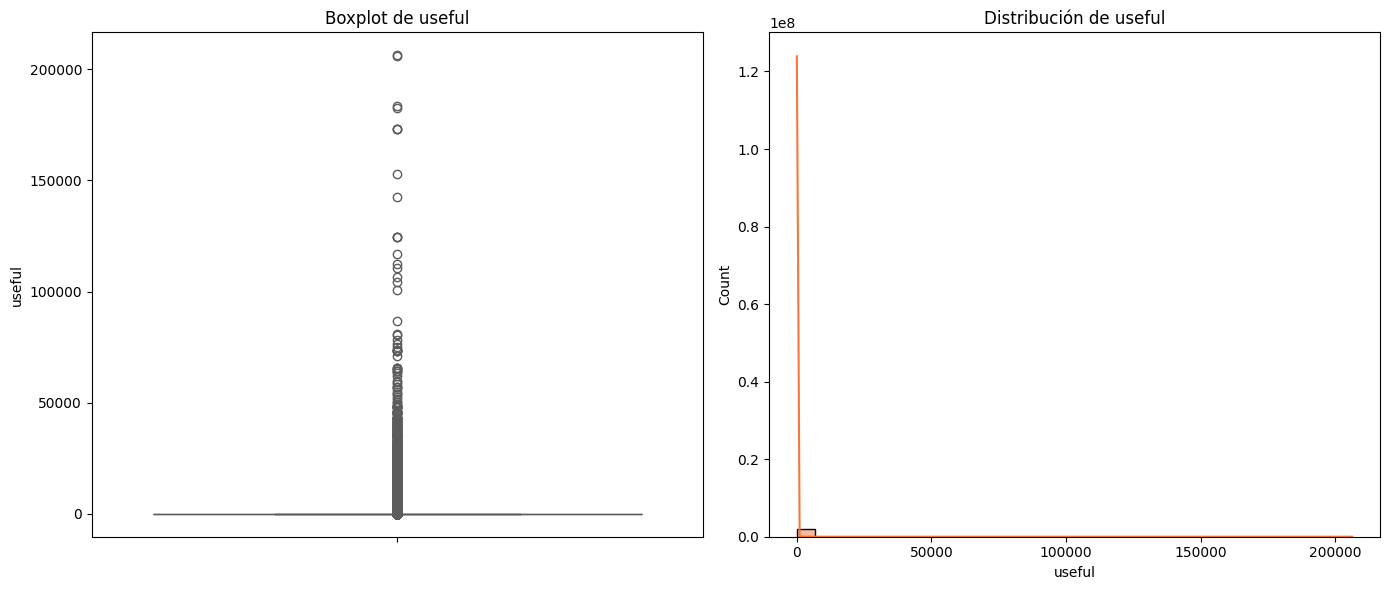

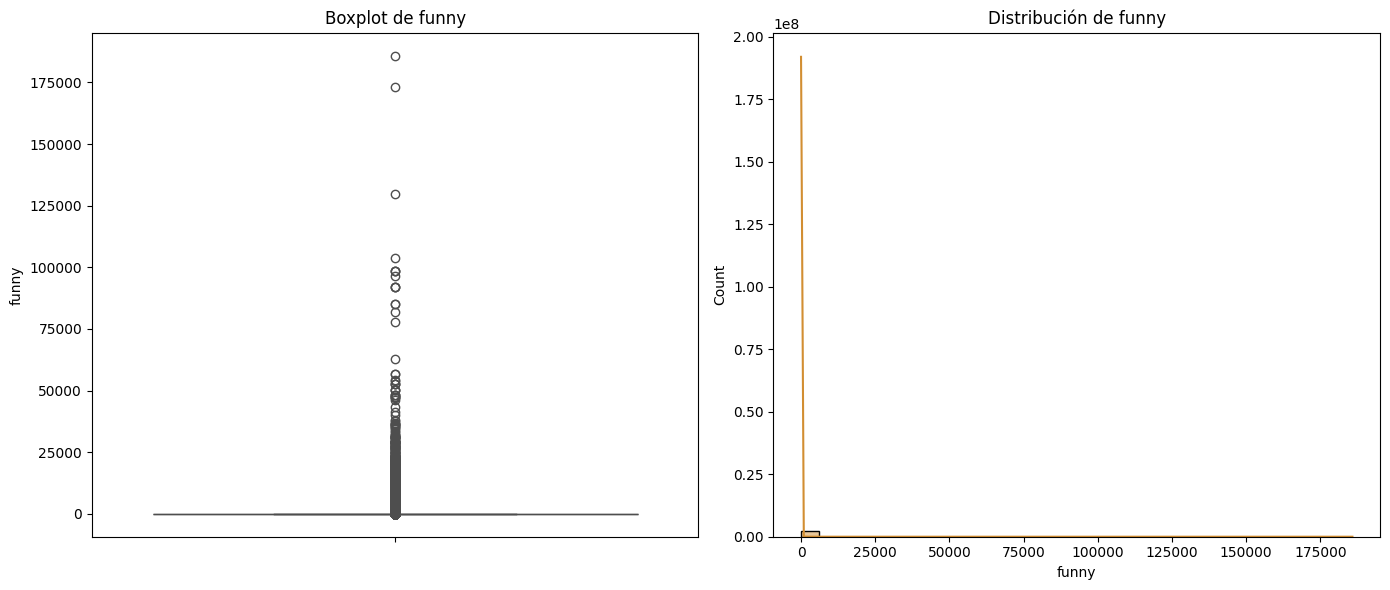

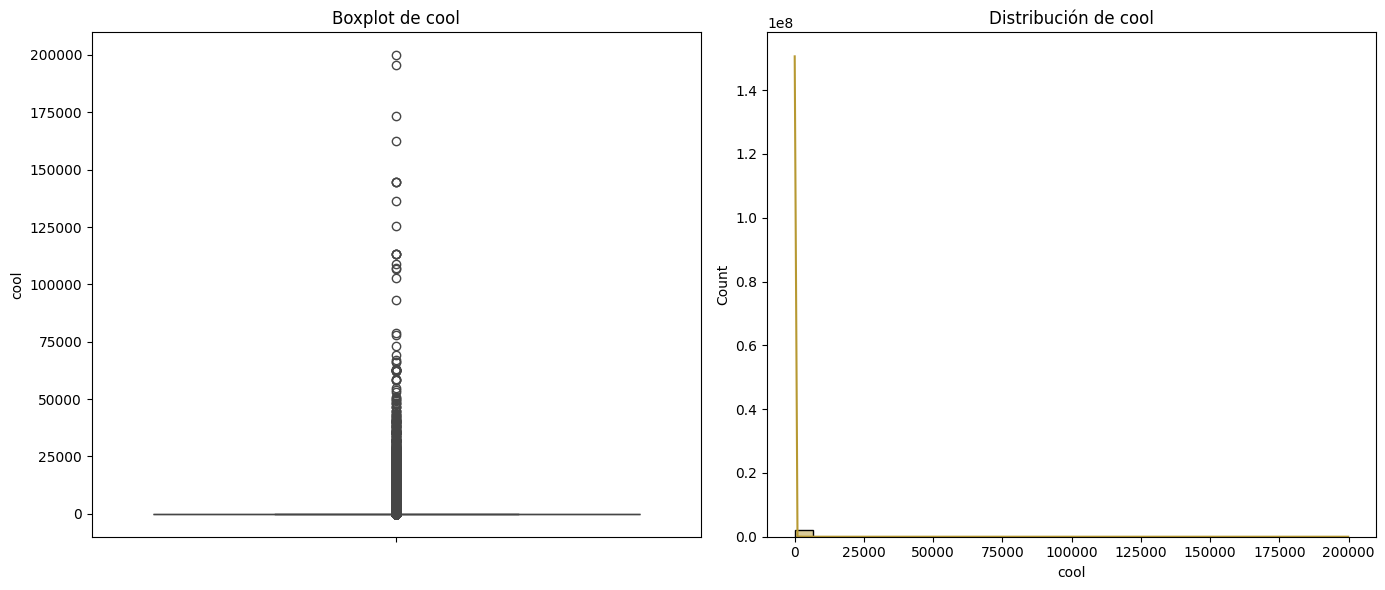

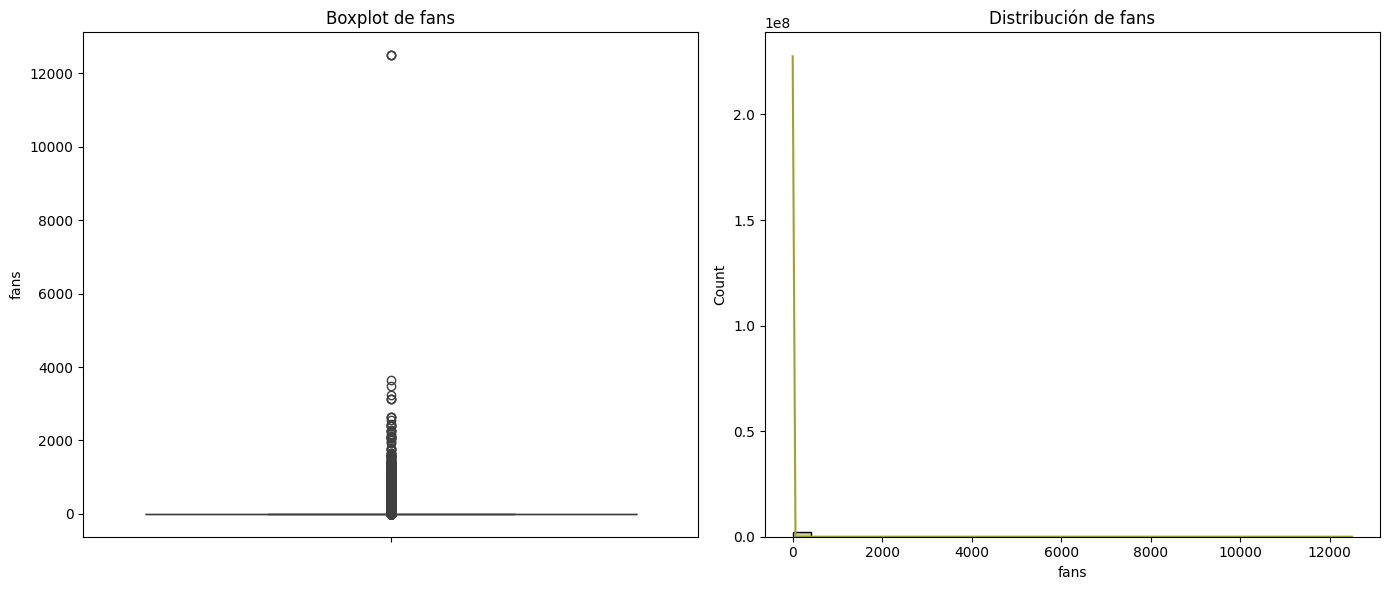

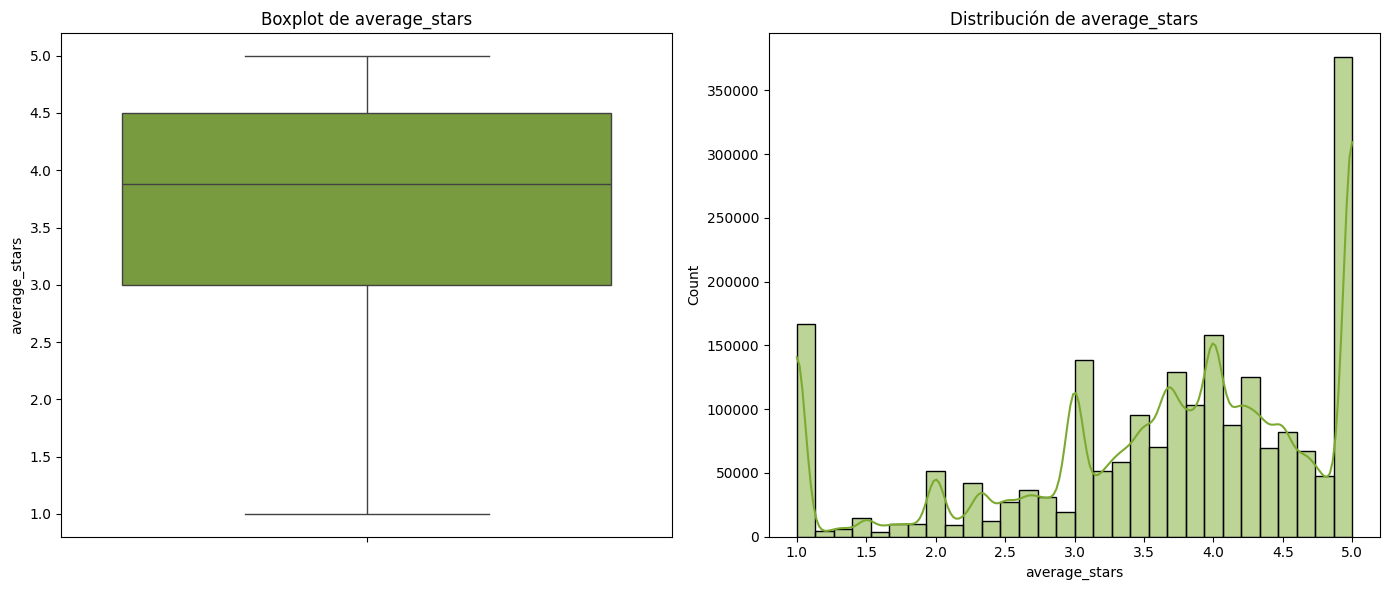

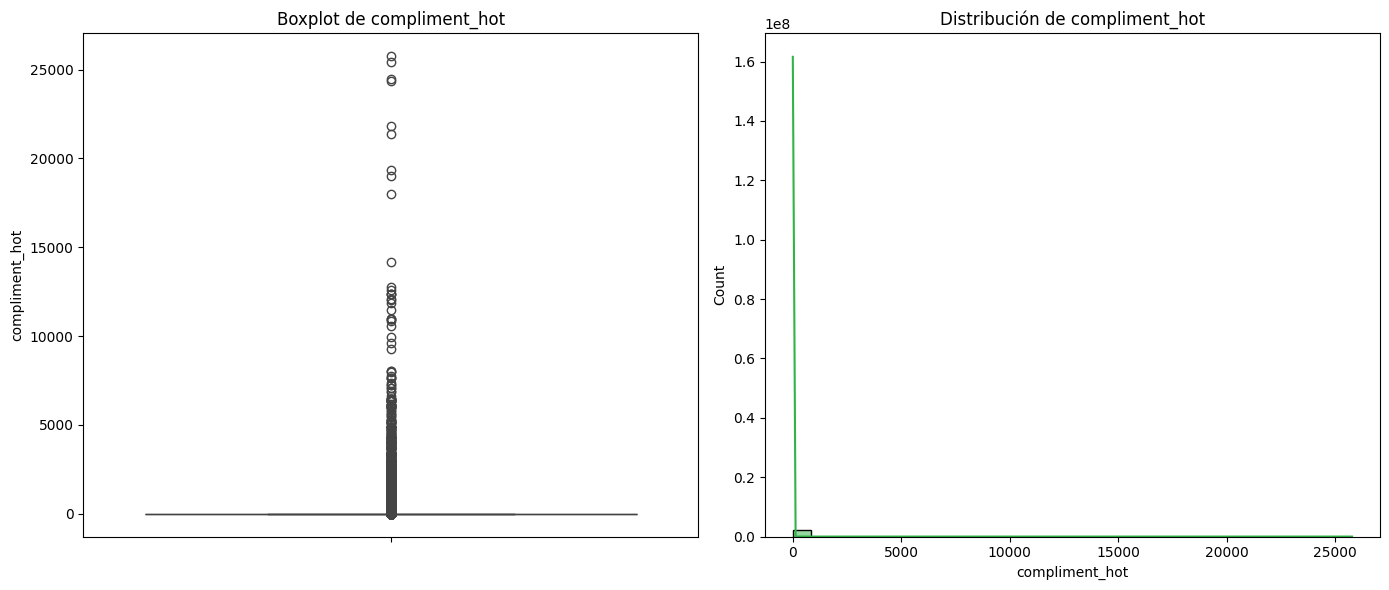

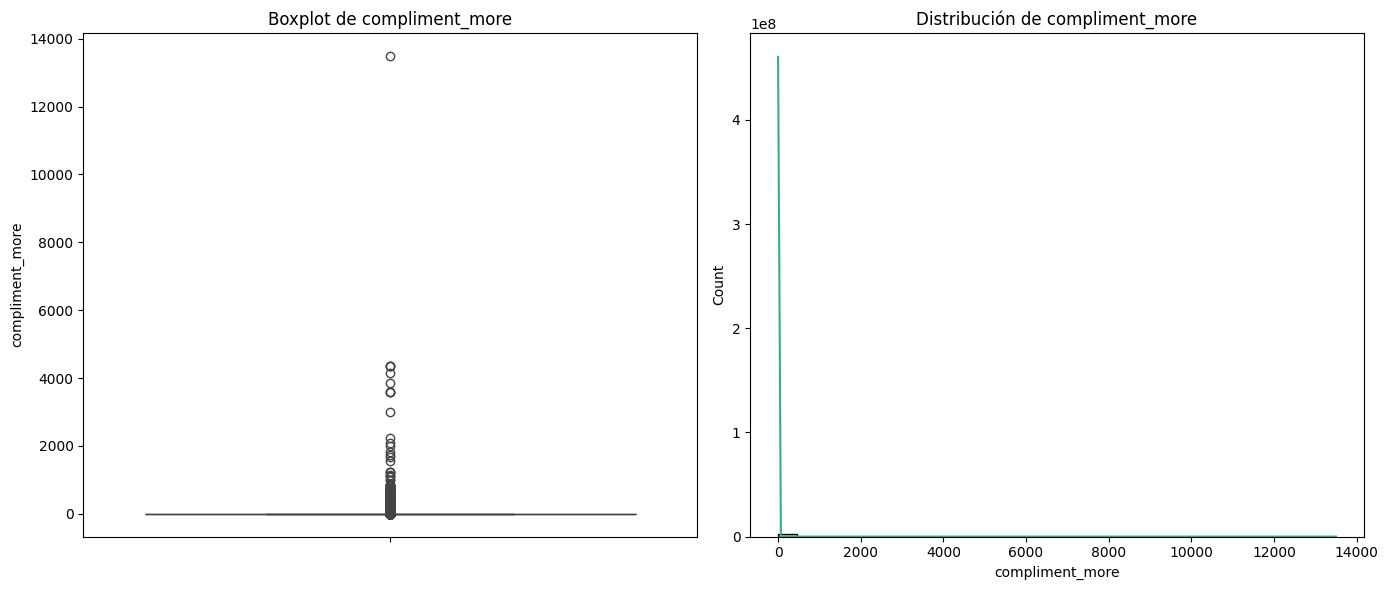

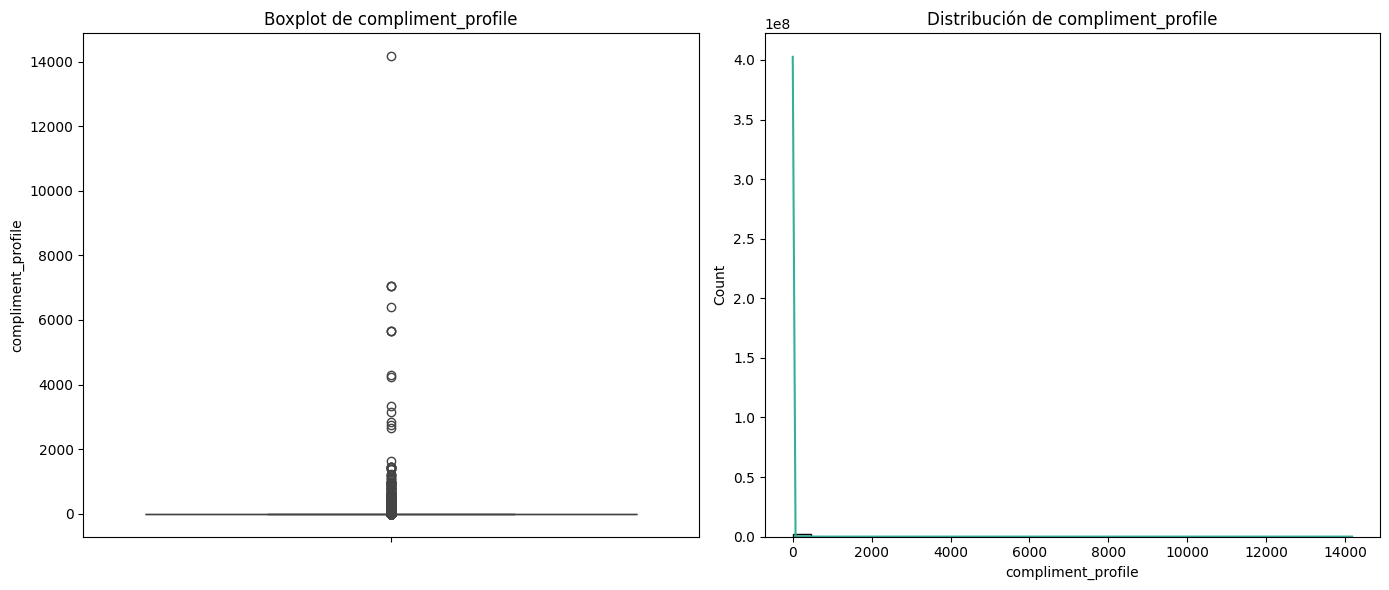

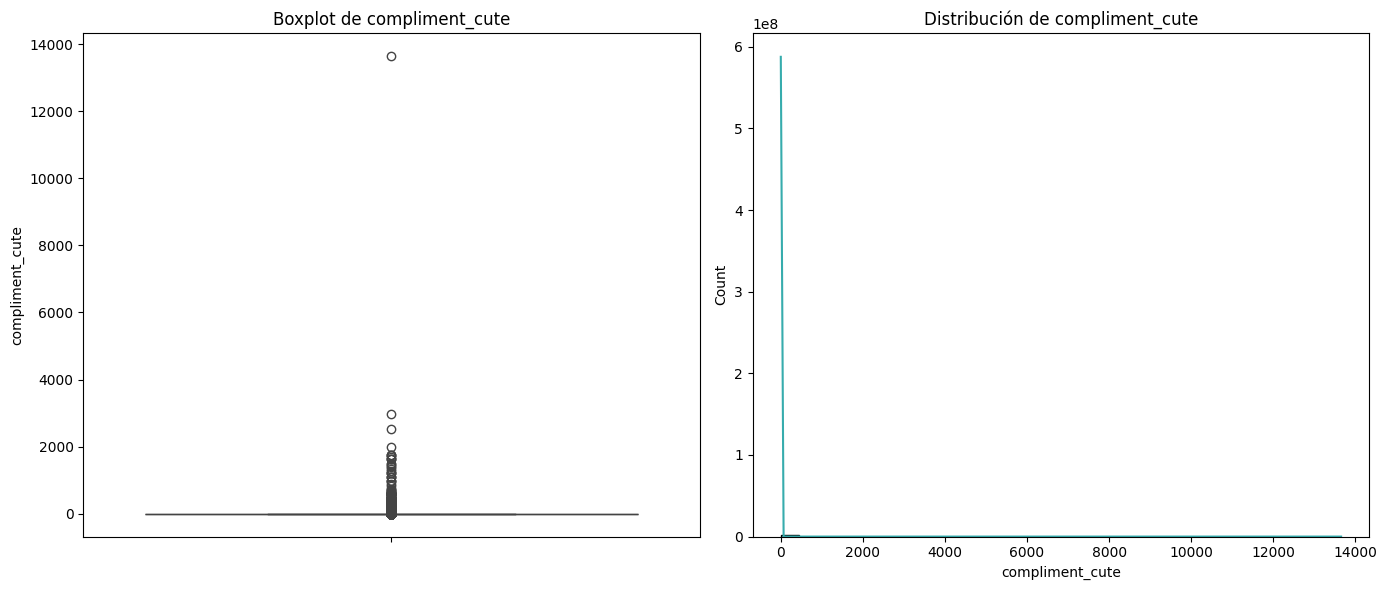

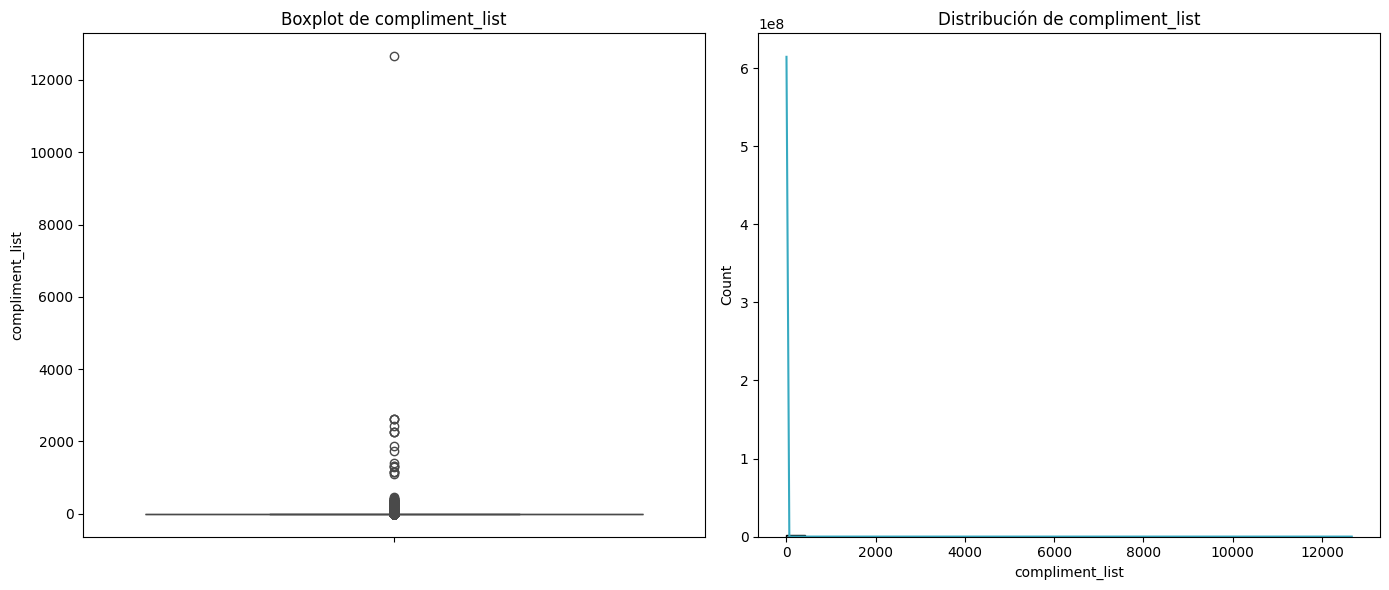

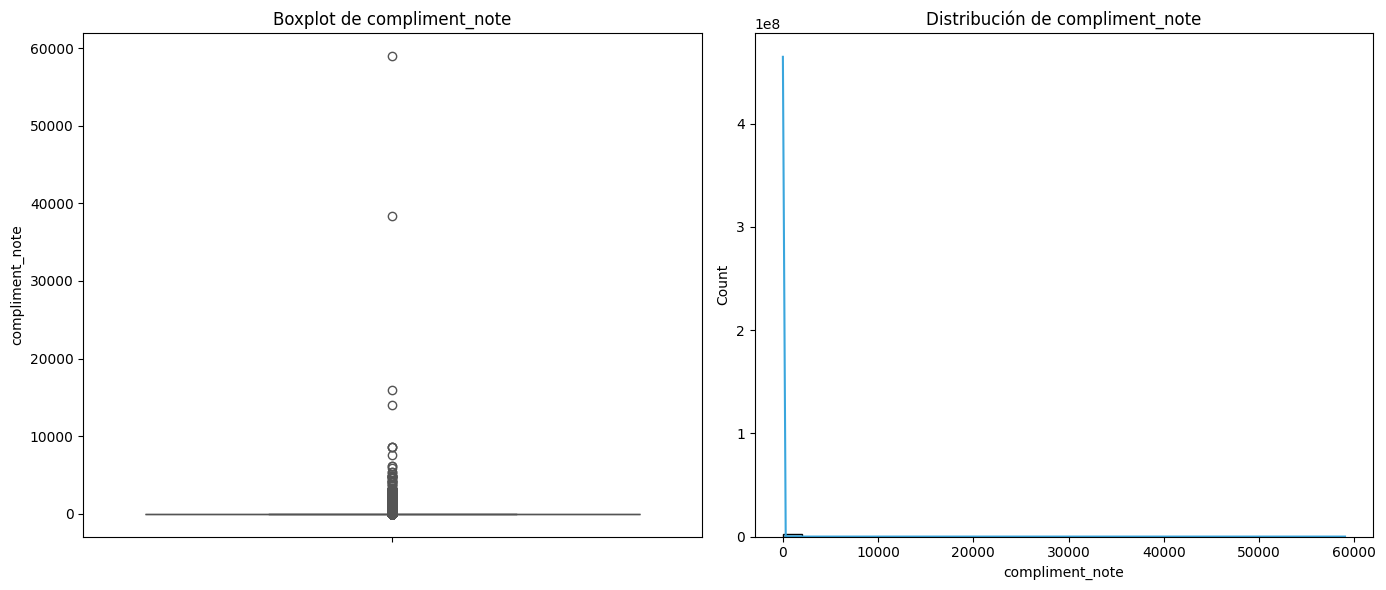

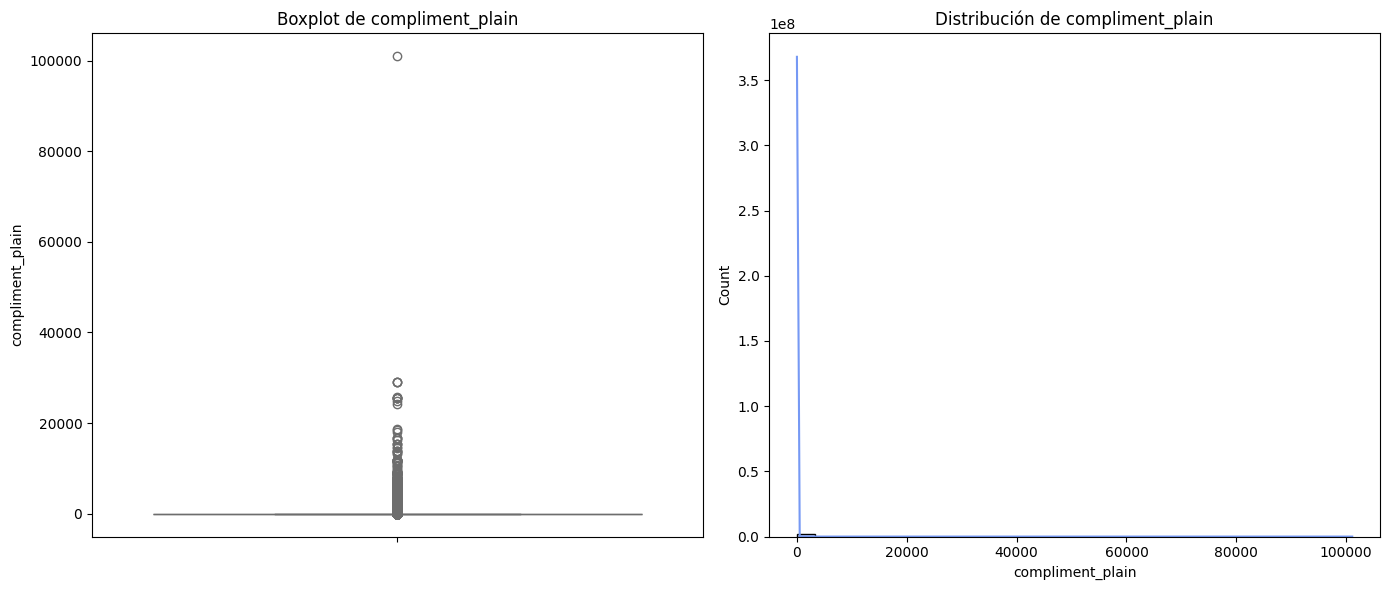

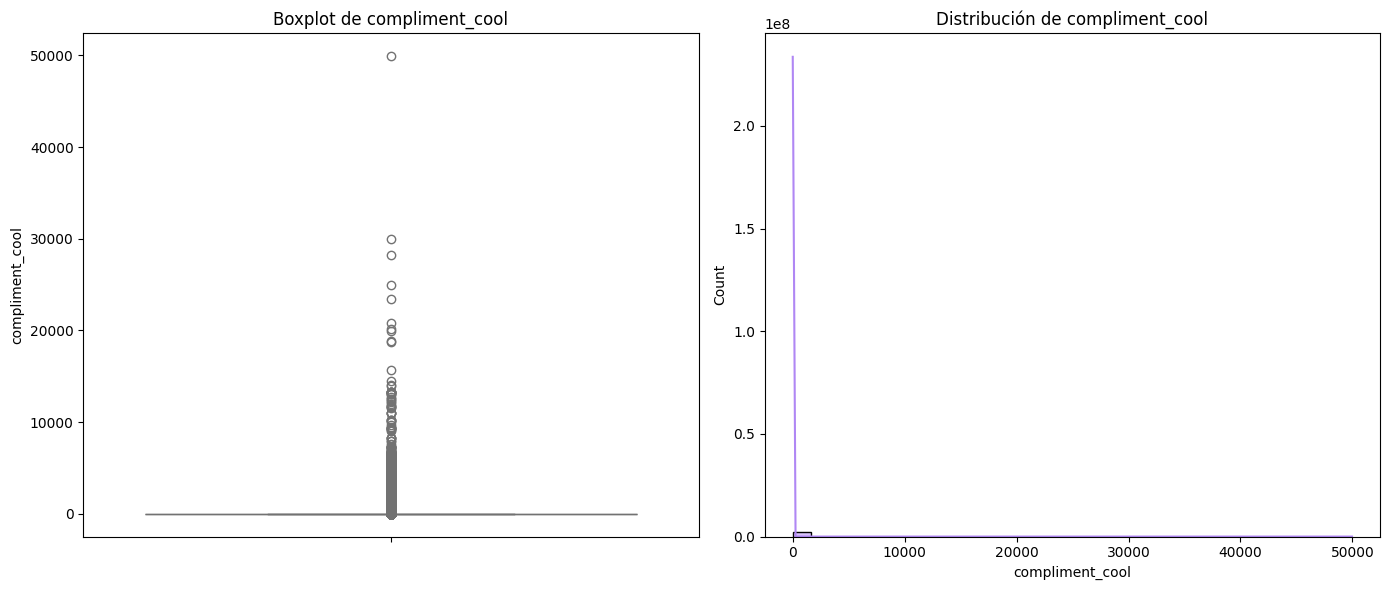

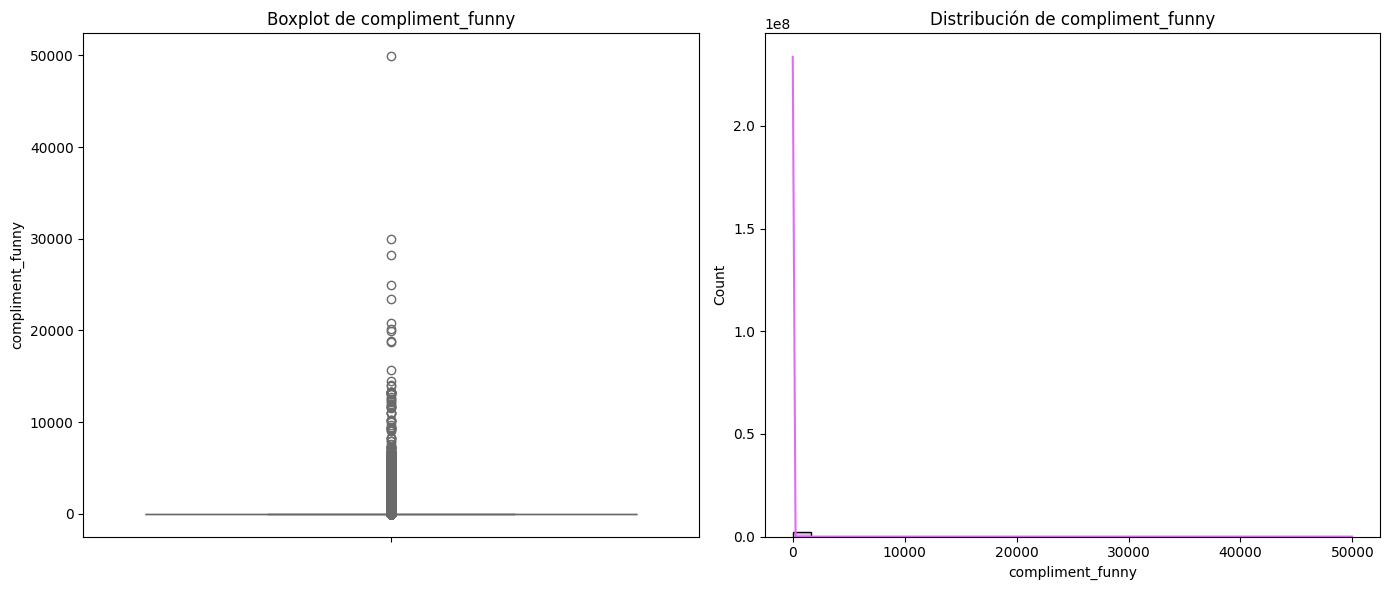

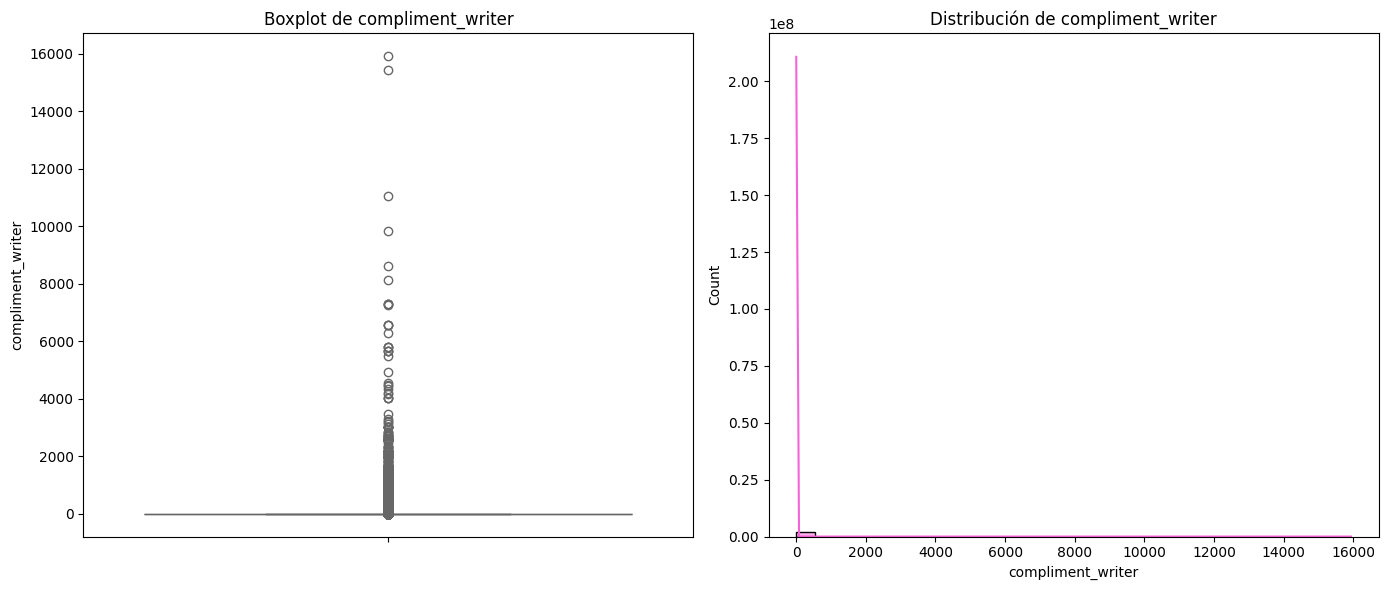

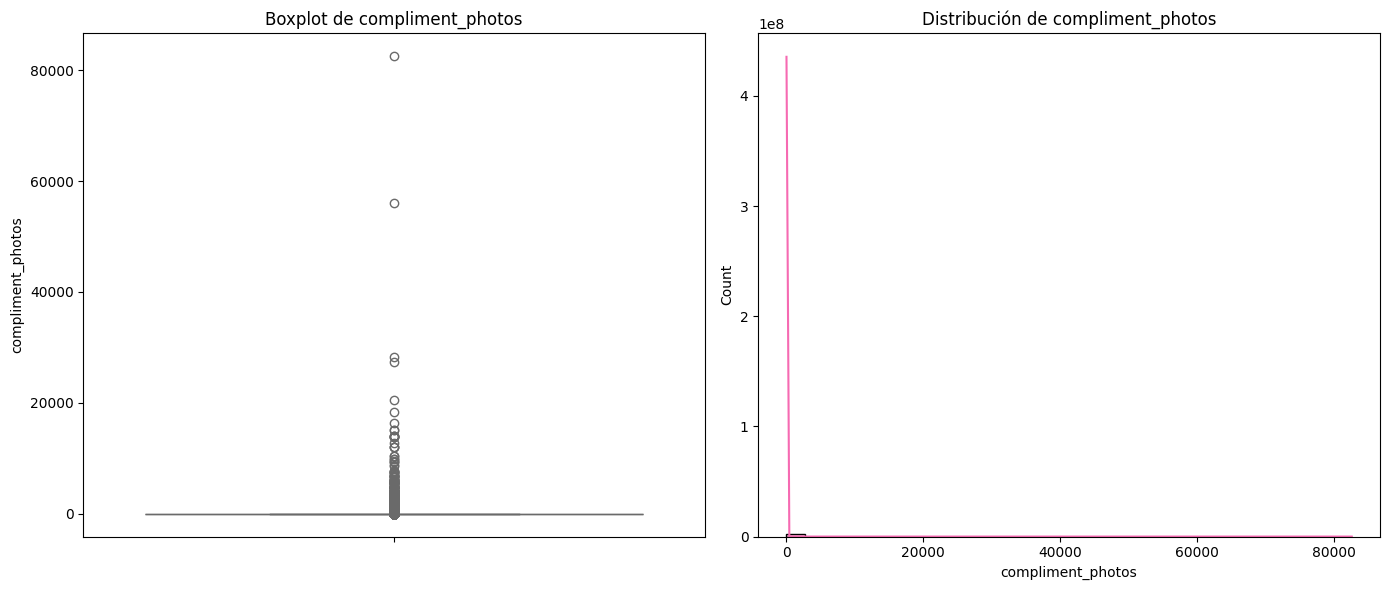

In [71]:
# Llamada a la función para generar gráficos para el DataFrame user_parquet
generar_graficos_numericos(user_parquet)

Mostrando el top 10 de categorías en la columna 'user_id'.


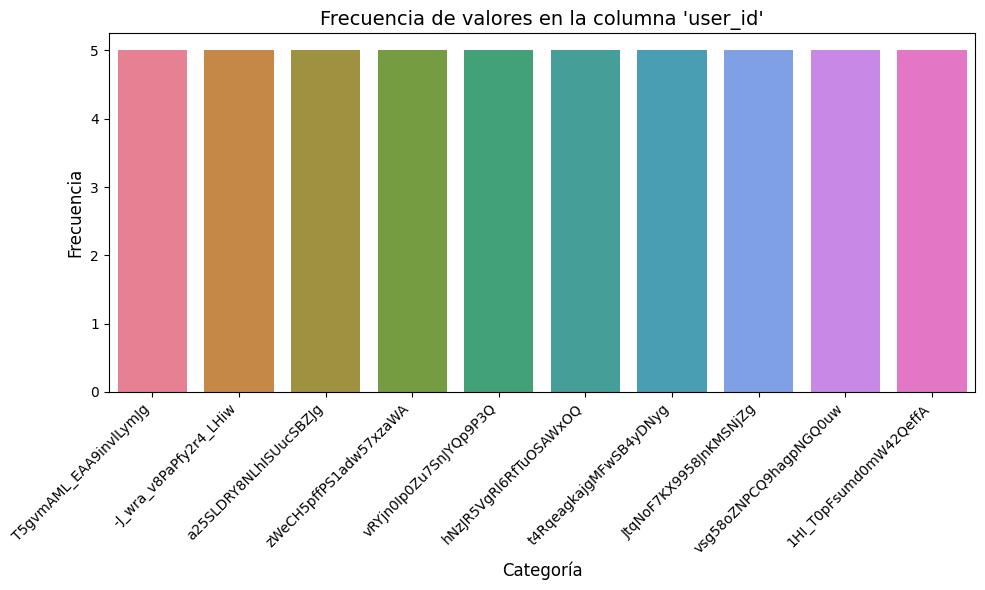

Mostrando el top 10 de categorías en la columna 'name'.


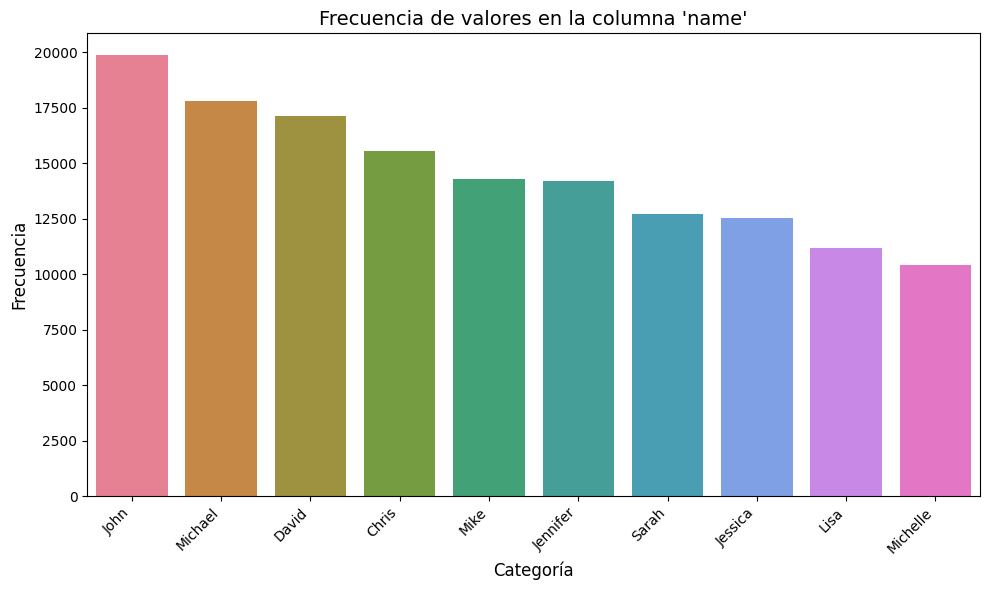

Mostrando el top 10 de categorías en la columna 'yelping_since'.


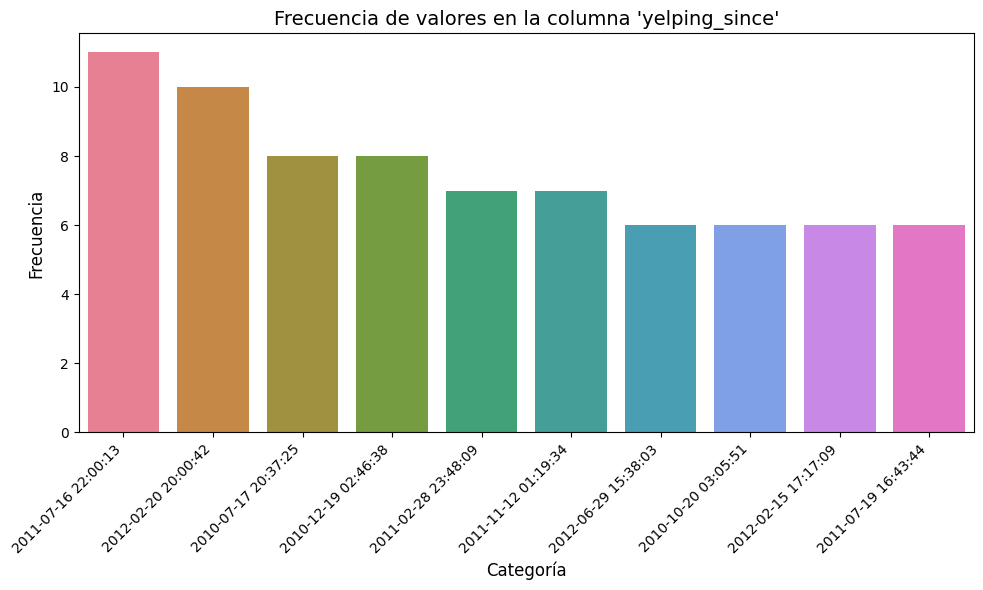

Mostrando el top 10 de categorías en la columna 'elite'.


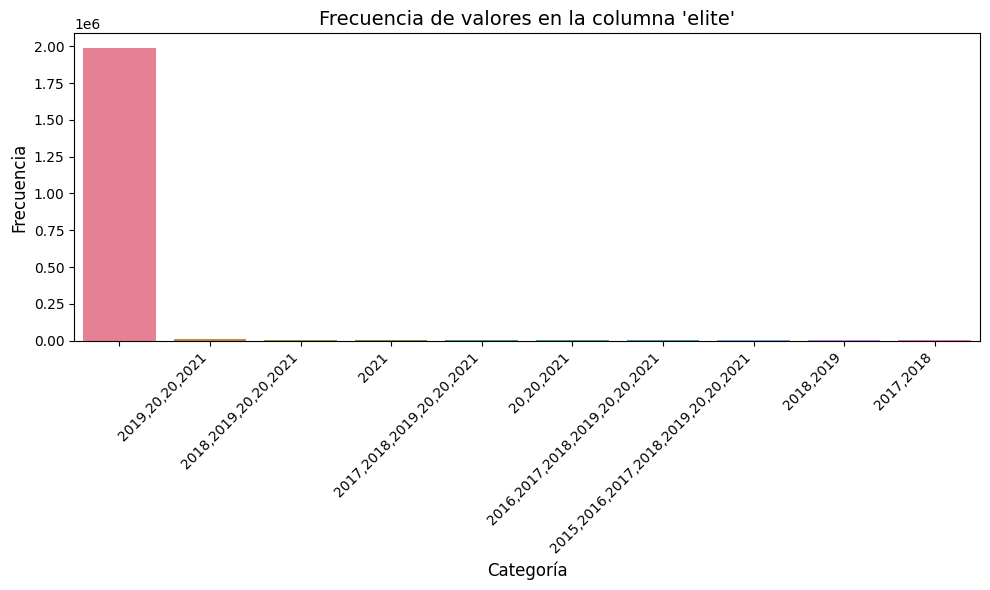

Mostrando el top 10 de categorías en la columna 'friends'.


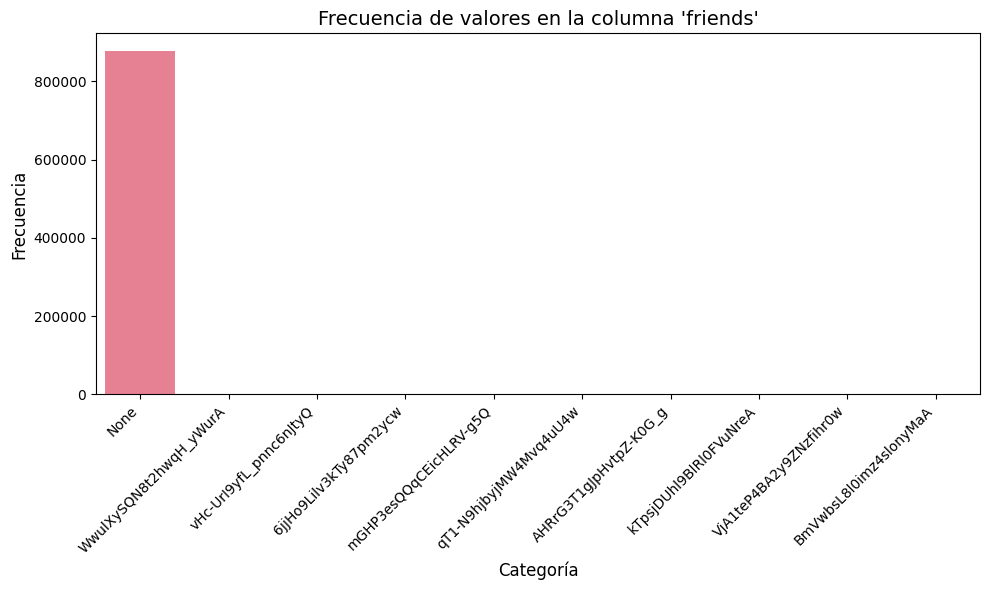

In [72]:
# Llamada a la función para generar gráficos de frecuencia con colores
generar_graficos_frecuencia_con_colores(user_parquet)

### ANALISIS

1. Dimensiones del DataFrame
El DataFrame tiene 2,105,597 filas y 22 columnas.
El tamaño del archivo es de 353.4+ MB, lo que indica que contiene una cantidad significativa de datos.

2. Tipo de Datos
Hay 5 columnas de tipo object, que son cadenas de texto.
Hay 16 columnas de tipo int64, que contienen valores enteros.
Una columna (average_stars) es de tipo float64 y contiene valores decimales.

3. Valores Nulos
No se detectaron valores nulos en ninguna columna, lo cual es positivo para la integridad de los datos. Todas las columnas están completamente llenas.

4. Duplicados
Se identificaron 117,700 filas duplicadas, lo que sugiere que los datos podrían contener redundancias. Sería conveniente limpiar estas filas para mejorar la precisión de cualquier análisis o modelo que se aplique.

5. Análisis Estadístico de la Columna review_count
    - Media: El promedio de reseñas por usuario es de 28.47.
    - Mediana: La mitad de los usuarios ha hecho 6 reseñas, lo que indica una distribución asimétrica (una minoría de usuarios con muchas reseñas).
    - Desviación estándar: Es de 104.21, lo que indica una alta variabilidad en el número de reseñas por usuario.
    - Outliers: Hay 261,716 usuarios con un número de reseñas que se consideran outliers. Esto sugiere que algunos usuarios han hecho muchas más reseñas que la mayoría.

6. Distribución de Métricas de Usuario
Varias columnas (useful, funny, cool, fans, compliment_*) indican interacciones con los usuarios, lo que podría mostrar el nivel de actividad y popularidad de cada usuario en la plataforma. Las estadísticas de estas columnas aún no han sido calculadas, pero podrían mostrar un comportamiento similar al de review_count, con unos pocos usuarios altamente activos.

7. Columna yelping_since
Esta columna probablemente contiene fechas. Sería útil convertirla a formato de fecha (datetime) para análisis más profundos, como estudiar la antigüedad de los usuarios o su comportamiento a lo largo del tiempo.

8. Columnas elite y friends
Estas columnas están en formato object y probablemente contengan listas o valores separados por comas que podrían requerir una transformación o desanidado para un análisis más detallado (por ejemplo, la cantidad de amigos por usuario).


Este análisis preliminar proporciona una buena visión general del dataset, y una limpieza adicional mejoraría su calidad para futuros análisis.

### CONCLUSION

1. Calidad de los datos: El DataFrame no contiene valores nulos, lo cual es positivo, ya que garantiza la integridad de la información. Sin embargo, se detectaron 117,700 filas duplicadas que se eliminaran para evitar sesgos en los análisis.

2. Distribución de reseñas: La columna review_count muestra una distribución asimétrica, con pocos usuarios realizando muchas reseñas y la mayoría haciendo pocas. La alta desviación estándar y la cantidad de outliers indican que una pequeña porción de usuarios contribuye de manera desproporcionada con reseñas.

3. Interacciones y actividad: Varias columnas (useful, funny, cool, fans, etc.) reflejan interacciones de los usuarios, lo que sugiere que hay muchos aspectos de la actividad y popularidad de los usuarios que se pueden explorar en mayor profundidad.

4.  Acciones adicionales:
Limpiar los duplicados para evitar redundancias, Realizar análisis adicionales en las columnas de interacción (useful, funny, etc.) para entender mejor la actividad de los usuarios, Convertir la columna yelping_since a formato de fecha y analizar la distribución temporal de la actividad, Considerar la transformación de las columnas elite y friends si contienen listas.

En general, los datos parecen estar bien estructurados, pero requieren algunos pasos adicionales de limpieza y transformación para aprovechar todo su potencial analítico.

__________________________________________________________________________________________________________________________________________________________________________________

# REVIEWS CALIFORNIA YELP

In [73]:
yelp_reviews_california = pd.read_csv('Yelp Reviews california.csv')

In [74]:
yelp_reviews_california

business_id           name             address  \
0      ifjluUv4VASwmFqEp8cWlQ  Marty's Pizza  2733 De La Vina St   
1      ifjluUv4VASwmFqEp8cWlQ  Marty's Pizza  2733 De La Vina St   
2      ifjluUv4VASwmFqEp8cWlQ  Marty's Pizza  2733 De La Vina St   
3      ifjluUv4VASwmFqEp8cWlQ  Marty's Pizza  2733 De La Vina St   
4      ifjluUv4VASwmFqEp8cWlQ  Marty's Pizza  2733 De La Vina St   
...                       ...            ...                 ...   
44481  uriD7RFuHhLJeDdKaf0nFA     Pizza Guru       3534 State St   
44482  uriD7RFuHhLJeDdKaf0nFA     Pizza Guru       3534 State St   
44483  uriD7RFuHhLJeDdKaf0nFA     Pizza Guru       3534 State St   
44484  uriD7RFuHhLJeDdKaf0nFA     Pizza Guru       3534 State St   
44485  uriD7RFuHhLJeDdKaf0nFA     Pizza Guru       3534 State St   

                city state  postal_code   latitude   longitude  stars_x  \
0      Santa Barbara    PA        93105  34.436236 -119.726147      4.0   
1      Santa Barbara    PA        93105  34.436236 -119.726147      4.0   
2      Santa Barbara    PA        93105  34.436236 -119.726147      4.0   
3      Santa Barbara    PA        93105  34.436236 -119.726147      4.0   
4      Santa Barbara    PA        93105  34.436236 -119.726147      4.0   
...              ...   ...          ...        ...         ...      ...   
44481  Santa Barbara    PA        93105  34.440689 -119.739681      4.0   
44482  Santa Barbara    PA        93105  34.440689 -119.739681      4.0   
44483  Santa Barbara    PA        93105  34.440689 -119.739681      4.0   
44484  Santa Barbara    PA        93105  34.440689 -119.739681      4.0   
44485  Santa Barbara    PA        93105  34.440689 -119.739681      4.0   

       review_count  ...                categories  \
0                64  ...        Pizza, Restaurants   
1                64  ...        Pizza, Restaurants   
2                64  ...        Pizza, Restaurants   
3                64  ...        Pizza, Restaurants   
4                64  ...        Pizza, Restaurants   
...             ...  ...                       ...   
44481           299  ...  Restaurants, Pizza, Food   
44482           299  ...  Restaurants, Pizza, Food   
44483           299  ...  Restaurants, Pizza, Food   
44484           299  ...  Restaurants, Pizza, Food   
44485           299  ...  Restaurants, Pizza, Food   

                                                   hours  \
0      {'Tuesday': '11:0-21:30', 'Wednesday': '11:0-2...   
1      {'Tuesday': '11:0-21:30', 'Wednesday': '11:0-2...   
2      {'Tuesday': '11:0-21:30', 'Wednesday': '11:0-2...   
3      {'Tuesday': '11:0-21:30', 'Wednesday': '11:0-2...   
4      {'Tuesday': '11:0-21:30', 'Wednesday': '11:0-2...   
...                                                  ...   
44481  {'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...   
44482  {'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...   
44483  {'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...   
44484  {'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...   
44485  {'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...   

                    review_id                 user_id stars_y useful  funny  \
0      wKyNXBJNkY_2pUdlACafLQ  QRGtYhDV5gwIpa_erkpXBA       5      0      0   
1      FonKJU_pUT9O6SZ1AWPn5A  jDpcctU_udeFvU2fWSfVMg       5      2      0   
2      o0wGl7E60ysU7ESIR3Fh0w  flDlHYjXS3gQSenFozwSJg       3      0      0   
3      SoRqwRkR0M_Tvl3Bicc-hA  pW1wVvLiowv96JOMiUdtWQ       5      1      0   
4      nwuvfhr4un1Wjnd986zNXg  lsRj9G10Yb5aSG013IFE-A       1      1      0   
...                       ...                     ...     ...    ...    ...   
44481  ZZAzB7BCrX1yb-SYvUPKxA  o72LSEPHKu1oQcpXeIVlag       5      0      0   
44482  BD9NCp1atxOpnwpN-K238g  u30sv3s4V2tz5VOgNQYtgg       4      0      0   
44483  sqZHjsN4EfKA-dhqPIyZfA  Mp97BPH2Y7O1DsFt6wFp4Q       1      1      1   
44484  bJ1D4miDXF0a0iTEnrwXGA  06egjh3nrEb7EXX1VYZOCg       5      3      0   
44485  _u89IdDbh46dGPESibBk7g  vTjt5vVDuW-Xu1Z_tfraTQ       5

In [75]:
# Analizamos nulos en el dataframe
detectar_nulos(yelp_reviews_california)


--------------------------------------------------

Columna 'address' contiene valores nulos:
  Cantidad de nulos en 'address': 434

Filas con Nulos en la columna 'address':

                  business_id                     name address           city  \
299    7p4iMnA_hE1Gpz6Yoc7TOQ           Meal Prep Reno     NaN           Reno   
300    7p4iMnA_hE1Gpz6Yoc7TOQ           Meal Prep Reno     NaN           Reno   
301    7p4iMnA_hE1Gpz6Yoc7TOQ           Meal Prep Reno     NaN           Reno   
302    7p4iMnA_hE1Gpz6Yoc7TOQ           Meal Prep Reno     NaN           Reno   
303    7p4iMnA_hE1Gpz6Yoc7TOQ           Meal Prep Reno     NaN           Reno   
...                       ...                      ...     ...            ...   
44177  IRBhPAC4ZoDpXazpoB3epQ  Good Stuff Baked Treats     NaN  Santa Barbara   
44178  IRBhPAC4ZoDpXazpoB3epQ  Good Stuff Baked Treats     NaN  Santa Barbara   
44179  IRBhPAC4ZoDpXazpoB3epQ  Good Stuff Baked Treats     NaN  Santa Barbara   
44180  IRBhPAC

{'address':                   business_id                     name address           city  \
 299    7p4iMnA_hE1Gpz6Yoc7TOQ           Meal Prep Reno     NaN           Reno   
 300    7p4iMnA_hE1Gpz6Yoc7TOQ           Meal Prep Reno     NaN           Reno   
 301    7p4iMnA_hE1Gpz6Yoc7TOQ           Meal Prep Reno     NaN           Reno   
 302    7p4iMnA_hE1Gpz6Yoc7TOQ           Meal Prep Reno     NaN           Reno   
 303    7p4iMnA_hE1Gpz6Yoc7TOQ           Meal Prep Reno     NaN           Reno   
 ...                       ...                      ...     ...            ...   
 44177  IRBhPAC4ZoDpXazpoB3epQ  Good Stuff Baked Treats     NaN  Santa Barbara   
 44178  IRBhPAC4ZoDpXazpoB3epQ  Good Stuff Baked Treats     NaN  Santa Barbara   
 44179  IRBhPAC4ZoDpXazpoB3epQ  Good Stuff Baked Treats     NaN  Santa Barbara   
 44180  IRBhPAC4ZoDpXazpoB3epQ  Good Stuff Baked Treats     NaN  Santa Barbara   
 44181  IRBhPAC4ZoDpXazpoB3epQ  Good Stuff Baked Treats     NaN  Santa Barbara   
 
   

In [76]:
# Analizamos outliers y estadísticas de datos
analisis_general(yelp_reviews_california, 'yelp_reviews_california')



ANÁLISIS DEL DATAFRAME YELP_REVIEWS_CALIFORNIA

Columnas con valores faltantes:
address        434
attributes      44
hours         1334
dtype: int64

No hay filas duplicadas en el dataframe.

--------------------------------------------------------------------------------

Estadísticas para la columna longitude:
  Media: -119.76421262911113
  Mediana: -119.770649
  Desviación estándar: 0.07452295921749778
  Cantidad de outliers: 1661

Filas con Outliers en longitude:

                  business_id                         name  \
675    uI15YInpDsGBUZcNfm_TfQ  Borrello's Pizza & Pastaria   
676    uI15YInpDsGBUZcNfm_TfQ  Borrello's Pizza & Pastaria   
677    uI15YInpDsGBUZcNfm_TfQ  Borrello's Pizza & Pastaria   
678    uI15YInpDsGBUZcNfm_TfQ  Borrello's Pizza & Pastaria   
679    uI15YInpDsGBUZcNfm_TfQ  Borrello's Pizza & Pastaria   
...                       ...                          ...   
43531  WtGHHomZhFffiL0UiKjGkw         Little Caesars Pizza   
43532  WtGHHomZhFffiL0UiKjGk

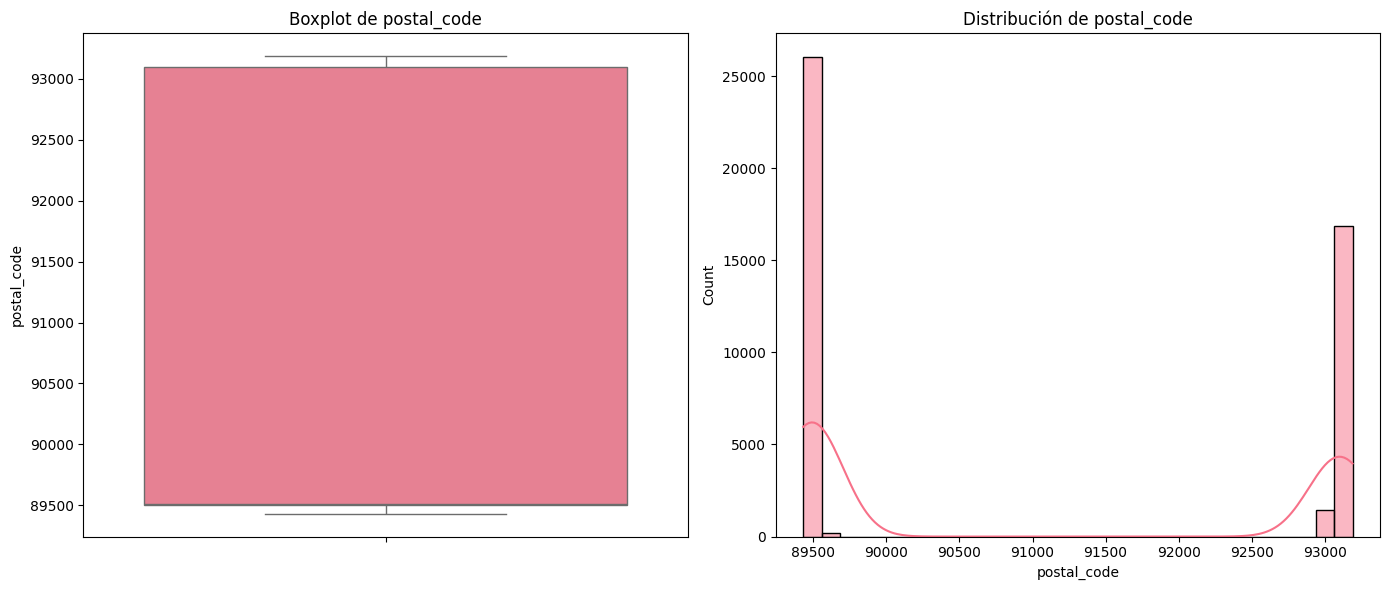

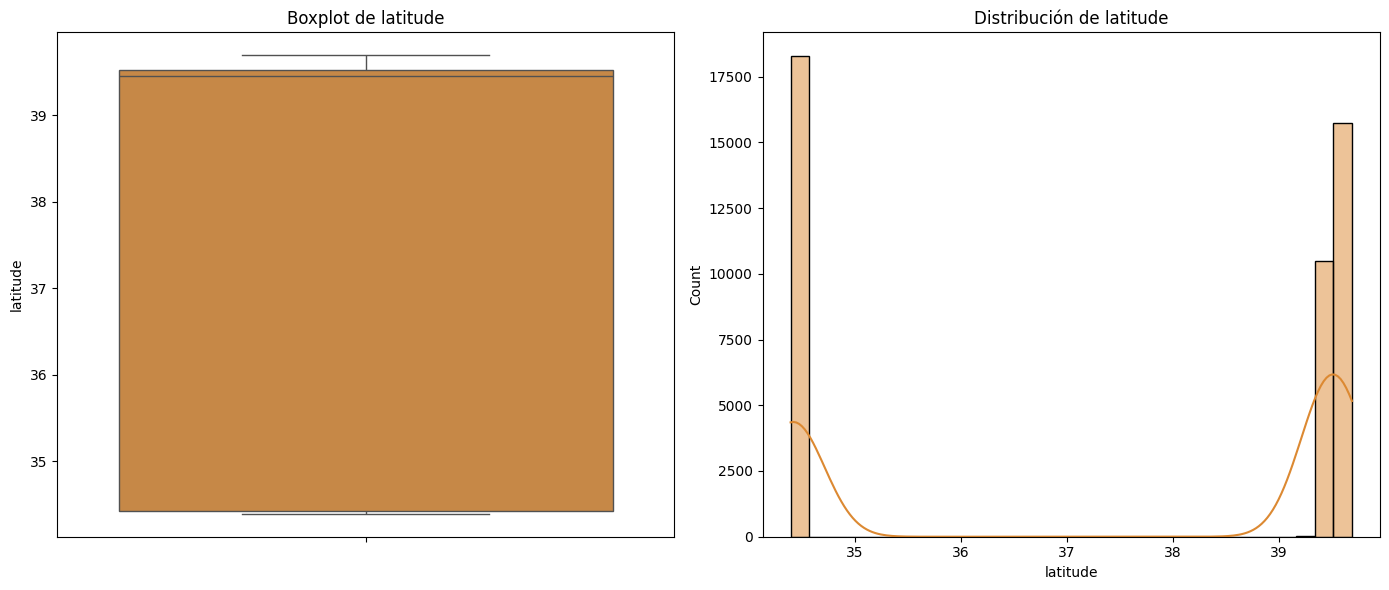

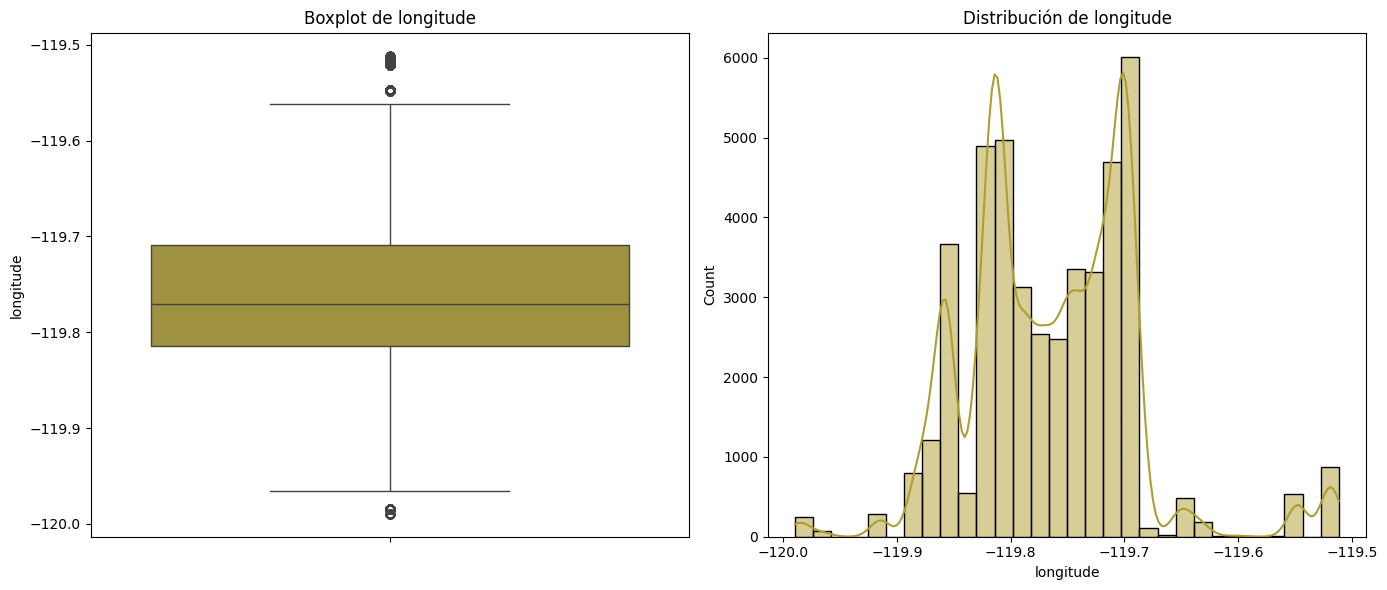

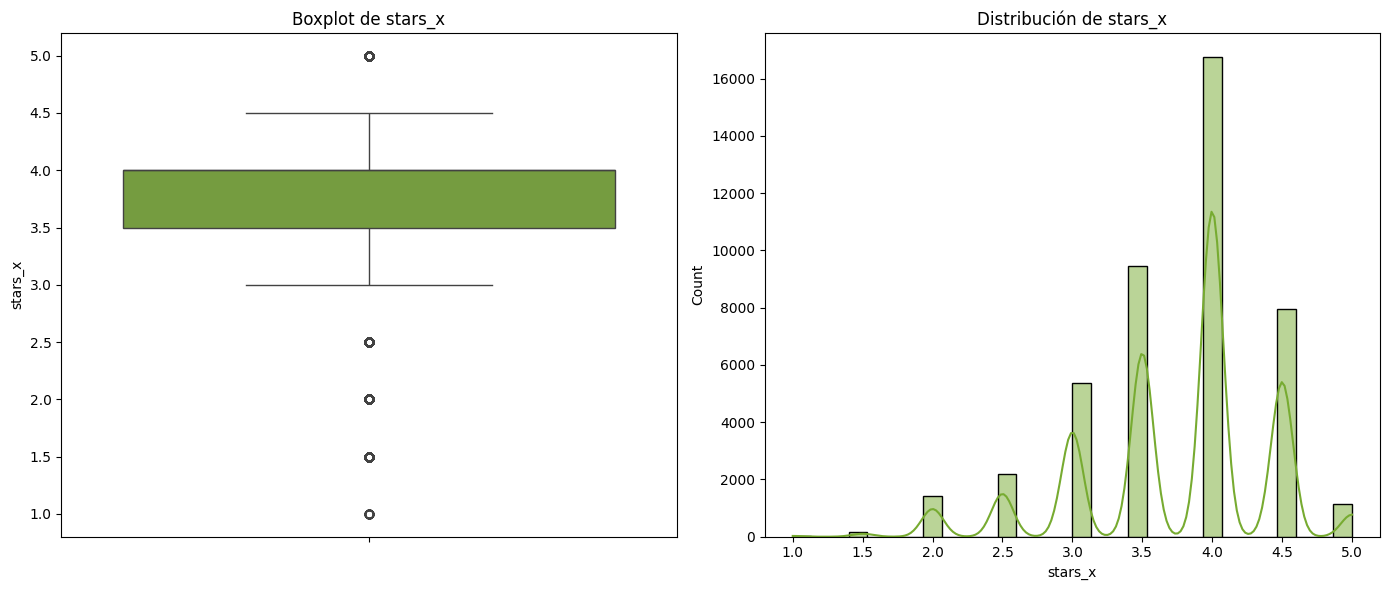

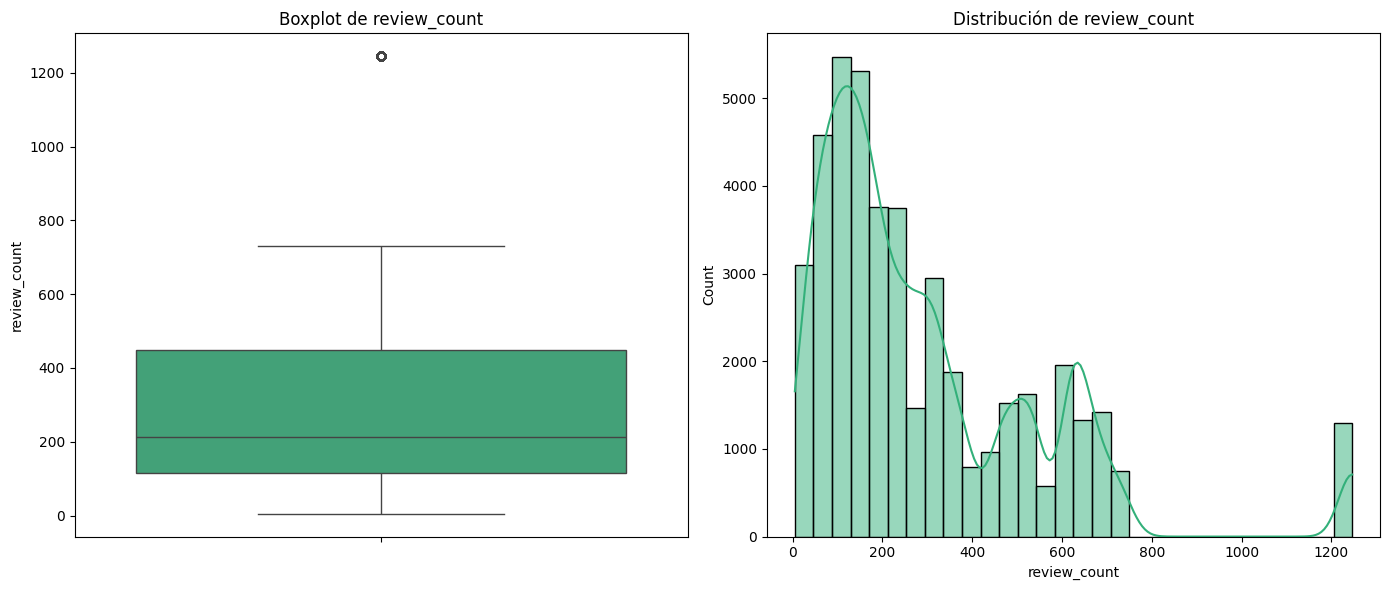

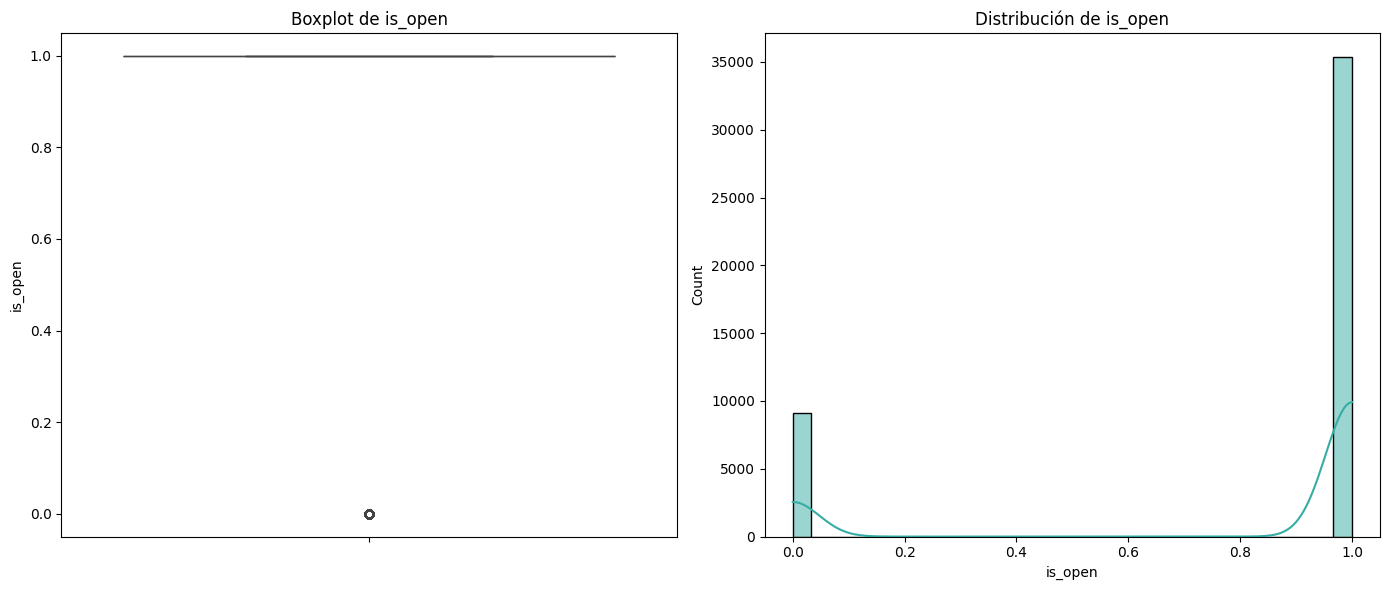

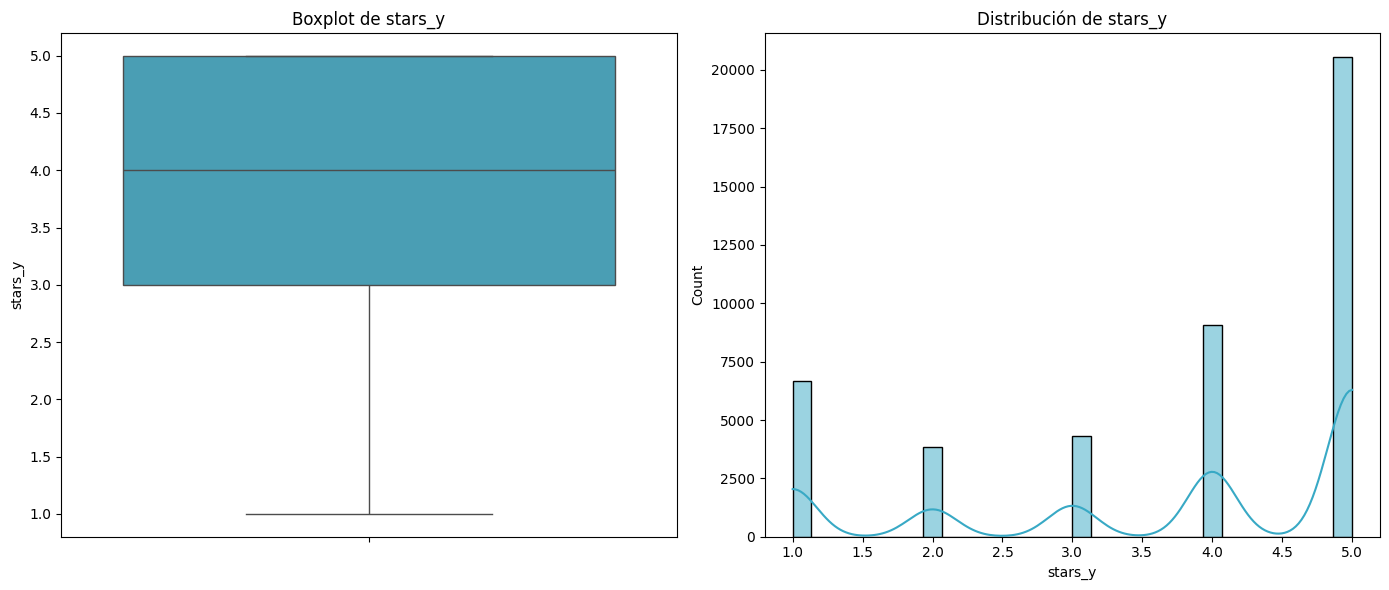

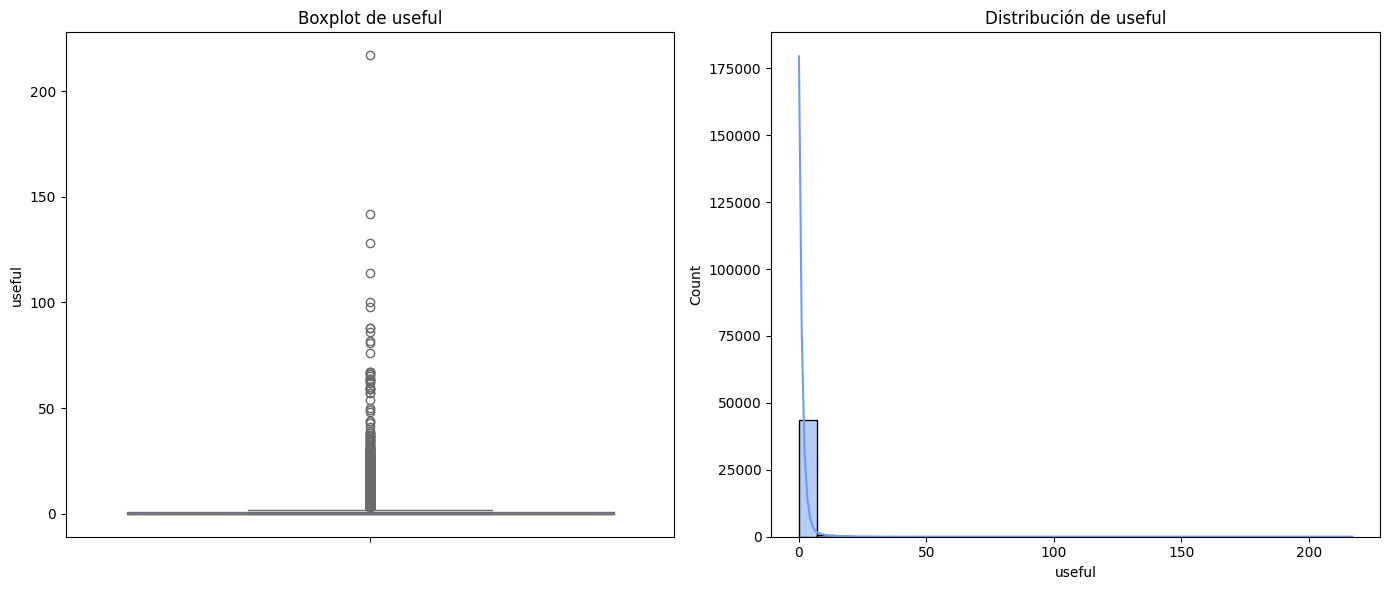

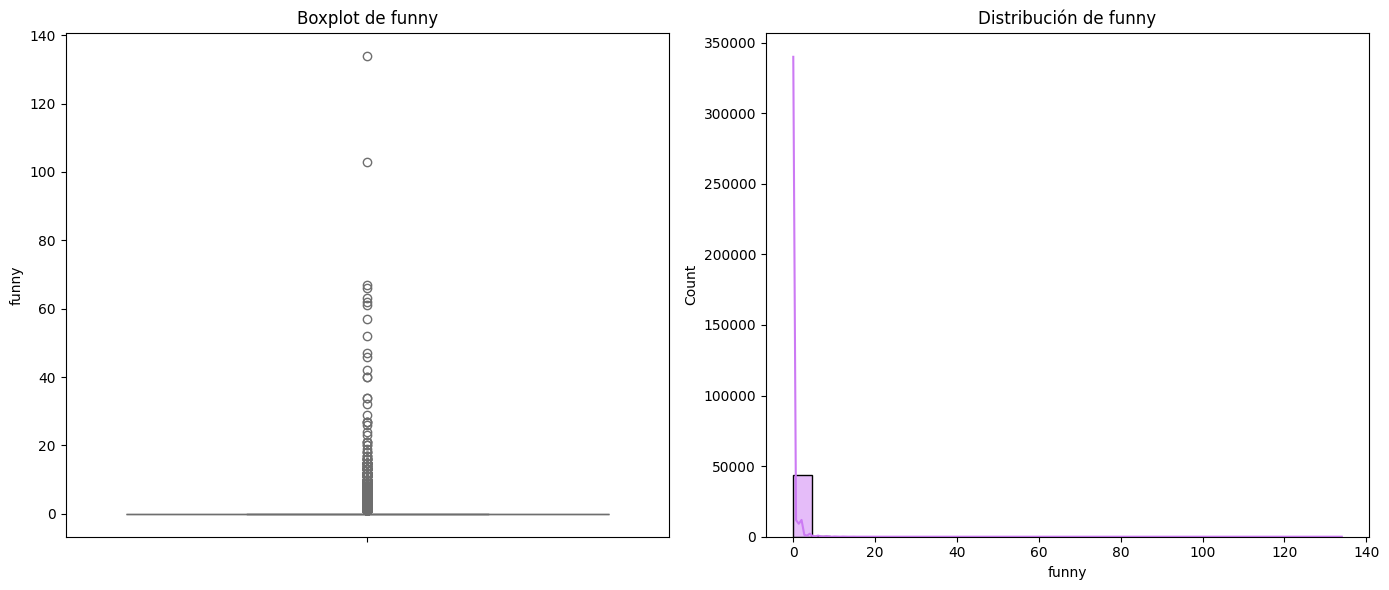

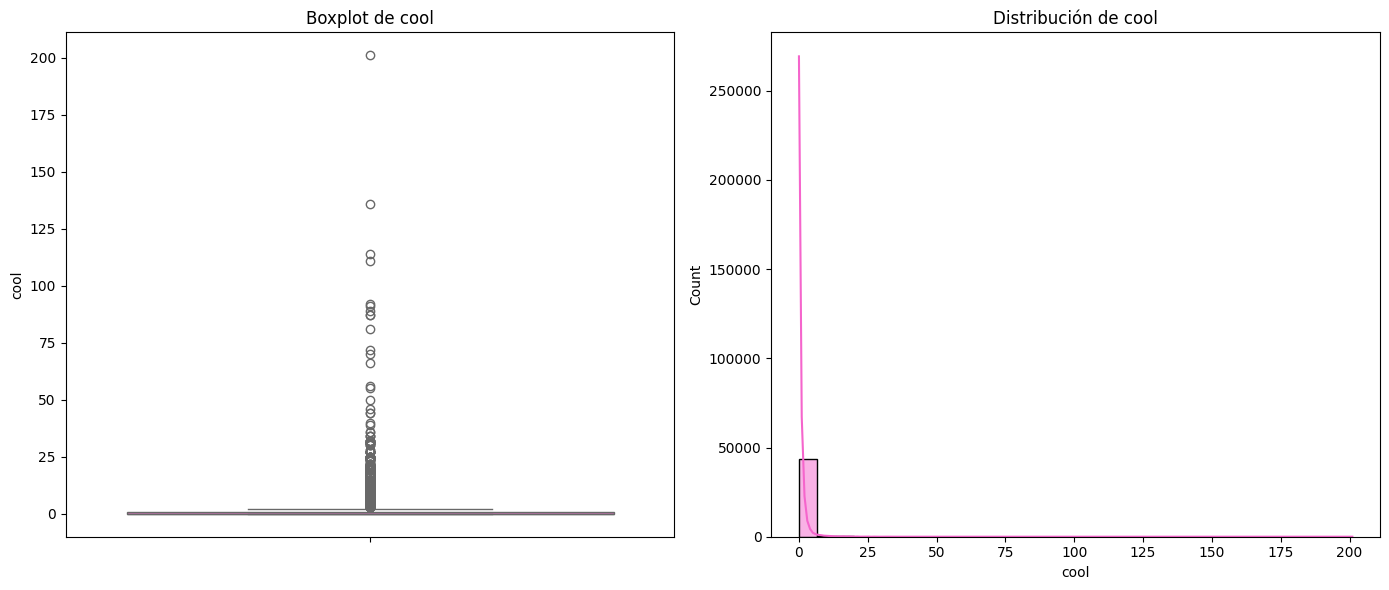

In [77]:
# Llamada a la función para generar gráficos para el DataFrame user_parquet
generar_graficos_numericos(yelp_reviews_california)

Mostrando el top 10 de categorías en la columna 'business_id'.


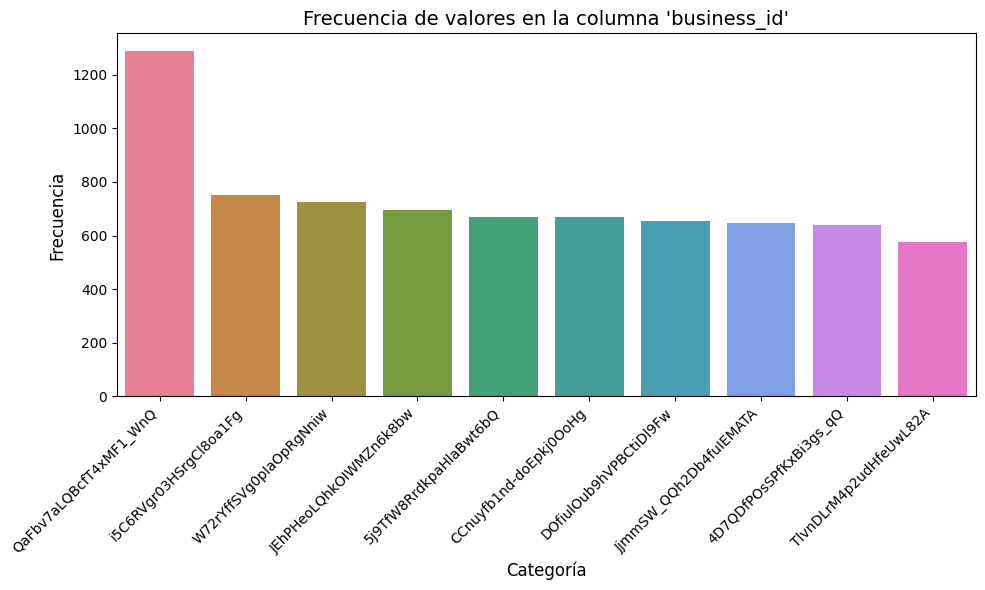

Mostrando el top 10 de categorías en la columna 'name'.


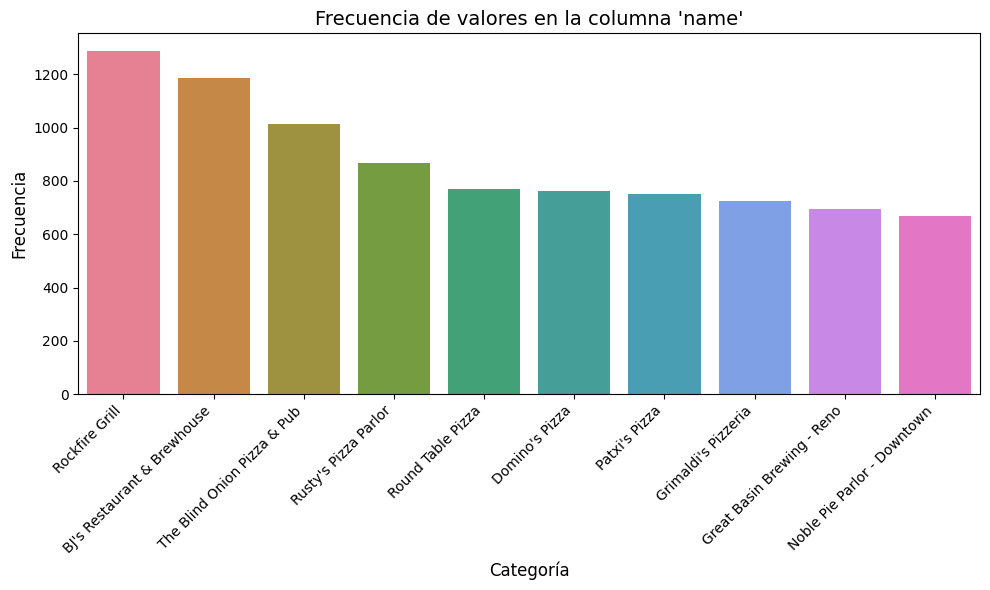

Mostrando el top 10 de categorías en la columna 'address'.


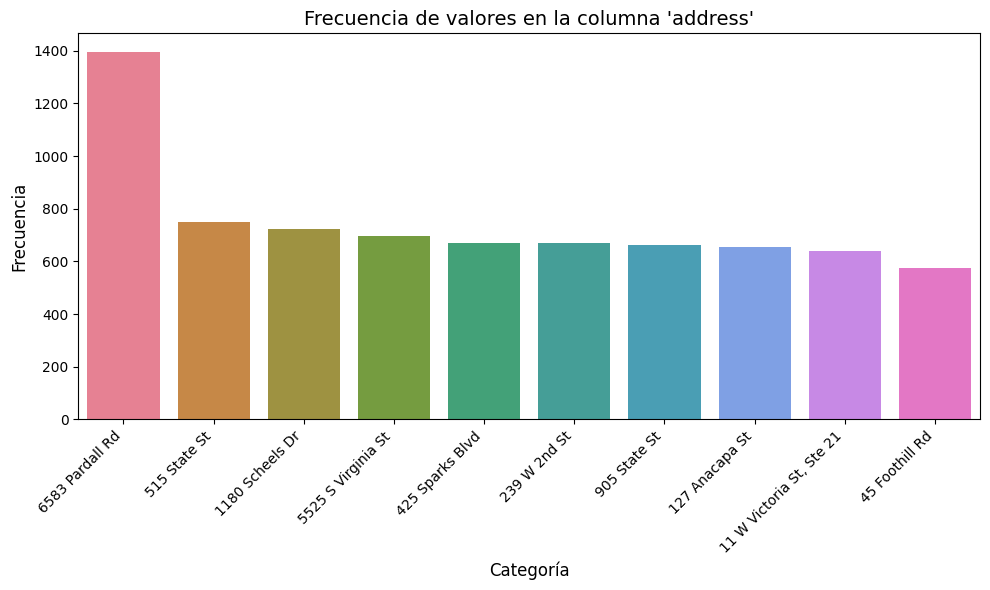

Mostrando el top 10 de categorías en la columna 'city'.


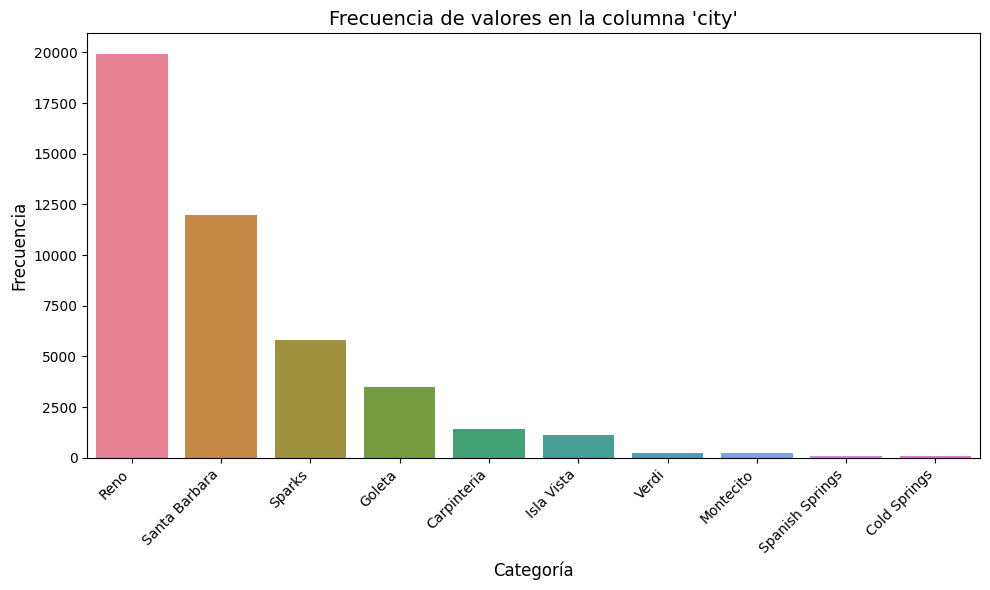

Mostrando el top 10 de categorías en la columna 'state'.


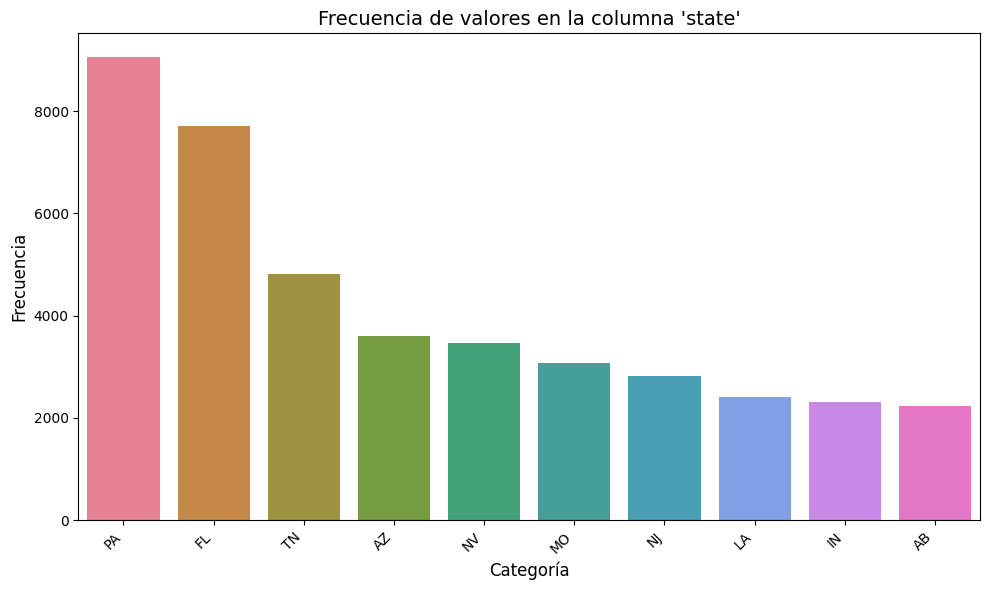

Mostrando el top 10 de categorías en la columna 'attributes'.


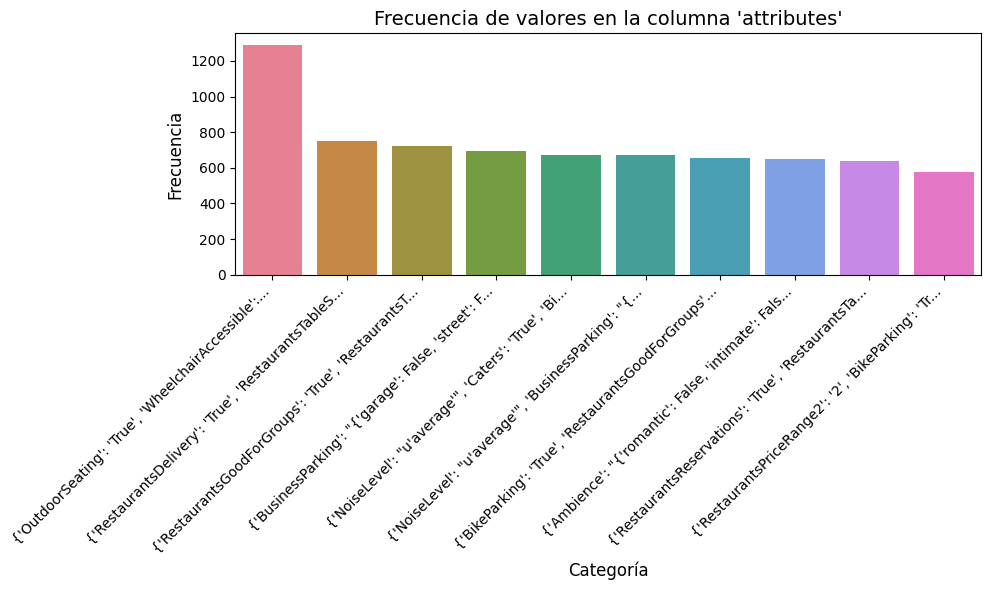

Mostrando el top 10 de categorías en la columna 'categories'.


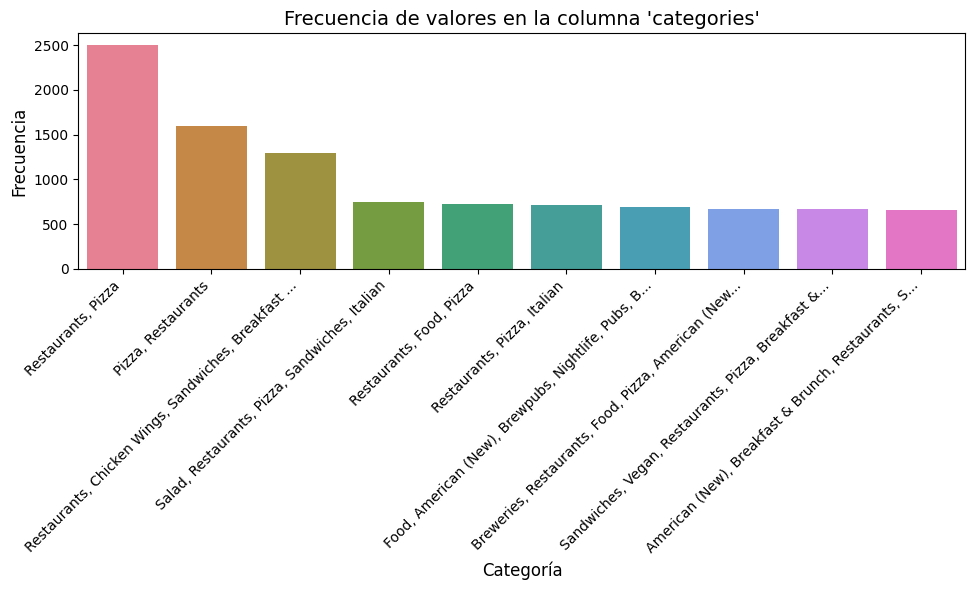

Mostrando el top 10 de categorías en la columna 'hours'.


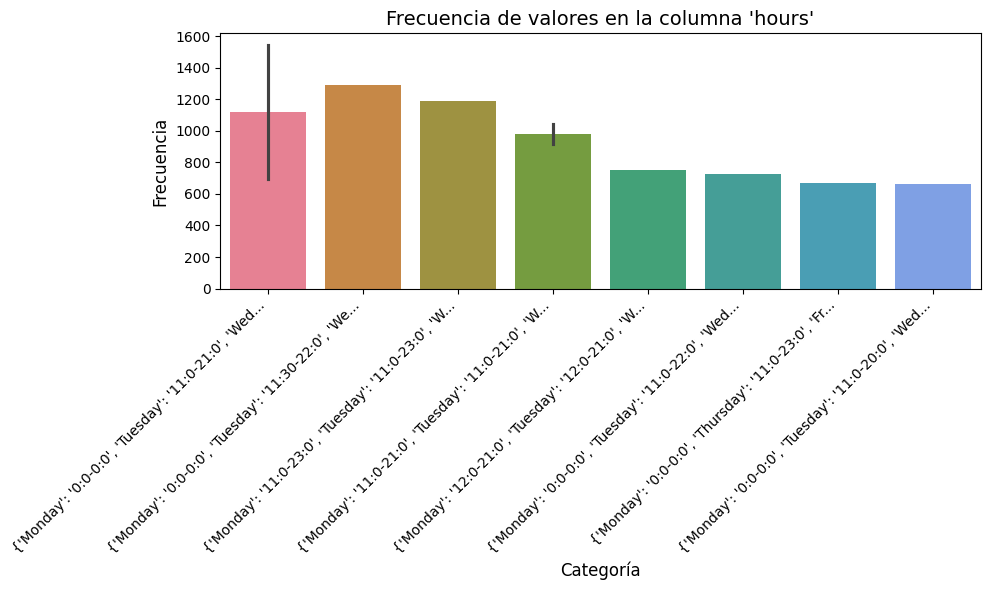

Mostrando el top 10 de categorías en la columna 'review_id'.


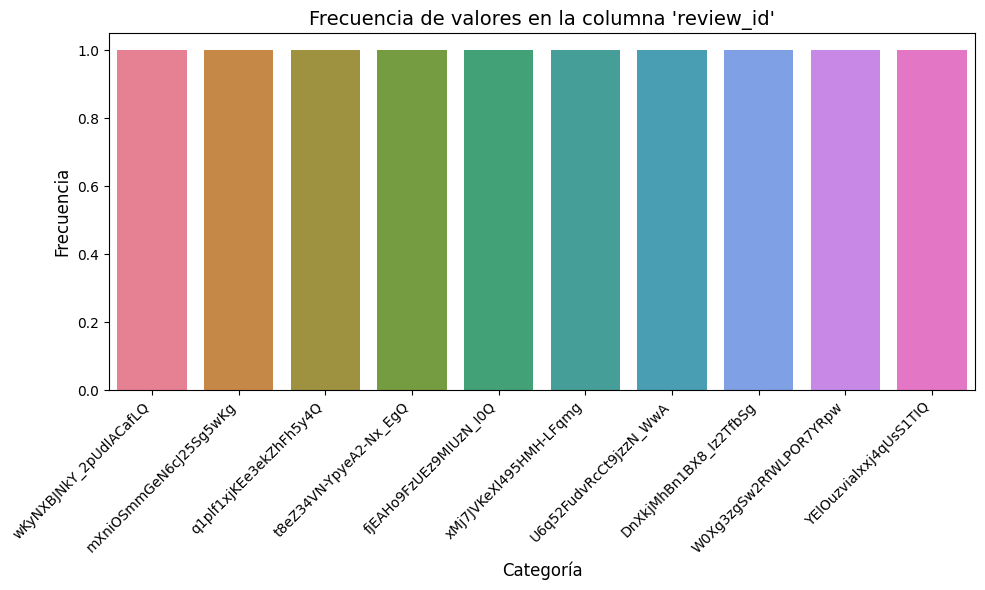

Mostrando el top 10 de categorías en la columna 'user_id'.


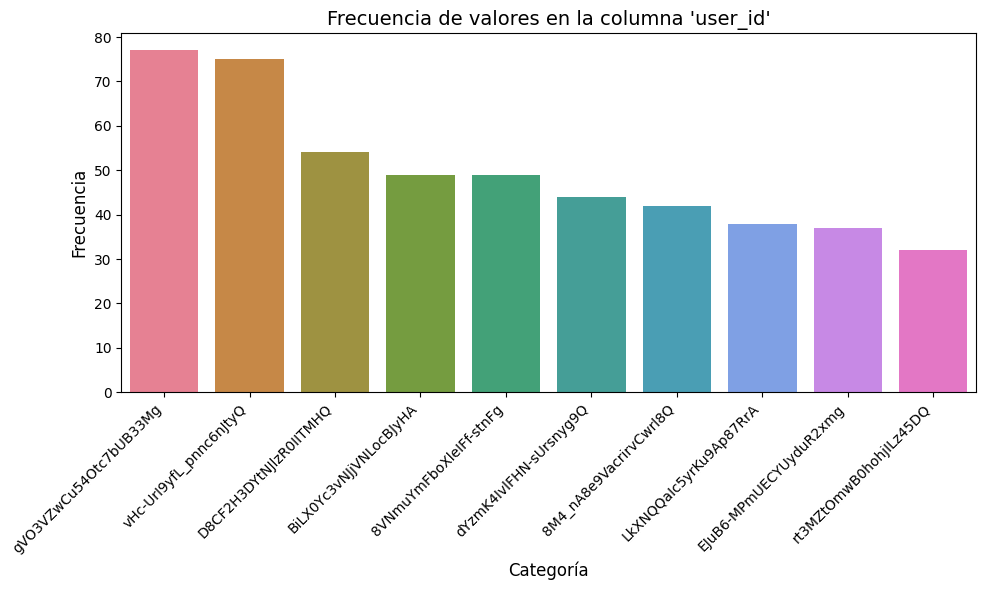

Mostrando el top 10 de categorías en la columna 'text'.


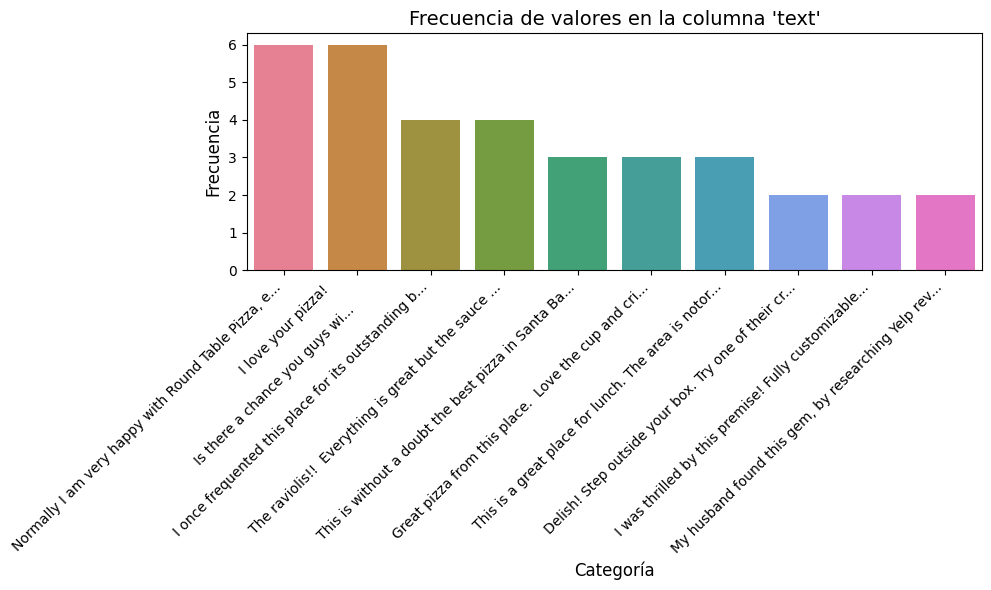

Mostrando el top 10 de categorías en la columna 'date'.


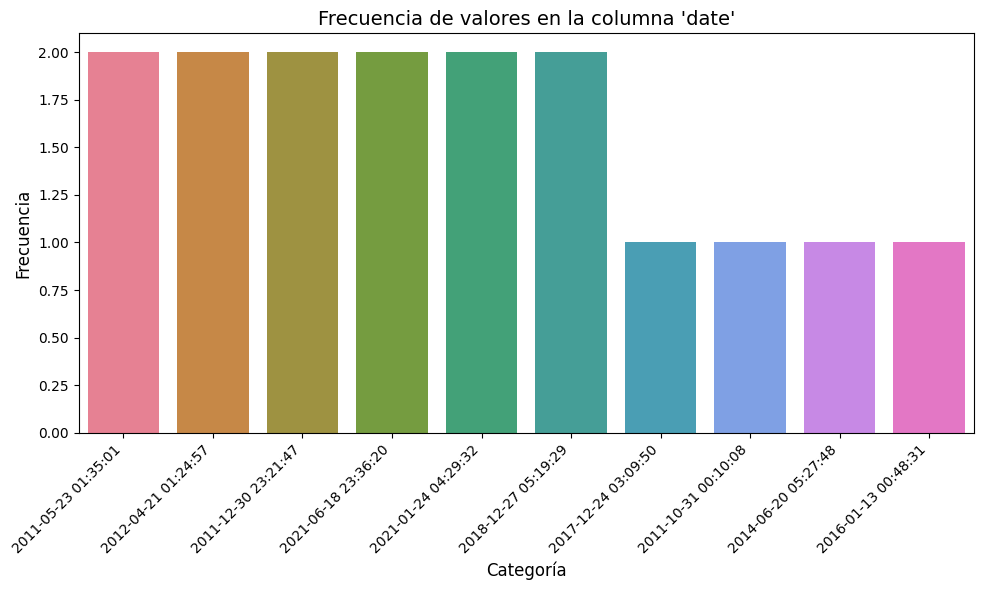

In [81]:
# Función para generar gráficos de frecuencia para columnas categóricas (tipo object) con colores y textos truncados
def generar_graficos_frecuencia_con_colores_y_truncar(df, max_len=50):
    # Seleccionar solo las columnas de tipo object
    columnas_categoricas = df.select_dtypes(include=['object']).columns
    
    # Si no hay columnas categóricas, mostrar mensaje y salir
    if columnas_categoricas.empty:
        print("No se encontraron columnas categóricas en el DataFrame para generar gráficos.")
        return

    # Iterar sobre las columnas categóricas y crear gráficos
    for col in columnas_categoricas:
        # Contar la cantidad de ocurrencias de cada valor en la columna
        conteo_valores = df[col].value_counts()

        # Limitar siempre a las 10 categorías más frecuentes
        conteo_valores = conteo_valores.head(10)
        print(f"Mostrando el top 10 de categorías en la columna '{col}'.")

        # Crear un gráfico de barras con la frecuencia de cada valor usando una paleta de colores
        plt.figure(figsize=(10, 6))
        
        # Usamos la paleta "husl" para colores
        colores = sns.color_palette("husl", len(conteo_valores))
        
        # Escapar caracteres especiales y truncar etiquetas largas
        etiquetas = [str(etiqueta).replace('$', r'\$')[:max_len] + '...' if len(str(etiqueta)) > max_len else str(etiqueta).replace('$', r'\$') for etiqueta in conteo_valores.index]

        # Graficar el conteo de valores
        sns.barplot(x=etiquetas, y=conteo_valores.values, palette=colores)

        # Ajustar la presentación del gráfico
        plt.title(f"Frecuencia de valores en la columna '{col}'", fontsize=14)
        plt.xticks(rotation=45, ha='right')  # Rotar los nombres para mejor visualización
        plt.xlabel('Categoría', fontsize=12)
        plt.ylabel('Frecuencia', fontsize=12)

        # Ajustar el layout para evitar solapamientos
        plt.tight_layout()
        plt.show()

# Llamada a la función para generar gráficos con truncamiento de textos largos
generar_graficos_frecuencia_con_colores_y_truncar(yelp_reviews_california)

### ANALISIS

1. El DataFrame tiene valores faltantes en tres columnas principales:
    - address: 434 valores faltantes.

    - attributes: 44 valores faltantes.

    - hours: 1334 valores faltantes.

Estos valores faltantes indican la ausencia de información específica en ciertos establecimientos, como la dirección exacta, los atributos (características de los negocios, como si son accesibles o tienen estacionamiento) y los horarios de operación. El número de valores faltantes en la columna hours es considerable, lo que requerirá implementar una estrategia para imputar esos datos o eliminarlos dependiendo del análisis.

2. Duplicados:

    - No se encontraron filas duplicadas, lo cual es positivo, ya que no habrá que eliminar datos repetidos. Esto sugiere que cada entrada en el DataFrame corresponde a una observación única.

3. Estadísticas de la columna longitude:

    - Media: -119.76
La media refleja una ubicación aproximada en el estado de California, dado que las longitudes negativas corresponden a ubicaciones en el hemisferio occidental.

    - Mediana: -119.77
La mediana es muy cercana a la media, lo que indica una distribución bastante simétrica de las longitudes en el conjunto de datos.

    - Desviación estándar: 0.0745
Una desviación estándar baja indica que la mayoría de las longitudes están bastante agrupadas en torno a la media. Esto sugiere que los negocios en este DataFrame probablemente están distribuidos en una región geográfica relativamente limitada dentro de California.

    - Cantidad de outliers: 1661
El número de outliers es alto en esta columna, lo que sugiere que existen negocios con ubicaciones inusuales o que pueden haber sido mal registradas. Sería útil examinar estos outliers más a fondo para verificar si hay errores de registro o si representan ubicaciones legítimas.


### CONCLUSION

1. Manejo de Valores Faltantes:

    - address y attributes: Se debe evaluar el impacto de los valores faltantes en estas columnas. Si es posible, completar los datos faltantes con información adicional o imputar los valores puede mejorar el análisis.
    - hours: La alta proporción de valores faltantes en hours sugiere que esta columna puede no ser completamente confiable. Considerar la imputación basada en patrones observados en los datos o eliminar los registros con valores faltantes si la falta de información no afecta significativamente los objetivos del análisis.

2. Análisis de Outliers:

    - Los 1661 outliers en longitude requieren una revisión para determinar su causa. Los outliers pueden ser errores de entrada o ubicaciones válidas fuera del área de análisis principal. Realizar un análisis adicional o limpieza de datos puede ser necesario para asegurar la calidad y precisión del análisis geográfico.

3. Distribución Geográfica:

    - La baja desviación estándar sugiere una concentración de negocios en una región específica de California. Puede ser útil realizar un análisis espacial más detallado para entender la densidad y distribución de los negocios en el área.

4. Validación y Verificación:

    - Dado que no hay duplicados en el DataFrame, se puede proceder con confianza en la unicidad de los registros. Sin embargo, siempre es recomendable realizar verificaciones adicionales para asegurar que los datos estén completos y sean representativos.

En resumen, el DataFrame presenta un conjunto de datos con algunas áreas que requieren atención, especialmente en términos de valores faltantes y outliers. Abordar estos problemas ayudará a garantizar un análisis más preciso y confiable.

# CONCLUSIONES GENARALES

El análisis del DataFrame ha identificado tanto aspectos positivos como áreas críticas que requieren intervención para optimizar el análisis y la modelización de los datos. A continuación, se resumen los principales hallazgos y recomendaciones:

1. Calidad de Datos y Valores Faltantes:

    - Columna de Valores Faltantes: Varios DataFrames muestran columnas con un elevado porcentaje de valores nulos, como description, price, hours, y pics. La gestión de estos valores es crucial para mantener la integridad del análisis. Se recomienda evaluar la posibilidad de imputar estos valores utilizando técnicas adecuadas o, en su defecto, considerar la eliminación de columnas o registros que contengan demasiados nulos, dependiendo de su relevancia para los objetivos del análisis.

    - Impacto en el Análisis: Los valores faltantes pueden limitar el análisis y la interpretación de los datos. Un manejo adecuado de estos datos es fundamental para asegurar la validez de los resultados.

2. Duplicados y Redundancia:

    - Presencia de Duplicados: Se han identificado hasta 75,242 filas duplicadas en algunos DataFrames, y un total de 157 filas duplicadas en otros. La eliminación de estas filas es imperativa para evitar distorsiones en el análisis y garantizar la precisión de las métricas.

    - Efecto en el Análisis: La redundancia de datos puede llevar a sesgos en los resultados, por lo que es crucial realizar una limpieza exhaustiva para obtener conclusiones precisas.

3. Outliers y Valores Atípicos:

    - Detección de Outliers: Se han observado valores atípicos en columnas como time y longitude, con cantidades significativas en algunos casos. Estos outliers deben ser revisados y analizados para determinar si representan errores, anomalías o casos válidos que podrían afectar la precisión del análisis.

    - Recomendaciones: Realizar un análisis detallado para entender la causa de estos outliers y aplicar técnicas de limpieza si es necesario.

4. Distribución Geográfica y Análisis de Interacción:

    - Distribución Geográfica: La baja desviación estándar en la distribución geográfica indica una concentración en regiones específicas, lo que puede ser útil para análisis espaciales detallados. Se sugiere explorar la densidad y distribución de negocios en las áreas identificadas.

    - Análisis de Interacción: La evaluación de columnas como useful, funny, y cool revela patrones en la actividad y popularidad de los usuarios. Es recomendable profundizar en el análisis de estas interacciones para obtener una visión completa del comportamiento de los usuarios.

5. Recomendaciones Finales:

    - Limpieza y Transformación de Datos: Asegurarse de tratar adecuadamente los valores faltantes y duplicados, revisar y manejar los outliers, y realizar análisis adicionales según sea necesario.

    - Validación de Datos: Verificar la integridad y representatividad de los datos después de la limpieza para garantizar que los datos sean fiables para análisis y modelización.

    - Exploración y Análisis: Utilizar los datos restantes para realizar análisis detallados sobre calificaciones, reseñas, patrones temporales y distribución geográfica, para obtener insights valiosos y tomar decisiones basadas en datos.

En resumen, aunque el DataFrame proporciona una base sólida y valiosa, es esencial abordar los problemas identificados para maximizar la calidad y precisión del análisis. Con una estrategia adecuada de limpieza y transformación de datos, se puede aprovechar todo el potencial del DataFrame para obtener conclusiones significativas y respaldar decisiones informadas.